# **<span style="color: blue;">Business Case: Aerofit - Descriptive Statistics & Probability</span>**
By Santanu Dash


> - [Aerofit Data_Set](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)
> - [Aerofit Project Sebmision Link](https://www.scaler.com/academy/mentee-dashboard/class/93699/project/problems/18046?navref=cl_tt_lst_sl)

---


In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy.stats import norm, binom, geom, zscore, ttest_1samp, ttest_ind

sns.set_theme(style="darkgrid")

In [281]:
aerofit = pd.read_csv("./aerofit_treadmill.csv")
aerofit.head(5)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

## **<span style="color: #4cbe9b;">Provided Inputs</span>**


In [282]:
price = pd.DataFrame([["KP281", 1500], ["KP481", 1750], ["KP781", 2500]],columns=["Product", "Price"])
price

Product  Price
0   KP281   1500
1   KP481   1750
2   KP781   2500

## **<span style="color: black;">Exploring The Data Set</span>**


In [283]:
aerofit.shape

(180, 9)

In [284]:
aerofit.size

1620

In [285]:
aerofit = aerofit[['Product', 'Gender', 'MaritalStatus', 'Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']]

In [286]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Gender         180 non-null    object
 2   MaritalStatus  180 non-null    object
 3   Age            180 non-null    int64 
 4   Income         180 non-null    int64 
 5   Miles          180 non-null    int64 
 6   Education      180 non-null    int64 
 7   Fitness        180 non-null    int64 
 8   Usage          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### **<span style="color: #660033;">Missing value detection & fill with relevent data.</span>**

In [287]:
aerofit.isnull().sum()

Product          0
Gender           0
MaritalStatus    0
Age              0
Income           0
Miles            0
Education        0
Fitness          0
Usage            0
dtype: int64

### **<span style="color: #ff6600;">Check for Outliers</span>**

In [288]:
def check_outlier(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    lower_outlier = df[x][df[x] < lower]
    upper_outlier = df[x][df[x] > upper]

    return {
        'lower': {
            'list': lower_outlier,
            'length': len(lower_outlier)
        },
        'upper': {
            'list': upper_outlier,
            'length': len(upper_outlier)
        }}

In [289]:
for i in aerofit[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].columns:
    # print(i)
    outlier = check_outlier(aerofit, i)
    print("{} : ({}, {})".format(i, outlier['lower']['length'], outlier['upper']['length']))

Age : (0, 5)
Income : (0, 19)
Miles : (0, 13)
Education : (0, 4)
Fitness : (2, 0)
Usage : (0, 9)


### **<span style="color: #cc99ff;">Conversion of categorical attributes to 'category'.</span>**

In [290]:
aerofit['Product'] = aerofit['Product'].astype('category')
aerofit['Gender'] = aerofit['Gender'].astype('category')
aerofit['MaritalStatus'] = aerofit['MaritalStatus'].astype('category')
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Gender         180 non-null    category
 2   MaritalStatus  180 non-null    category
 3   Age            180 non-null    int64   
 4   Income         180 non-null    int64   
 5   Miles          180 non-null    int64   
 6   Education      180 non-null    int64   
 7   Fitness        180 non-null    int64   
 8   Usage          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


>Insight
* '`Product`', '`Gender`', '`MaritalStatus`' are Converted as Type Category.


### ****<span style="color: green;">Consolidated Data</span>****

In [291]:
def aerofit_categorise(df):
    df["age_group"] = pd.cut(x=df['Age'], bins=[0,15,20,25,30,35,40,45,50],  
                    labels=["0-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50"])
    df['age_group'] = df['age_group'].astype('category')

    df["income_group"] = pd.cut(x=df['Income'], bins=[0,25000,35000,45000,55000,65000,75000,85000,95000,105000],  
                    labels=["0-25K", "25K-35K", "35K-45K", "45K-55K", "55K-65K", "65K-75K", "75K-85K", "85K-95K", "95K-105K"])
    df['income_group'] = df['income_group'].astype('category')

    df["miles_group"] = pd.cut(x=df['Miles'], bins=[0,20,50,80,110,140,170,200,230,260,290,320,350,380],  
                    labels=["0-20", "20-50", "50-80", "80-110", "110-140", "140-170", "170-200", "200-230", "230-260", "260-290", "290-320", "320-350", "350-380"])
    df['miles_group'] = df['miles_group'].astype('category')

    df['education_group'] = df['Education'].astype('category')
    df['fitness_group'] = df['Fitness'].astype('category')
    df['usage_group'] = df['Usage'].astype('category')

    return df

aerofit = aerofit_categorise(aerofit)
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Gender           180 non-null    category
 2   MaritalStatus    180 non-null    category
 3   Age              180 non-null    int64   
 4   Income           180 non-null    int64   
 5   Miles            180 non-null    int64   
 6   Education        180 non-null    int64   
 7   Fitness          180 non-null    int64   
 8   Usage            180 non-null    int64   
 9   age_group        180 non-null    category
 10  income_group     180 non-null    category
 11  miles_group      180 non-null    category
 12  education_group  180 non-null    category
 13  fitness_group    180 non-null    category
 14  usage_group      180 non-null    category
dtypes: category(9), int64(6)
memory usage: 12.7 KB


### **<span style="color: #0099ff;">Statistical Summary</span>**

#### Descriptive `Statistits`

In [292]:
aerofit[['Product', 'Gender', 'MaritalStatus']].describe()

Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      KP281   Male     Partnered
freq        80    104           107

In [293]:
aerofit[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].describe()

Age         Income       Miles   Education     Fitness  \
count  180.000000     180.000000  180.000000  180.000000  180.000000   
mean    28.788889   53719.577778  103.194444   15.572222    3.311111   
std      6.943498   16506.684226   51.863605    1.617055    0.958869   
min     18.000000   29562.000000   21.000000   12.000000    1.000000   
25%     24.000000   44058.750000   66.000000   14.000000    3.000000   
50%     26.000000   50596.500000   94.000000   16.000000    3.000000   
75%     33.000000   58668.000000  114.750000   16.000000    4.000000   
max     50.000000  104581.000000  360.000000   21.000000    5.000000   

            Usage  
count  180.000000  
mean     3.455556  
std      1.084797  
min      2.000000  
25%      3.000000  
50%      3.000000  
75%      4.000000  
max      7.000000

In [294]:
aerofit[['age_group', 'income_group', 'miles_group', 'education_group', 'usage_group', 'fitness_group']].describe()

age_group income_group miles_group  education_group  usage_group  \
count        180          180         180              180          180   
unique         7            8          11                8            6   
top        20-25      45K-55K      80-110               16            3   
freq          69           77          66               85           69   

        fitness_group  
count             180  
unique              5  
top                 3  
freq               97

#### Unique Count

In [295]:
aerofit.nunique()

Product             3
Gender              2
MaritalStatus       2
Age                32
Income             62
Miles              37
Education           8
Fitness             5
Usage               6
age_group           7
income_group        8
miles_group        11
education_group     8
fitness_group       5
usage_group         6
dtype: int64

#### Mean

In [296]:
aerofit[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].mean()

Age             28.788889
Income       53719.577778
Miles          103.194444
Education       15.572222
Fitness          3.311111
Usage            3.455556
dtype: float64

#### Median

In [297]:
aerofit[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].median()

Age             26.0
Income       50596.5
Miles           94.0
Education       16.0
Fitness          3.0
Usage            3.0
dtype: float64

#### Mode

In [298]:
for i in aerofit.columns:
  print(i,':',aerofit[i].mode()[0])

Product : KP281
Gender : Male
MaritalStatus : Partnered
Age : 25
Income : 45480
Miles : 85
Education : 16
Fitness : 3
Usage : 3
age_group : 20-25
income_group : 45K-55K
miles_group : 80-110
education_group : 16
fitness_group : 3
usage_group : 3


## **<span style="color: Cyan;">Uni Variate Analysis</span>**


### **<span style="color: orange;">Product</span>**

In [299]:
aerofit['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [300]:
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [301]:
aerofit['Product'].describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

In [302]:
aerofit['Product'].mode()[0]

'KP281'

#### **<span style="color: #818cf8;">Find Probability</span>**

In [303]:
aerofit['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

#### **<span style="color: #b05abc;">Plot the Graph</span>**

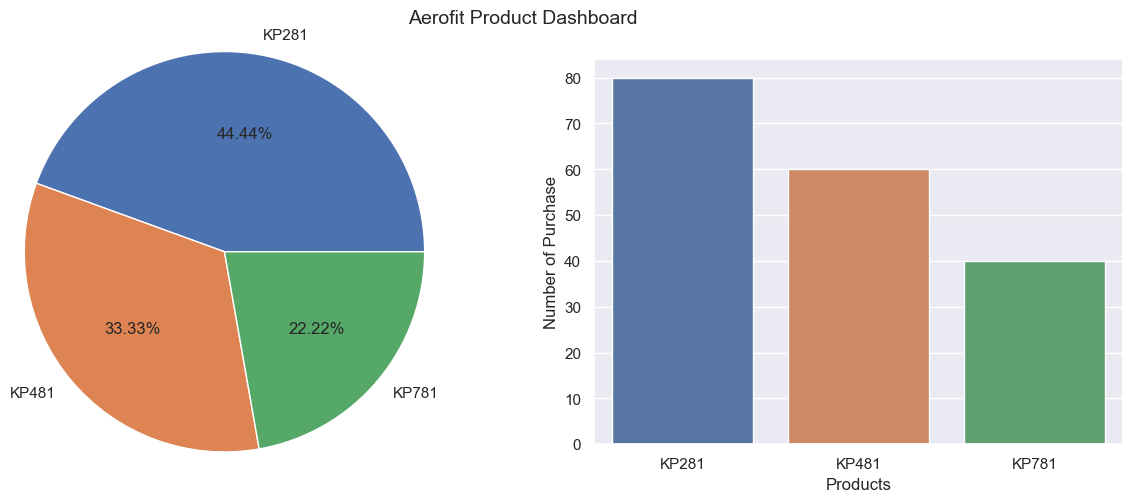

In [304]:
plt.figure(figsize=(15,5)).suptitle("Aerofit Product Dashboard",fontsize=14)

plt.subplot(1, 2, 1)
plt.pie(aerofit['Product'].value_counts().values,labels = aerofit['Product'].value_counts().index,radius = 1.3,autopct = '%1.2f%%',) # type: ignore

plt.subplot(1, 2, 2)
sns.countplot(aerofit, x='Product')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Number of Purchase', fontsize=12)

plt.show()

####
>Insight
* There is only 3 type of Product. which are `KP281`, `KP481` & `KP781`.
* There are 80 `KP281` which is equivalent to 44.44%.
* There are 60 `KP481` which is equivalent to 33.33%.
* There are 40 `KP781` which is equivalent to 22.22%.


### **<span style="color: orange;">Gender</span>**

In [305]:
aerofit['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [306]:
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [307]:
aerofit['Gender'].value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [308]:
aerofit['Gender'].describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

In [309]:
aerofit['Gender'].mode()[0]

'Male'

In [310]:
aerofit.groupby('Product')["Gender"].describe()

count unique     top freq
Product                          
KP281      80      2  Female   40
KP481      60      2    Male   31
KP781      40      2    Male   33

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Gender` across all Combination ***"Product ∩ Gender"***

In [311]:
pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize=True, margins=True)*100

Product      KP281      KP481      KP781         All
Gender                                              
Female   22.222222  16.111111   3.888889   42.222222
Male     22.222222  17.222222  18.333333   57.777778
All      44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Gender`  ***"Product | Gender"***

In [312]:
pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index', margins=True)*100

Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769
All      44.444444  33.333333  22.222222

##### Probability of `Gender` for given `Product` ***"Gender | Product"***

In [313]:
pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='columns', margins=True)*100

Product  KP281      KP481  KP781        All
Gender                                     
Female    50.0  48.333333   17.5  42.222222
Male      50.0  51.666667   82.5  57.777778

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

Text(0.5, 1.0, 'Probabbility of Product ∩ Gender')

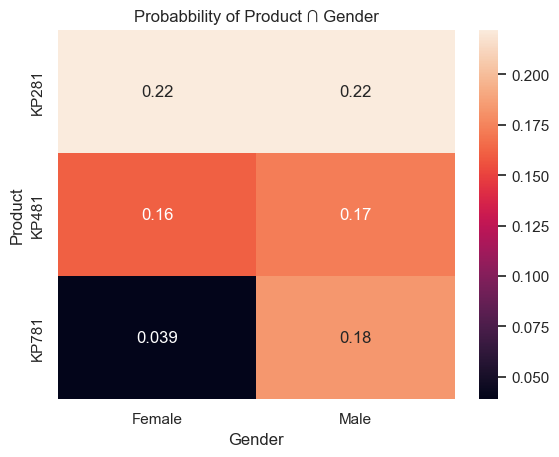

In [314]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['Gender'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Gender', fontsize=12)

##### `Descriptive` Plot

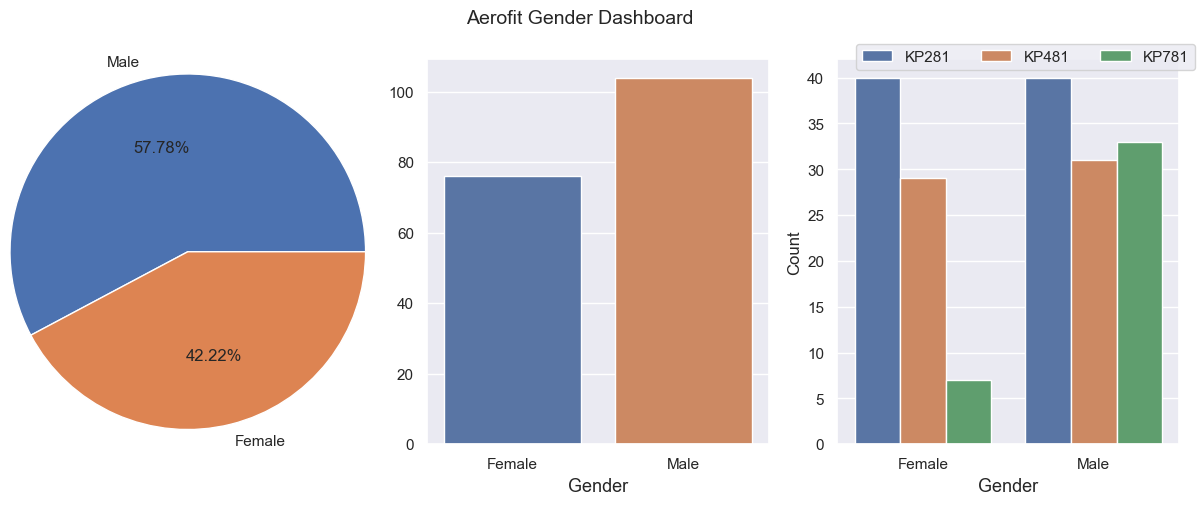

In [315]:
plt.figure(figsize=(15,5)).suptitle("Aerofit Gender Dashboard",fontsize=14)

plt.subplot(1, 3, 1)
plt.pie(aerofit['Gender'].value_counts().values,labels = aerofit['Gender'].value_counts().index,radius = 1.3,autopct = '%1.2f%%',) # type: ignore

plt.subplot(1, 3, 2)
sns.countplot(aerofit, x='Gender')
plt.ylabel('', fontsize=12)
plt.xlabel('Gender', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(1, 3, 3)
sns.countplot(aerofit, x='Gender', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=-1, ncol=3)

plt.show()

##### `Probability` Plot

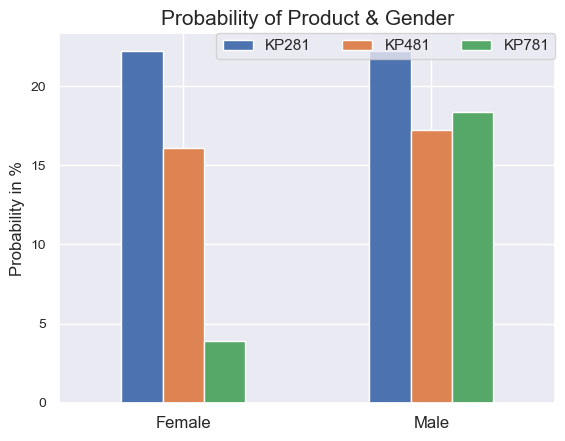

In [316]:
(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Gender', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=0, ncol=3)
plt.show()

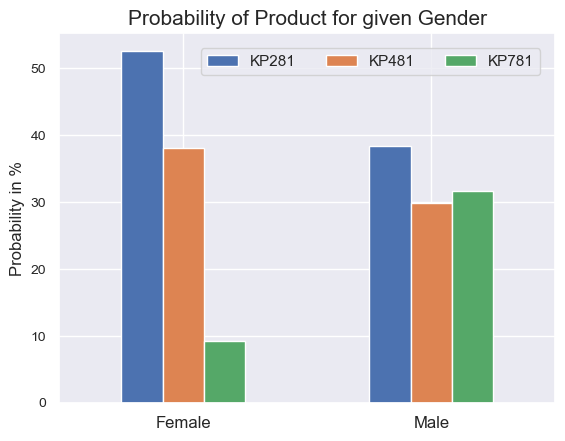

In [317]:
(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Gender', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=1, ncol=3)
plt.show()

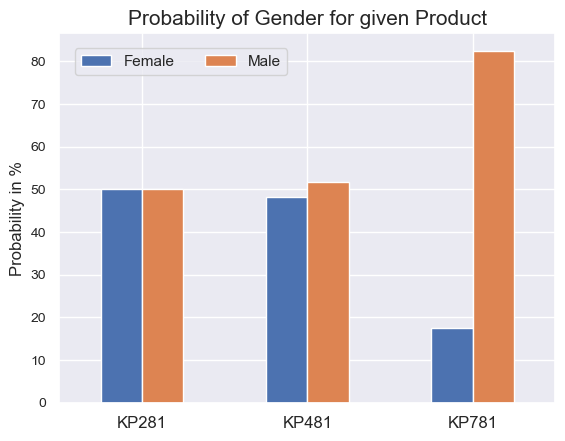

In [318]:
(pd.crosstab(aerofit['Product'], aerofit['Gender'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Gender for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=1, ncol=2)
plt.show()

##### `Population` Plot

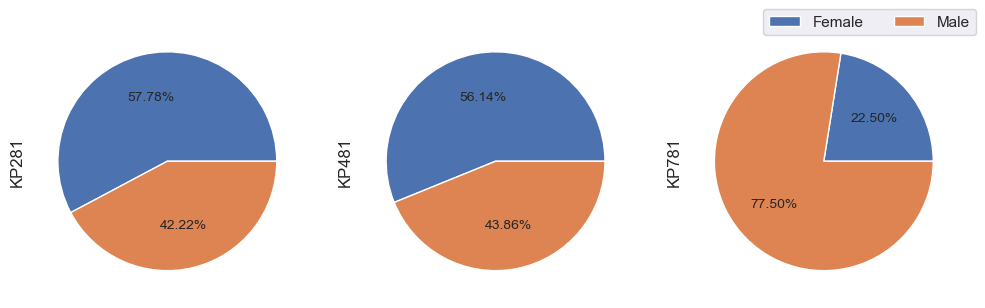

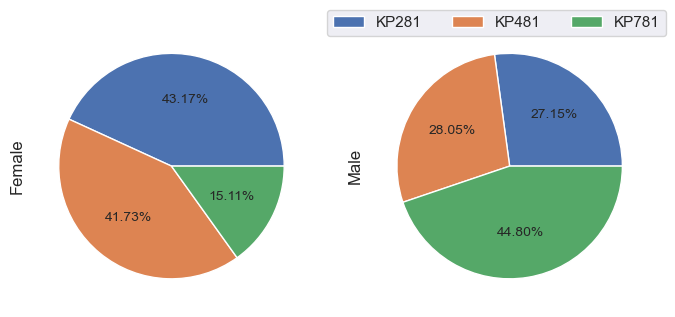

In [319]:
pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(12,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=3)
plt.show()
pd.crosstab(aerofit['Product'], aerofit['Gender'], normalize="index").plot(kind='pie', subplots=True, figsize=(8,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=3)
plt.show()

####
>Insight
* There are 104 `Male` which is equivalent to 57.78%.
* There are 76 `Female` which is equivalent to 42.22%.


### **<span style="color: orange;">Marital Status</span>**

In [320]:
aerofit['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [321]:
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [322]:
aerofit['MaritalStatus'].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [323]:
aerofit['MaritalStatus'].describe()

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

In [324]:
aerofit['MaritalStatus'].mode()[0]

'Partnered'

In [325]:
aerofit.groupby('Product')["MaritalStatus"].describe()

count unique        top freq
Product                             
KP281      80      2  Partnered   48
KP481      60      2  Partnered   36
KP781      40      2  Partnered   23

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Marital Status` across all Combination ***"Product ∩ Marital Status"***

In [326]:
pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True, margins=True)*100

Product            KP281      KP481      KP781         All
MaritalStatus                                             
Partnered      26.666667  20.000000  12.777778   59.444444
Single         17.777778  13.333333   9.444444   40.555556
All            44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Marital Status`  ***"Product | Marital Status"***

In [327]:
pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='index', margins=True)*100

Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671
All            44.444444  33.333333  22.222222

##### Probability of `Marital Status` for given `Product` ***"Marital Status | Product"***

In [328]:
pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='columns', margins=True)*100

Product        KP281  KP481  KP781        All
MaritalStatus                                
Partnered       60.0   60.0   57.5  59.444444
Single          40.0   40.0   42.5  40.555556

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

Text(0.5, 1.0, 'Probabbility of Product ∩ Marital Status')

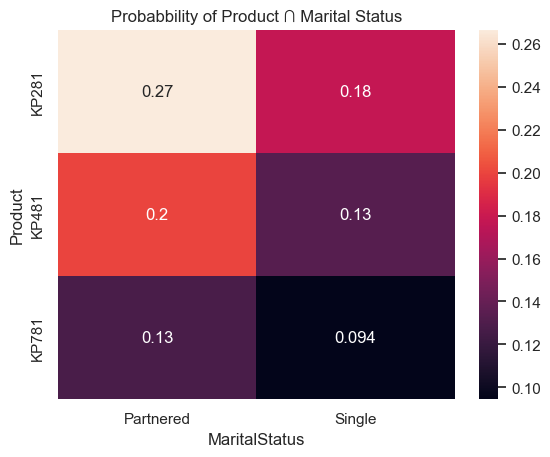

In [329]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Marital Status', fontsize=12)

##### `Descriptive` Plot

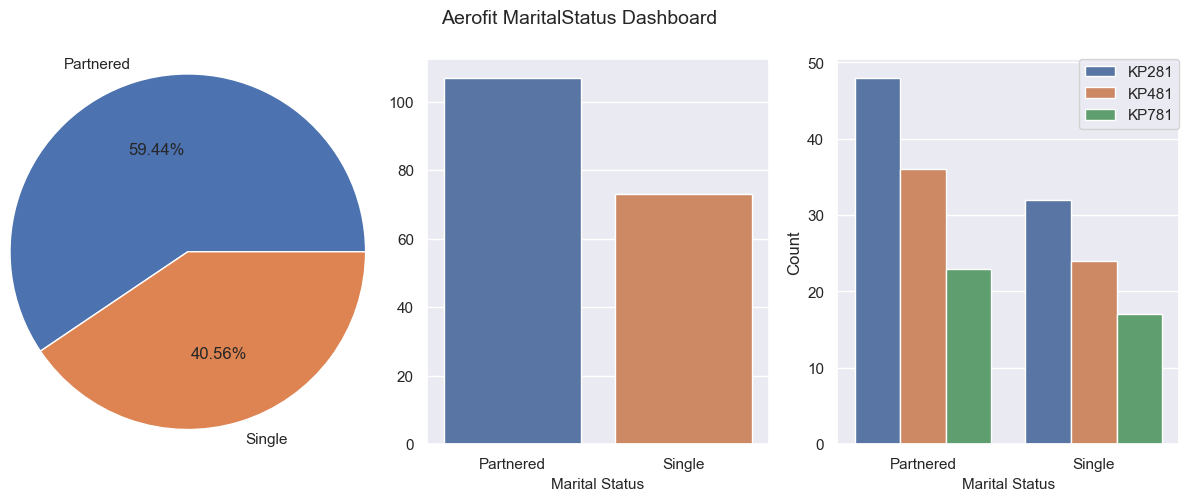

In [330]:
plt.figure(figsize=(15,5)).suptitle("Aerofit MaritalStatus Dashboard",fontsize=14)

plt.subplot(1, 3, 1)
plt.pie(aerofit['MaritalStatus'].value_counts().values,labels = aerofit['MaritalStatus'].value_counts().index,radius = 1.3,autopct = '%1.2f%%',) # type: ignore

plt.subplot(1, 3, 2)
sns.countplot(aerofit, x='MaritalStatus')
plt.ylabel('', fontsize=12)
plt.xlabel('Marital Status', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(1, 3, 3)
sns.countplot(aerofit, x='MaritalStatus', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=0, ncol=1)

plt.show()

##### `Probability` Plot

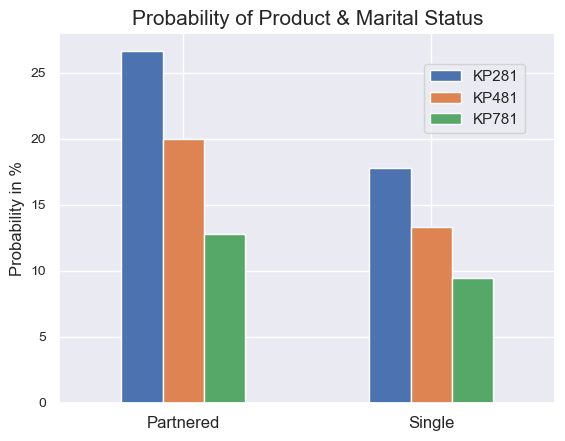

In [331]:
(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Marital Status', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

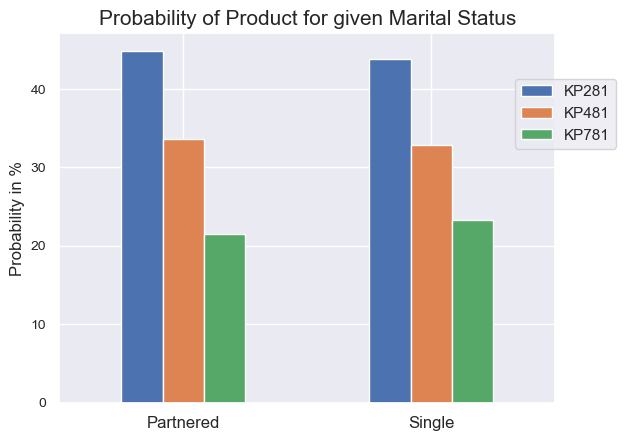

In [332]:
(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Marital Status', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=3)
plt.show()

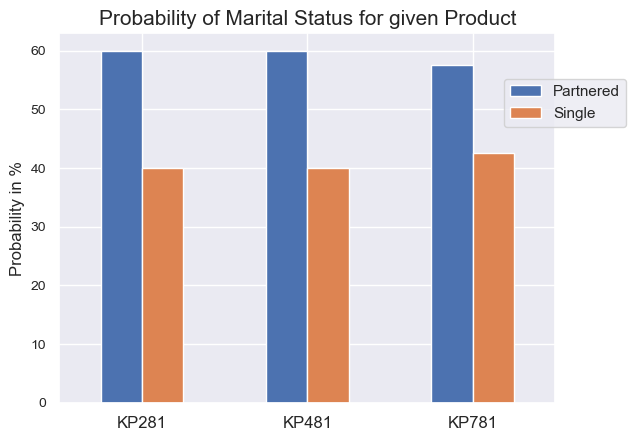

In [333]:
(pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Marital Status for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=3)
plt.show()

##### `Population` Plot

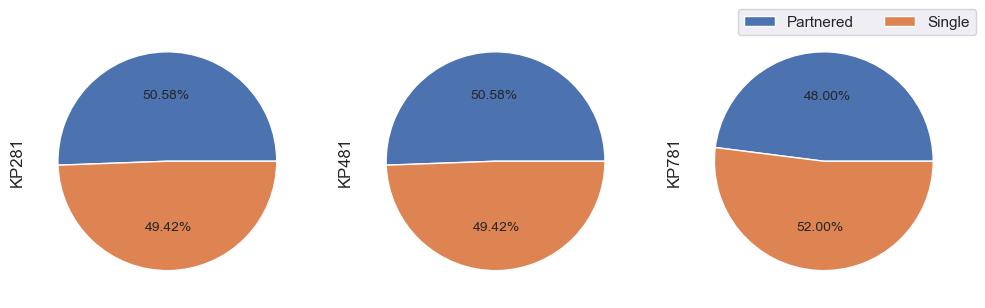

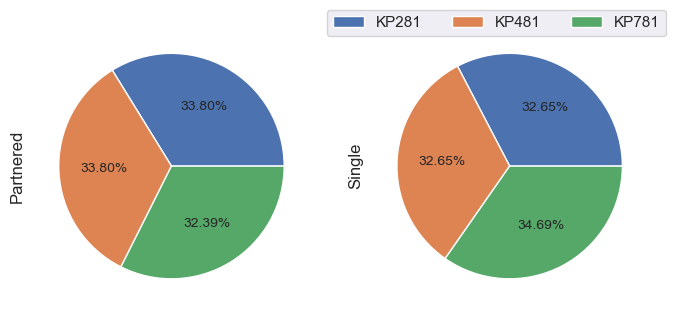

In [334]:
pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(12,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=3)
plt.show()
pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], normalize="index").plot(kind='pie', subplots=True, figsize=(8,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=3)
plt.show()

####
>Insight
* There are 107 `Partnered` which is equivalent to 59.44%.
* There are 73 `Single` which is equivalent to 40.56%.


### **<span style="color: orange;">Age</span>**

#### Age value Count

In [335]:
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [336]:
aerofit['Age'].value_counts()[:5]

25    25
23    18
24    12
26    12
28     9
Name: Age, dtype: int64

In [337]:
aerofit['Age'].value_counts(normalize=True)[:5]*100

25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
Name: Age, dtype: float64

#### Age Group Value Count

In [338]:
aerofit['age_group'].unique()

['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
Categories (8, object): ['0-15' < '15-20' < '20-25' < '25-30' < '30-35' < '35-40' < '40-45' < '45-50']

In [339]:
aerofit['age_group'].value_counts()[:5]

20-25    69
25-30    41
30-35    32
35-40    16
15-20    10
Name: age_group, dtype: int64

In [340]:
aerofit['age_group'].value_counts(normalize=True)[:5]*100

20-25    38.333333
25-30    22.777778
30-35    17.777778
35-40     8.888889
15-20     5.555556
Name: age_group, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [341]:
aerofit['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [342]:
aerofit['age_group'].describe()

count       180
unique        7
top       20-25
freq         69
Name: age_group, dtype: object

In [343]:
aerofit['Age'].mean()

28.788888888888888

In [344]:
aerofit['Age'].median()

26.0

In [345]:
aerofit['Age'].mode()[0]

25

In [346]:
aerofit.groupby('Product')["Age"].describe()

count   mean       std   min    25%   50%    75%   max
Product                                                        
KP281     80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0
KP481     60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0
KP781     40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0

In [347]:
aerofit.groupby('Product')["age_group"].describe()

count unique    top freq
Product                         
KP281      80      7  20-25   28
KP481      60      7  20-25   24
KP781      40      6  20-25   17

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [348]:
check_outlier(aerofit, 'Age')['upper']

{'list': 78     47
 79     50
 139    48
 178    47
 179    48
 Name: Age, dtype: int64,
 'length': 5}

In [349]:
check_outlier(aerofit, 'Age')['lower']

{'list': Series([], Name: Age, dtype: int64), 'length': 0}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Age Group` across all Combination ***"Product ∩ Age Group"***

In [350]:
pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize=True, margins=True)*100

Product        KP281      KP481      KP781         All
age_group                                             
15-20       3.333333   2.222222   0.000000    5.555556
20-25      15.555556  13.333333   9.444444   38.333333
25-30      11.666667   3.888889   7.222222   22.777778
30-35       6.111111   9.444444   2.222222   17.777778
35-40       4.444444   3.333333   1.111111    8.888889
40-45       1.666667   0.555556   1.111111    3.333333
45-50       1.666667   0.555556   1.111111    3.333333
All        44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Age Group`  ***"Product | Age Group"***

In [351]:
pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize='index', margins=True)*100

Product        KP281      KP481      KP781
age_group                                 
15-20      60.000000  40.000000   0.000000
20-25      40.579710  34.782609  24.637681
25-30      51.219512  17.073171  31.707317
30-35      34.375000  53.125000  12.500000
35-40      50.000000  37.500000  12.500000
40-45      50.000000  16.666667  33.333333
45-50      50.000000  16.666667  33.333333
All        44.444444  33.333333  22.222222

##### Probability of `Age Group` for given `Product` ***"Age Group | Product"***

In [352]:
pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize='columns', margins=True)*100

Product    KP281      KP481  KP781        All
age_group                                    
15-20       7.50   6.666667    0.0   5.555556
20-25      35.00  40.000000   42.5  38.333333
25-30      26.25  11.666667   32.5  22.777778
30-35      13.75  28.333333   10.0  17.777778
35-40      10.00  10.000000    5.0   8.888889
40-45       3.75   1.666667    5.0   3.333333
45-50       3.75   1.666667    5.0   3.333333

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

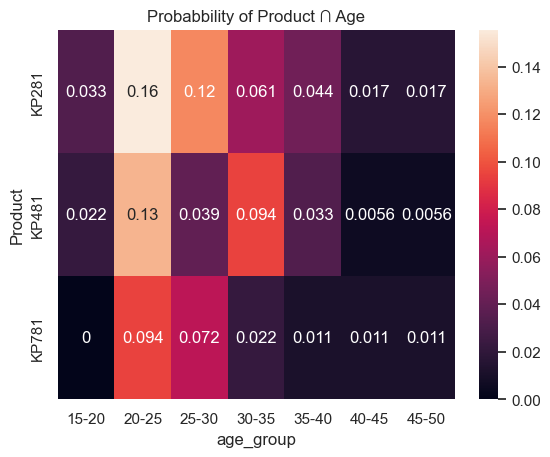

In [353]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['age_group'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Age', fontsize=12)
plt.show()

##### `Descriptive` Plot

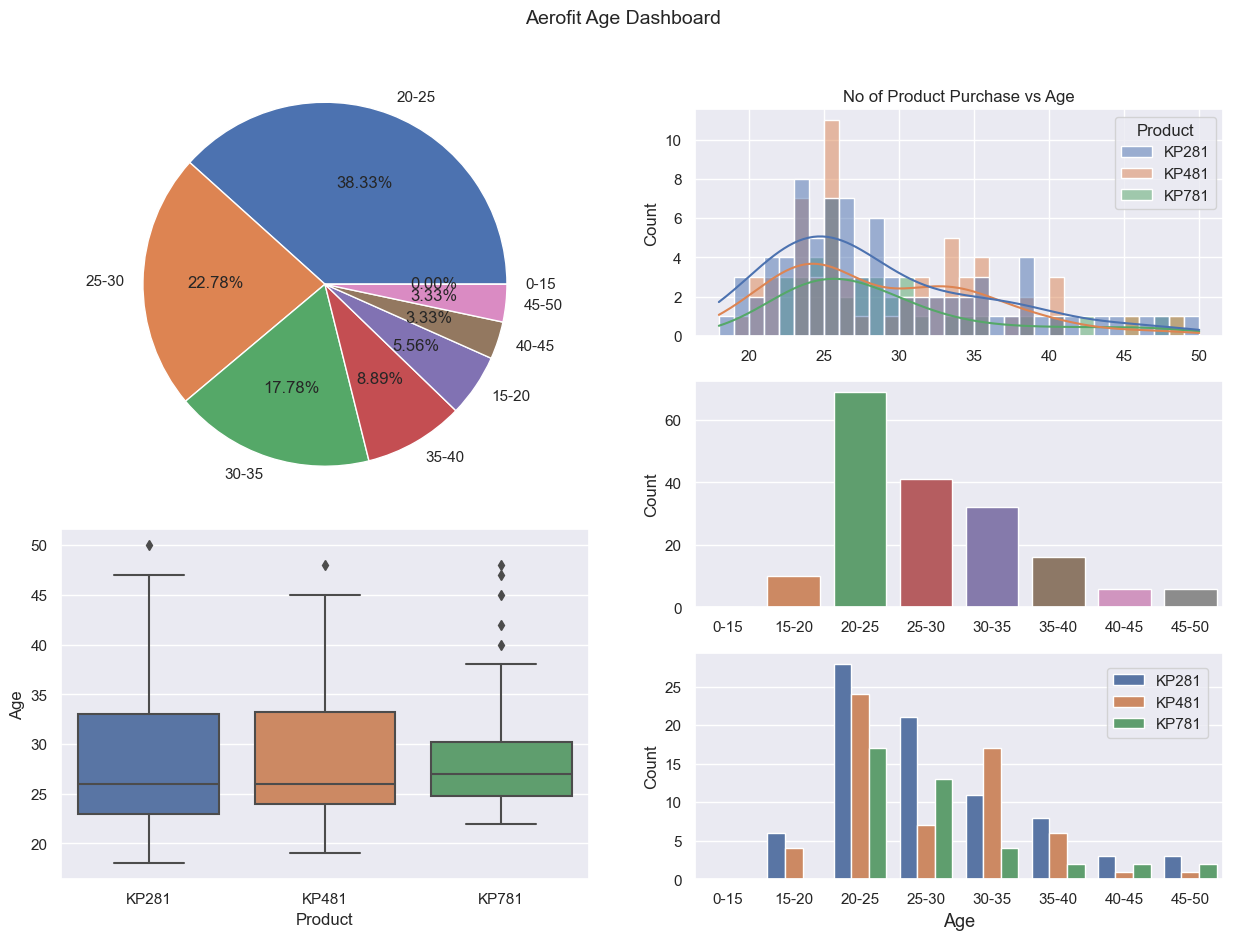

In [354]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Age Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['age_group'].value_counts().values,labels = aerofit['age_group'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Age", x='Product')

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Age', binwidth=1, kde=True, hue='Product')
plt.title('No of Product Purchase vs Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='age_group')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='age_group', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=1, ncol=1)

plt.show()

##### `Probability` Plot

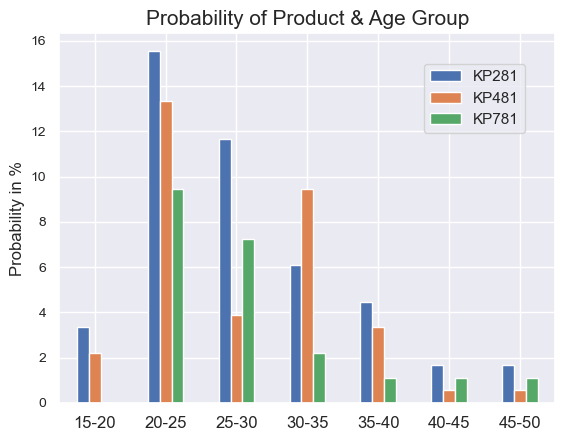

In [355]:
(pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Age Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

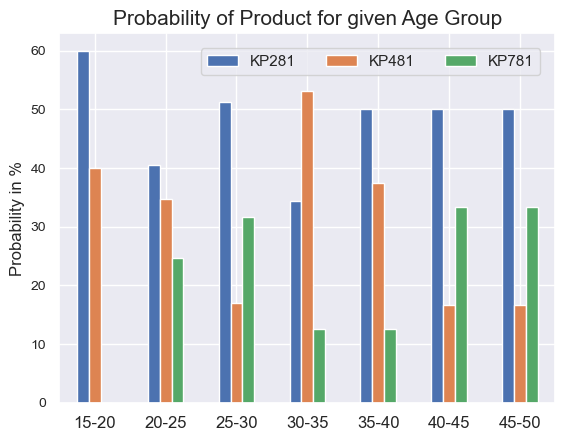

In [356]:
(pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Age Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=1, ncol=3)
plt.show()

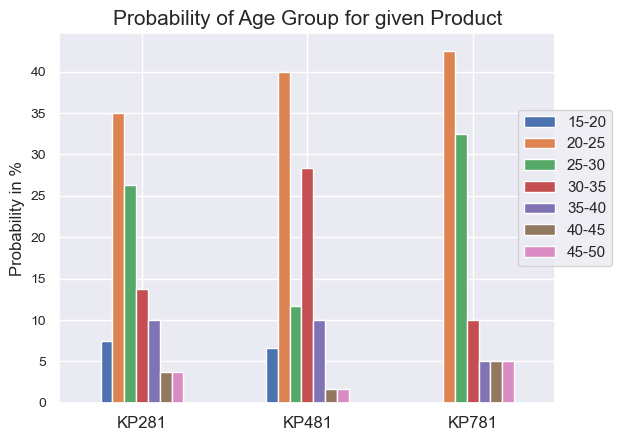

In [357]:
(pd.crosstab(aerofit['Product'], aerofit['age_group'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Age Group for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

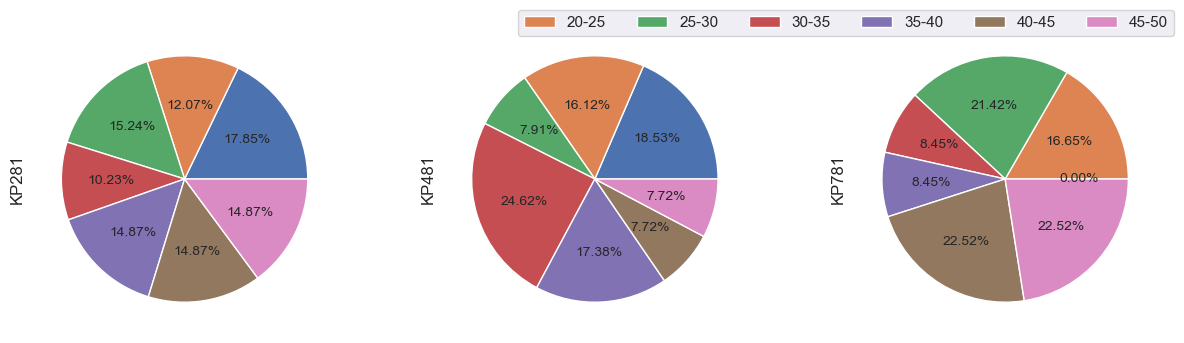

In [358]:
pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=6)
plt.show()

### **<span style="color: orange;">Income</span>**

#### Income value Count

In [359]:
aerofit['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [360]:
aerofit['Income'].value_counts()[:5]

45480    14
52302     9
46617     8
54576     8
53439     8
Name: Income, dtype: int64

In [361]:
aerofit['Income'].value_counts(normalize=True)[:5]*100

45480    7.777778
52302    5.000000
46617    4.444444
54576    4.444444
53439    4.444444
Name: Income, dtype: float64

#### Income Group Value Count

In [362]:
aerofit['income_group'].unique()

['25K-35K', '35K-45K', '45K-55K', '65K-75K', '55K-65K', '75K-85K', '85K-95K', '95K-105K']
Categories (9, object): ['0-25K' < '25K-35K' < '35K-45K' < '45K-55K' ... '65K-75K' < '75K-85K' < '85K-95K' < '95K-105K']

In [363]:
aerofit['income_group'].value_counts()[:5]

45K-55K    77
35K-45K    35
55K-65K    26
25K-35K    14
85K-95K    11
Name: income_group, dtype: int64

In [364]:
aerofit['income_group'].value_counts(normalize=True)[:5]*100

45K-55K    42.777778
35K-45K    19.444444
55K-65K    14.444444
25K-35K     7.777778
85K-95K     6.111111
Name: income_group, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [365]:
aerofit['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [366]:
aerofit['income_group'].describe()

count         180
unique          8
top       45K-55K
freq           77
Name: income_group, dtype: object

In [367]:
aerofit['Income'].mean()

53719.57777777778

In [368]:
aerofit['Income'].median()

50596.5

In [369]:
aerofit['Income'].mode()[0]

45480

In [370]:
aerofit.groupby('Product')["Income"].describe()

count       mean           std      min       25%      50%      75%  \
Product                                                                        
KP281     80.0  46418.025   9075.783190  29562.0  38658.00  46617.0  53439.0   
KP481     60.0  48973.650   8653.989388  31836.0  44911.50  49459.5  53439.0   
KP781     40.0  75441.575  18505.836720  48556.0  58204.75  76568.5  90886.0   

              max  
Product            
KP281     68220.0  
KP481     67083.0  
KP781    104581.0

In [371]:
aerofit.groupby('Product')["income_group"].describe()

count unique      top freq
Product                           
KP281      80      5  45K-55K   35
KP481      60      5  45K-55K   33
KP781      40      6  85K-95K   11

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [372]:
check_outlier(aerofit, 'Income')['upper']

{'list': 159     83416
 160     88396
 161     90886
 162     92131
 164     88396
 166     85906
 167     90886
 168    103336
 169     99601
 170     89641
 171     95866
 172     92131
 173     92131
 174    104581
 175     83416
 176     89641
 177     90886
 178    104581
 179     95508
 Name: Income, dtype: int64,
 'length': 19}

In [373]:
check_outlier(aerofit, 'Income')['lower']

{'list': Series([], Name: Income, dtype: int64), 'length': 0}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Income Group` across all Combination ***"Product ∩ Income Group"***

In [374]:
pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize=True, margins=True)*100

Product           KP281      KP481      KP781         All
income_group                                             
25K-35K        4.444444   3.333333   0.000000    7.777778
35K-45K       14.444444   5.000000   0.000000   19.444444
45K-55K       19.444444  18.333333   5.000000   42.777778
55K-65K        5.000000   5.555556   3.888889   14.444444
65K-75K        1.111111   1.111111   1.666667    3.888889
75K-85K        0.000000   0.000000   2.222222    2.222222
85K-95K        0.000000   0.000000   6.111111    6.111111
95K-105K       0.000000   0.000000   3.333333    3.333333
All           44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Income Group`  ***"Product | Income Group"***

In [375]:
pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize='index', margins=True)*100

Product           KP281      KP481       KP781
income_group                                  
25K-35K       57.142857  42.857143    0.000000
35K-45K       74.285714  25.714286    0.000000
45K-55K       45.454545  42.857143   11.688312
55K-65K       34.615385  38.461538   26.923077
65K-75K       28.571429  28.571429   42.857143
75K-85K        0.000000   0.000000  100.000000
85K-95K        0.000000   0.000000  100.000000
95K-105K       0.000000   0.000000  100.000000
All           44.444444  33.333333   22.222222

##### Probability of `Income Group` for given `Product` ***"Income Group | Product"***

In [376]:
pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize='columns', margins=True)*100

Product       KP281      KP481  KP781        All
income_group                                    
25K-35K       10.00  10.000000    0.0   7.777778
35K-45K       32.50  15.000000    0.0  19.444444
45K-55K       43.75  55.000000   22.5  42.777778
55K-65K       11.25  16.666667   17.5  14.444444
65K-75K        2.50   3.333333    7.5   3.888889
75K-85K        0.00   0.000000   10.0   2.222222
85K-95K        0.00   0.000000   27.5   6.111111
95K-105K       0.00   0.000000   15.0   3.333333

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

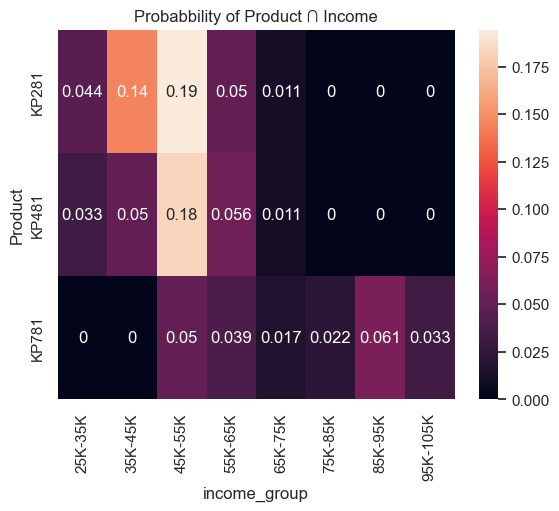

In [377]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['income_group'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Income', fontsize=12)
plt.show()

##### `Descriptive` Plot

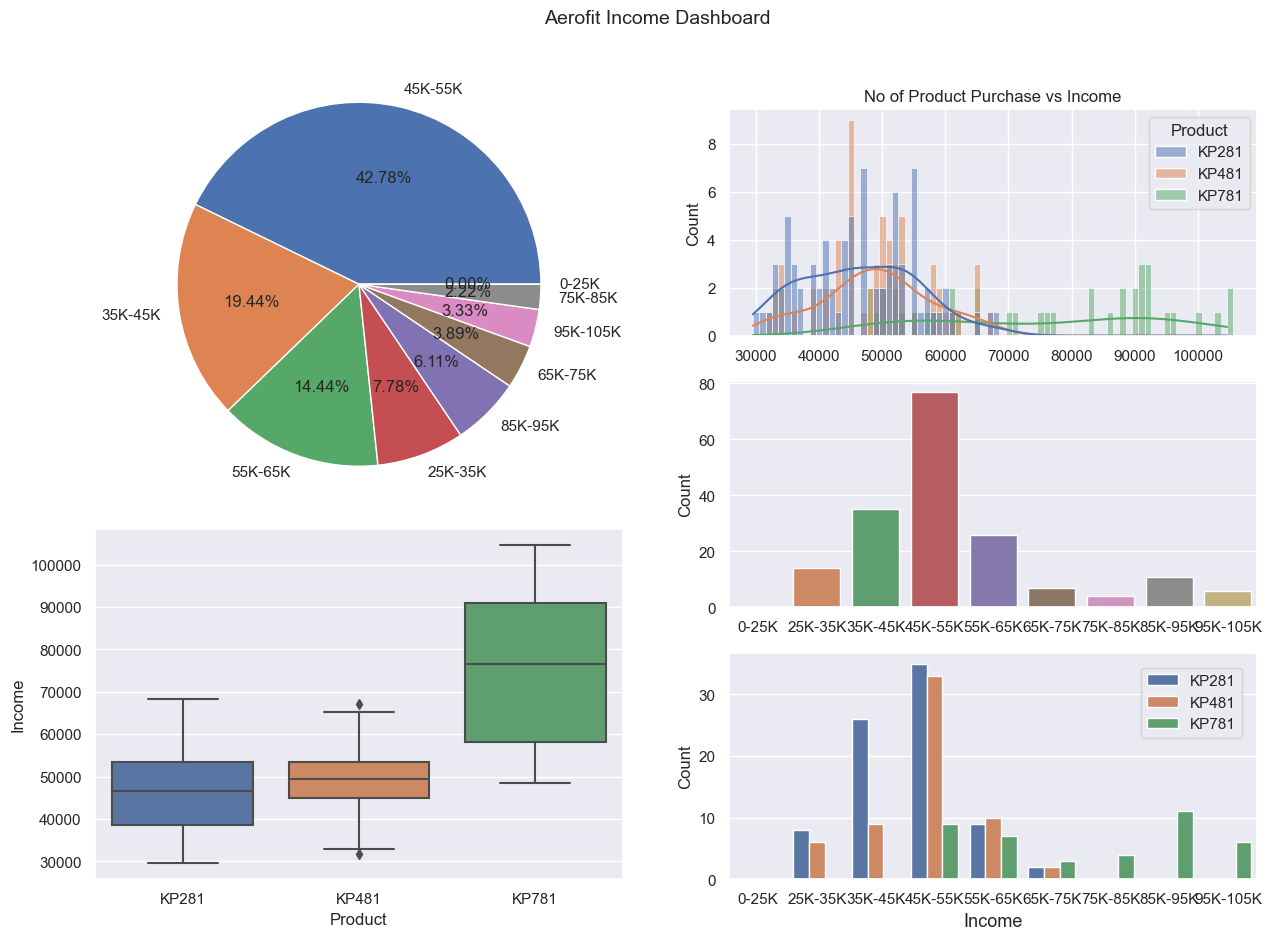

In [378]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Income Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['income_group'].value_counts().values,labels = aerofit['income_group'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Income", x='Product')

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Income', binwidth=1000, kde=True, hue='Product')
plt.title('No of Product Purchase vs Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='income_group')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='income_group', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Income', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=1, ncol=1)

plt.show()

##### `Probability` Plot

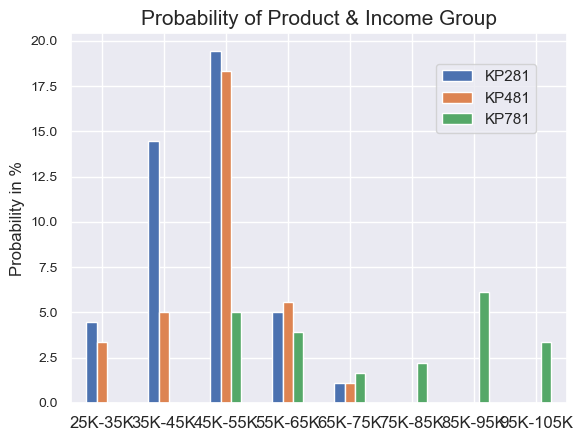

In [379]:
(pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Income Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

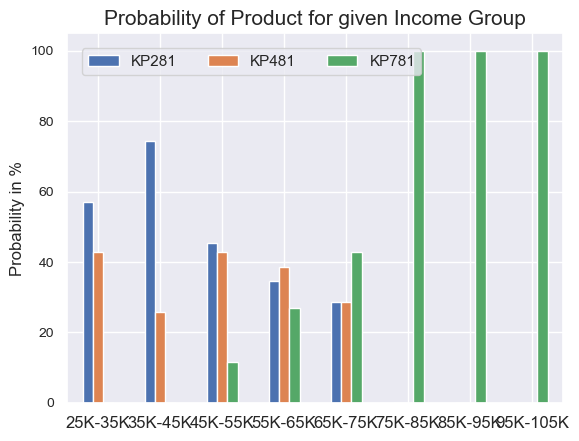

In [380]:
(pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Income Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=1, ncol=3)
plt.show()

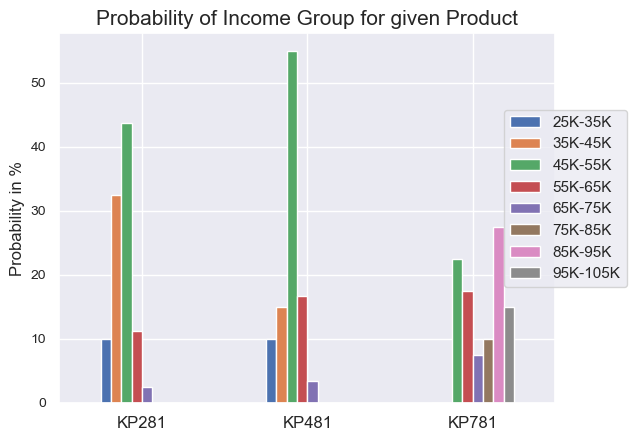

In [381]:
(pd.crosstab(aerofit['Product'], aerofit['income_group'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Income Group for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

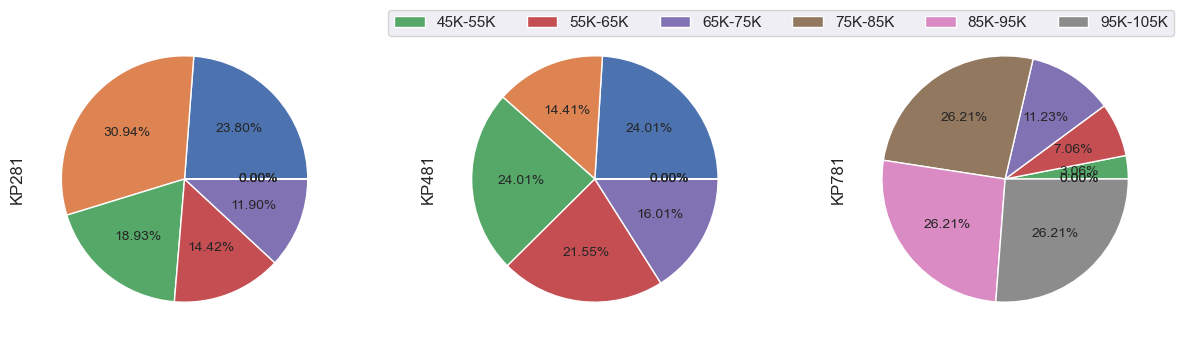

In [382]:
pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=6)
plt.show()

### **<span style="color: orange;">Miles</span>**

#### Miles value Count

In [383]:
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [384]:
aerofit['Miles'].value_counts()[:5]

85    27
95    12
66    10
75    10
47     9
Name: Miles, dtype: int64

In [385]:
aerofit['Miles'].value_counts(normalize=True)[:5]*100

85    15.000000
95     6.666667
66     5.555556
75     5.555556
47     5.000000
Name: Miles, dtype: float64

#### Miles Group Value Count

In [386]:
aerofit['miles_group'].unique()

['110-140', '50-80', '80-110', '20-50', '140-170', ..., '200-230', '230-260', '290-320', '260-290', '350-380']
Length: 11
Categories (13, object): ['0-20' < '20-50' < '50-80' < '80-110' ... '260-290' < '290-320' < '320-350' < '350-380']

In [387]:
aerofit['miles_group'].value_counts()[:5]

80-110     66
50-80      43
110-140    20
20-50      17
140-170    15
Name: miles_group, dtype: int64

In [388]:
aerofit['miles_group'].value_counts(normalize=True)[:5]*100

80-110     36.666667
50-80      23.888889
110-140    11.111111
20-50       9.444444
140-170     8.333333
Name: miles_group, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [389]:
aerofit['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [390]:
aerofit['miles_group'].describe()

count        180
unique        11
top       80-110
freq          66
Name: miles_group, dtype: object

In [391]:
aerofit['Miles'].mean()

103.19444444444444

In [392]:
aerofit['Miles'].median()

94.0

In [393]:
aerofit['Miles'].mode()[0]

85

In [394]:
aerofit.groupby('Product')["Miles"].describe()

count        mean        std   min    25%    50%    75%    max
Product                                                                
KP281     80.0   82.787500  28.874102  38.0   66.0   85.0   94.0  188.0
KP481     60.0   87.933333  33.263135  21.0   64.0   85.0  106.0  212.0
KP781     40.0  166.900000  60.066544  80.0  120.0  160.0  200.0  360.0

In [395]:
aerofit.groupby('Product')["miles_group"].describe()

count unique      top freq
Product                           
KP281      80      6   80-110   27
KP481      60      6   80-110   31
KP781      40      9  170-200   12

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [396]:
check_outlier(aerofit, 'Miles')['upper']

{'list': 23     188
 84     212
 142    200
 148    200
 152    200
 155    240
 166    300
 167    280
 170    260
 171    200
 173    360
 175    200
 176    200
 Name: Miles, dtype: int64,
 'length': 13}

In [397]:
check_outlier(aerofit, 'Miles')['lower']

{'list': Series([], Name: Miles, dtype: int64), 'length': 0}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Miles Group` across all Combination ***"Product ∩ Miles Group"***

In [398]:
pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize=True, margins=True)*100

Product          KP281      KP481      KP781         All
miles_group                                             
20-50         6.666667   2.777778   0.000000    9.444444
50-80        14.444444   8.888889   0.555556   23.888889
80-110       15.000000  17.222222   4.444444   36.666667
110-140       6.111111   2.777778   2.222222   11.111111
140-170       1.666667   1.111111   5.555556    8.333333
170-200       0.555556   0.000000   6.666667    7.222222
200-230       0.000000   0.555556   0.000000    0.555556
230-260       0.000000   0.000000   1.111111    1.111111
260-290       0.000000   0.000000   0.555556    0.555556
290-320       0.000000   0.000000   0.555556    0.555556
350-380       0.000000   0.000000   0.555556    0.555556
All          44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Miles Group`  ***"Product | Miles Group"***

In [399]:
pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize='index', margins=True)*100

Product          KP281       KP481       KP781
miles_group                                   
20-50        70.588235   29.411765    0.000000
50-80        60.465116   37.209302    2.325581
80-110       40.909091   46.969697   12.121212
110-140      55.000000   25.000000   20.000000
140-170      20.000000   13.333333   66.666667
170-200       7.692308    0.000000   92.307692
200-230       0.000000  100.000000    0.000000
230-260       0.000000    0.000000  100.000000
260-290       0.000000    0.000000  100.000000
290-320       0.000000    0.000000  100.000000
350-380       0.000000    0.000000  100.000000
All          44.444444   33.333333   22.222222

##### Probability of `Miles Group` for given `Product` ***"Miles Group | Product"***

In [400]:
pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize='columns', margins=True)*100

Product      KP281      KP481  KP781        All
miles_group                                    
20-50        15.00   8.333333    0.0   9.444444
50-80        32.50  26.666667    2.5  23.888889
80-110       33.75  51.666667   20.0  36.666667
110-140      13.75   8.333333   10.0  11.111111
140-170       3.75   3.333333   25.0   8.333333
170-200       1.25   0.000000   30.0   7.222222
200-230       0.00   1.666667    0.0   0.555556
230-260       0.00   0.000000    5.0   1.111111
260-290       0.00   0.000000    2.5   0.555556
290-320       0.00   0.000000    2.5   0.555556
350-380       0.00   0.000000    2.5   0.555556

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

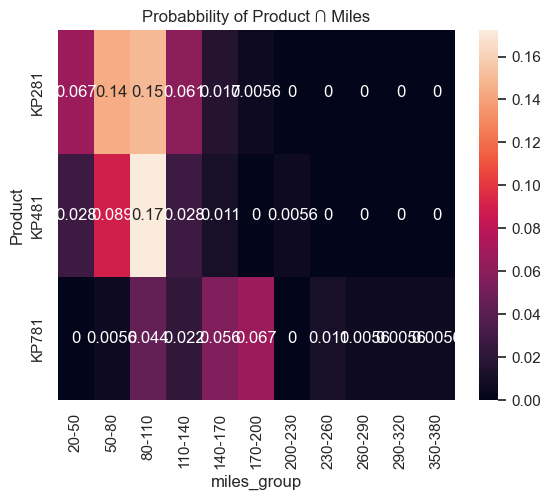

In [401]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['miles_group'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Miles', fontsize=12)
plt.show()

##### `Descriptive` Plot

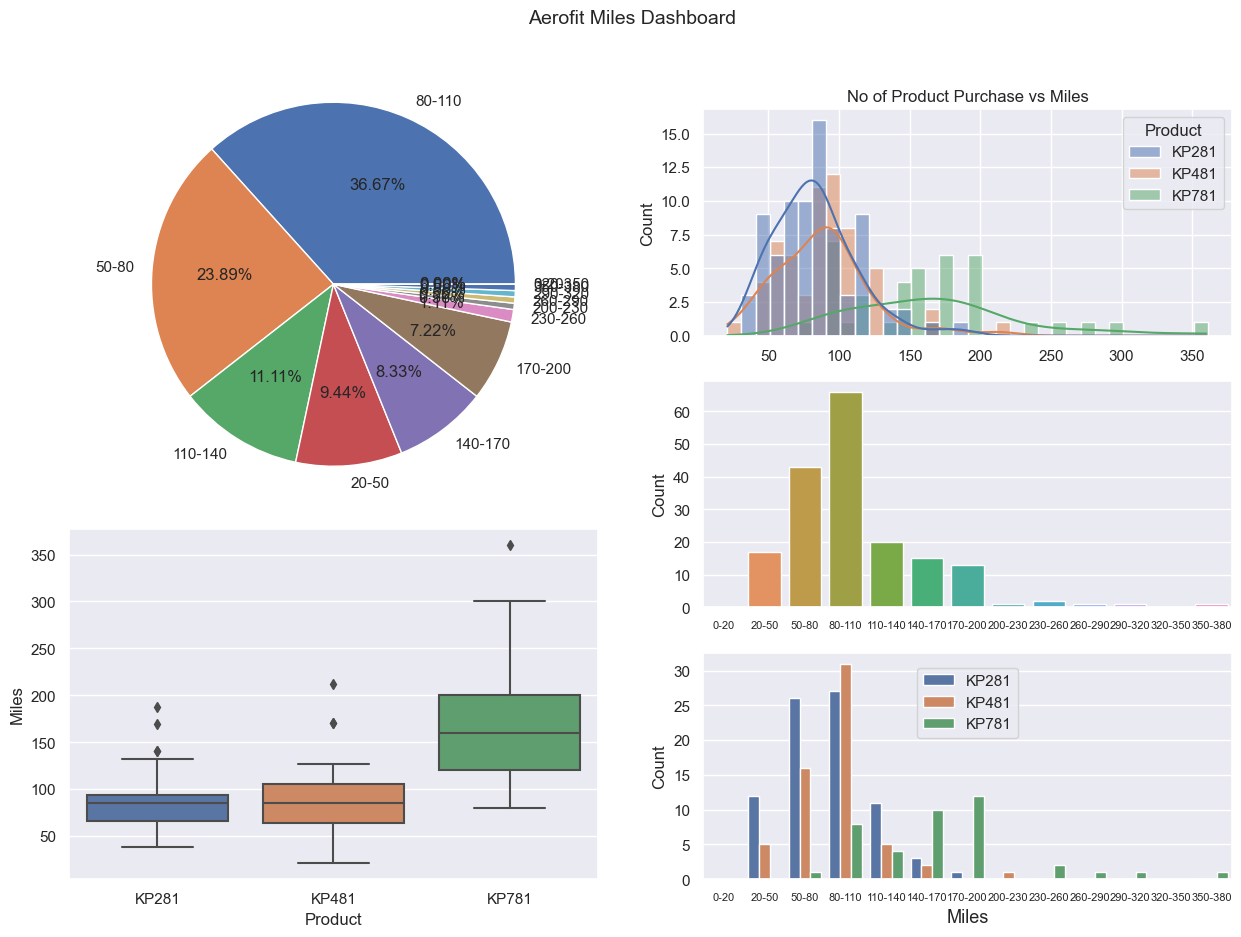

In [402]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Miles Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['miles_group'].value_counts().values,labels = aerofit['miles_group'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Miles", x='Product')

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Miles', binwidth=10, kde=True, hue='Product')
plt.title('No of Product Purchase vs Miles', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='miles_group')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='miles_group', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Miles', fontsize=13)
plt.xticks(fontsize=8)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=1, ncol=1)

plt.show()

##### `Probability` Plot

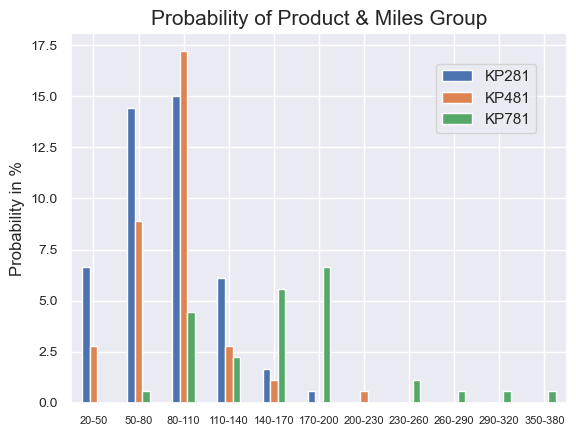

In [403]:
(pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Miles Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=8)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

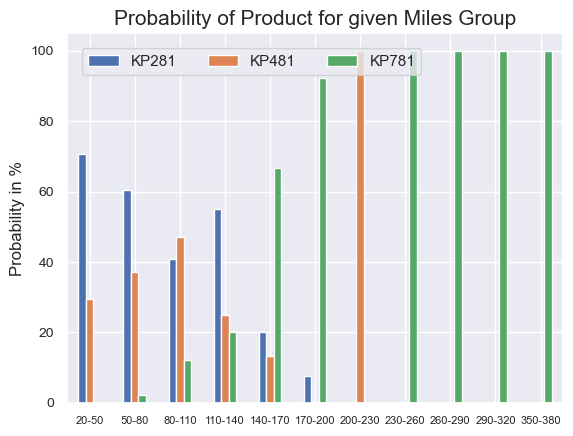

In [404]:
(pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Miles Group', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=8)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(borderaxespad=1, ncol=3)
plt.show()

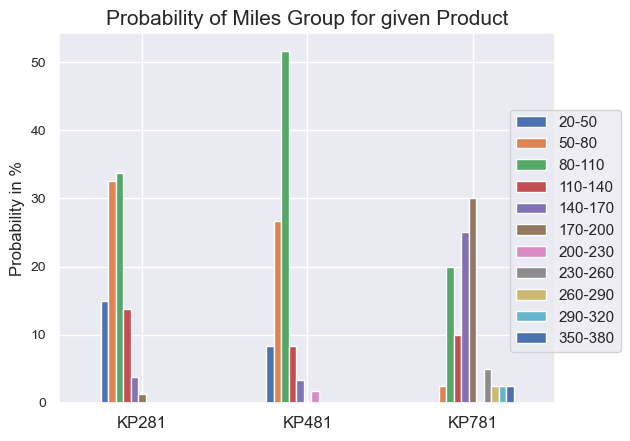

In [405]:
(pd.crosstab(aerofit['Product'], aerofit['miles_group'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Miles Group for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

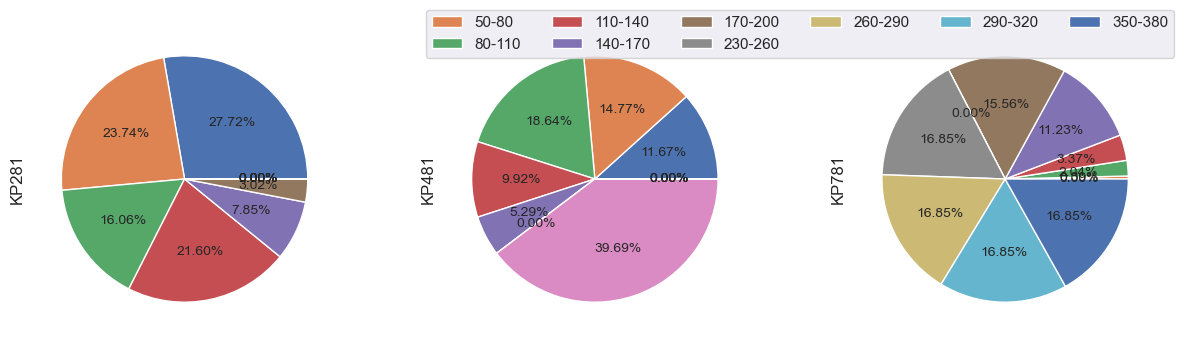

In [406]:
pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,4), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=6)
plt.show()

### **<span style="color: orange;">Education</span>**

In [407]:
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [408]:
aerofit['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [409]:
aerofit['Education'].value_counts(normalize=True)*100

16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Education, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [410]:
aerofit['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [411]:
aerofit['Education'].mean()

15.572222222222223

In [412]:
aerofit['Education'].median()

16.0

In [413]:
aerofit['Education'].mode()[0]

16

In [414]:
aerofit.groupby('Product')["Education"].describe()

count       mean       std   min   25%   50%   75%   max
Product                                                          
KP281     80.0  15.037500  1.216383  12.0  14.0  16.0  16.0  18.0
KP481     60.0  15.116667  1.222552  12.0  14.0  16.0  16.0  18.0
KP781     40.0  17.325000  1.639066  14.0  16.0  18.0  18.0  21.0

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [415]:
check_outlier(aerofit, 'Education')['upper']

{'list': 156    20
 157    21
 161    21
 175    21
 Name: Education, dtype: int64,
 'length': 4}

In [416]:
check_outlier(aerofit, 'Education')['lower']

{'list': Series([], Name: Education, dtype: int64), 'length': 0}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Education` across all Combination ***"Product ∩ Education"***

In [417]:
pd.crosstab(aerofit['Education'], aerofit['Product'], normalize=True, margins=True)*100

Product        KP281      KP481      KP781         All
Education                                             
12          1.111111   0.555556   0.000000    1.666667
13          1.666667   1.111111   0.000000    2.777778
14         16.666667  12.777778   1.111111   30.555556
15          2.222222   0.555556   0.000000    2.777778
16         21.666667  17.222222   8.333333   47.222222
18          1.111111   1.111111  10.555556   12.777778
20          0.000000   0.000000   0.555556    0.555556
21          0.000000   0.000000   1.666667    1.666667
All        44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Education`  ***"Product | Education"***

In [418]:
pd.crosstab(aerofit['Education'], aerofit['Product'], normalize='index', margins=True)*100

Product        KP281      KP481       KP781
Education                                  
12         66.666667  33.333333    0.000000
13         60.000000  40.000000    0.000000
14         54.545455  41.818182    3.636364
15         80.000000  20.000000    0.000000
16         45.882353  36.470588   17.647059
18          8.695652   8.695652   82.608696
20          0.000000   0.000000  100.000000
21          0.000000   0.000000  100.000000
All        44.444444  33.333333   22.222222

##### Probability of `Education` for given `Product` ***"Education | Product"***

In [419]:
pd.crosstab(aerofit['Education'], aerofit['Product'], normalize='columns', margins=True)*100

Product    KP281      KP481  KP781        All
Education                                    
12          2.50   1.666667    0.0   1.666667
13          3.75   3.333333    0.0   2.777778
14         37.50  38.333333    5.0  30.555556
15          5.00   1.666667    0.0   2.777778
16         48.75  51.666667   37.5  47.222222
18          2.50   3.333333   47.5  12.777778
20          0.00   0.000000    2.5   0.555556
21          0.00   0.000000    7.5   1.666667

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

Text(0.5, 1.0, 'Probabbility of Product ∩ Education')

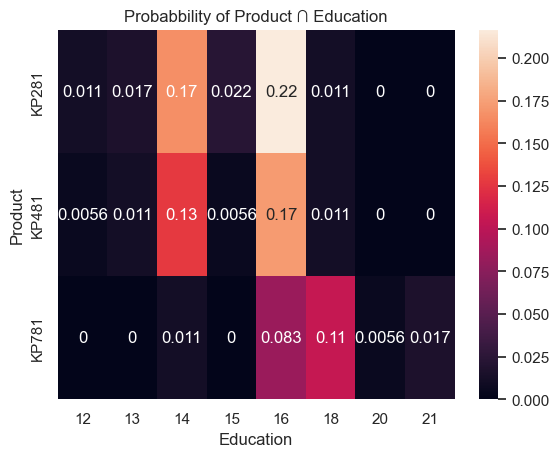

In [420]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['Education'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Education', fontsize=12)

##### `Descriptive` Plot

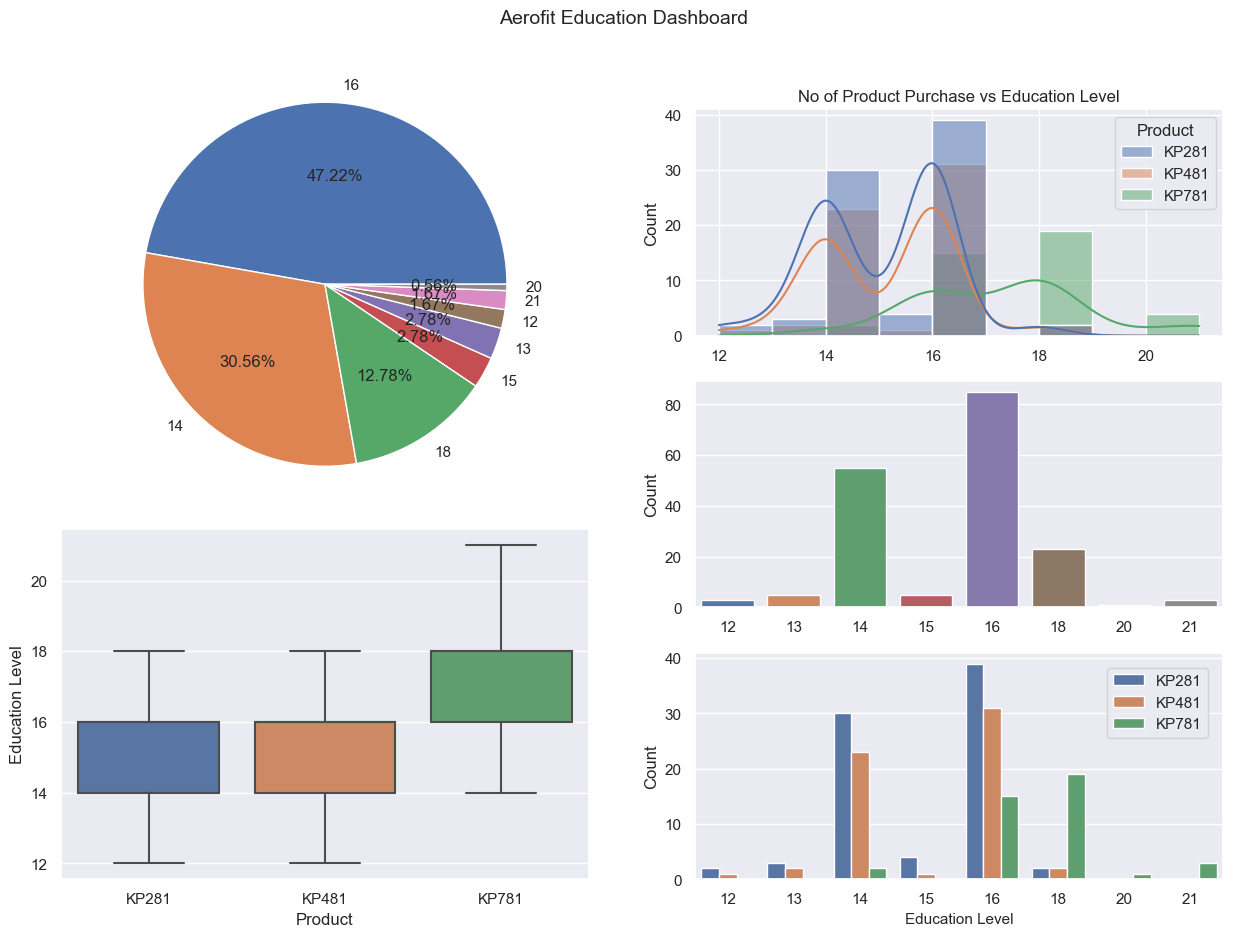

In [421]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Education Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['Education'].value_counts().values,labels = aerofit['Education'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Education", x='Product')
plt.ylabel('Education Level', fontsize=12)

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Education', binwidth=1, kde=True, hue="Product")
plt.title('No of Product Purchase vs Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='Education')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='Education', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education Level', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=1, ncol=1)

plt.show()

##### `Probability` Plot

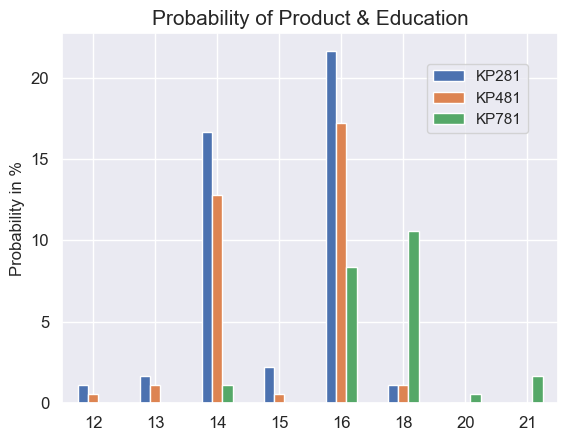

In [422]:
(pd.crosstab(aerofit['Education'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Education', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

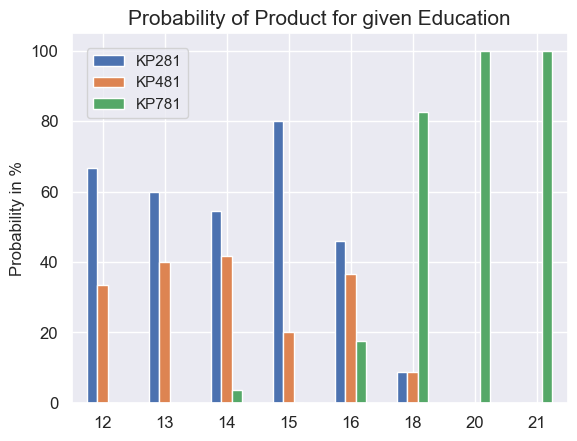

In [423]:
(pd.crosstab(aerofit['Education'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Education', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=1, ncol=1)
plt.show()

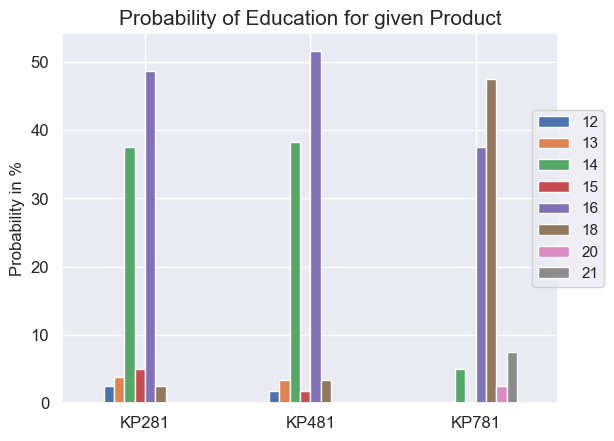

In [424]:
(pd.crosstab(aerofit['Product'], aerofit['Education'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Education for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

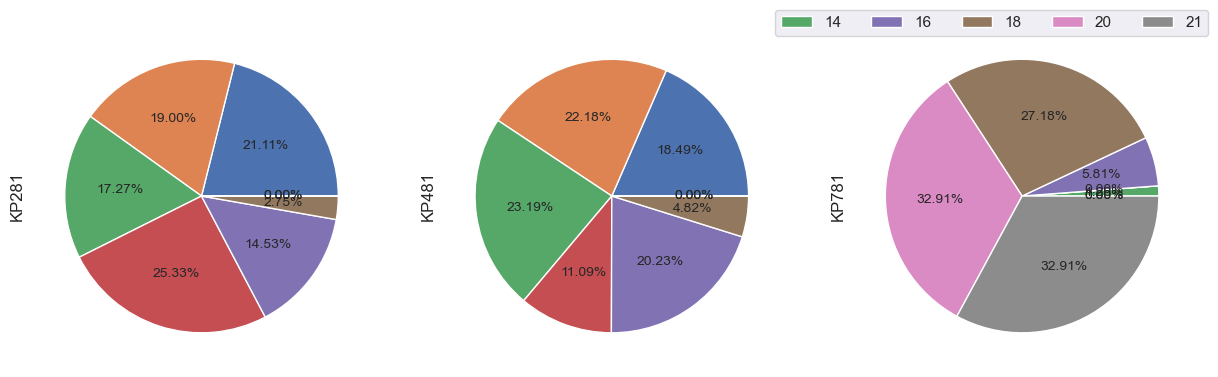

In [425]:
pd.crosstab(aerofit['Education'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,5), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=5)
plt.show()

### **<span style="color: orange;">Fitness</span>**

In [426]:
aerofit['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [427]:
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [428]:
aerofit['Fitness'].value_counts(normalize=True)*100

3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: Fitness, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [429]:
aerofit['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [430]:
aerofit['Fitness'].mean()

3.311111111111111

In [431]:
aerofit['Fitness'].median()

3.0

In [432]:
aerofit['Fitness'].mode()[0]

3

In [433]:
aerofit.groupby('Product')["Fitness"].describe()

count    mean       std  min  25%  50%  75%  max
Product                                                  
KP281     80.0  2.9625  0.664540  1.0  3.0  3.0  3.0  5.0
KP481     60.0  2.9000  0.629770  1.0  3.0  3.0  3.0  4.0
KP781     40.0  4.6250  0.667467  3.0  4.0  5.0  5.0  5.0

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [434]:
check_outlier(aerofit, 'Fitness')['upper']

{'list': Series([], Name: Fitness, dtype: int64), 'length': 0}

In [435]:
check_outlier(aerofit, 'Fitness')['lower']

{'list': 14     1
 117    1
 Name: Fitness, dtype: int64,
 'length': 2}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Fitness` across all Combination ***"Product ∩ Fitness"***

In [436]:
pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize=True, margins=True)*100

Product      KP281      KP481      KP781         All
Fitness                                             
1         0.555556   0.555556   0.000000    1.111111
2         7.777778   6.666667   0.000000   14.444444
3        30.000000  21.666667   2.222222   53.888889
4         5.000000   4.444444   3.888889   13.333333
5         1.111111   0.000000  16.111111   17.222222
All      44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Fitness`  ***"Product | Fitness"***

In [437]:
pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='index', margins=True)*100

Product      KP281      KP481      KP781
Fitness                                 
1        50.000000  50.000000   0.000000
2        53.846154  46.153846   0.000000
3        55.670103  40.206186   4.123711
4        37.500000  33.333333  29.166667
5         6.451613   0.000000  93.548387
All      44.444444  33.333333  22.222222

##### Probability of `Fitness` for given `Product` ***"Fitness | Product"***

In [438]:
pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='columns', margins=True)*100

Product  KP281      KP481  KP781        All
Fitness                                    
1         1.25   1.666667    0.0   1.111111
2        17.50  20.000000    0.0  14.444444
3        67.50  65.000000   10.0  53.888889
4        11.25  13.333333   17.5  13.333333
5         2.50   0.000000   72.5  17.222222

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

Text(0.5, 1.0, 'Probabbility of Product ∩ Fitness')

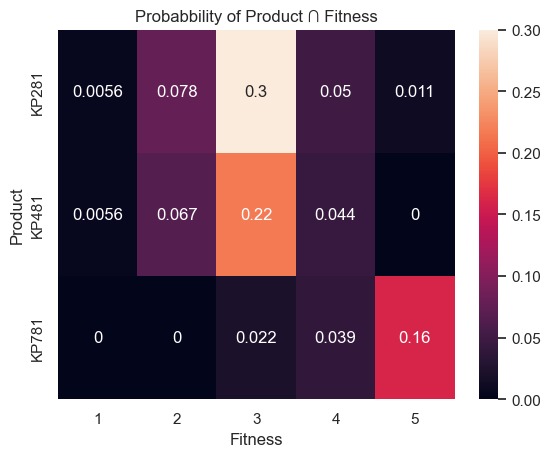

In [439]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['Fitness'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Fitness', fontsize=12)

##### `Descriptive` Plot

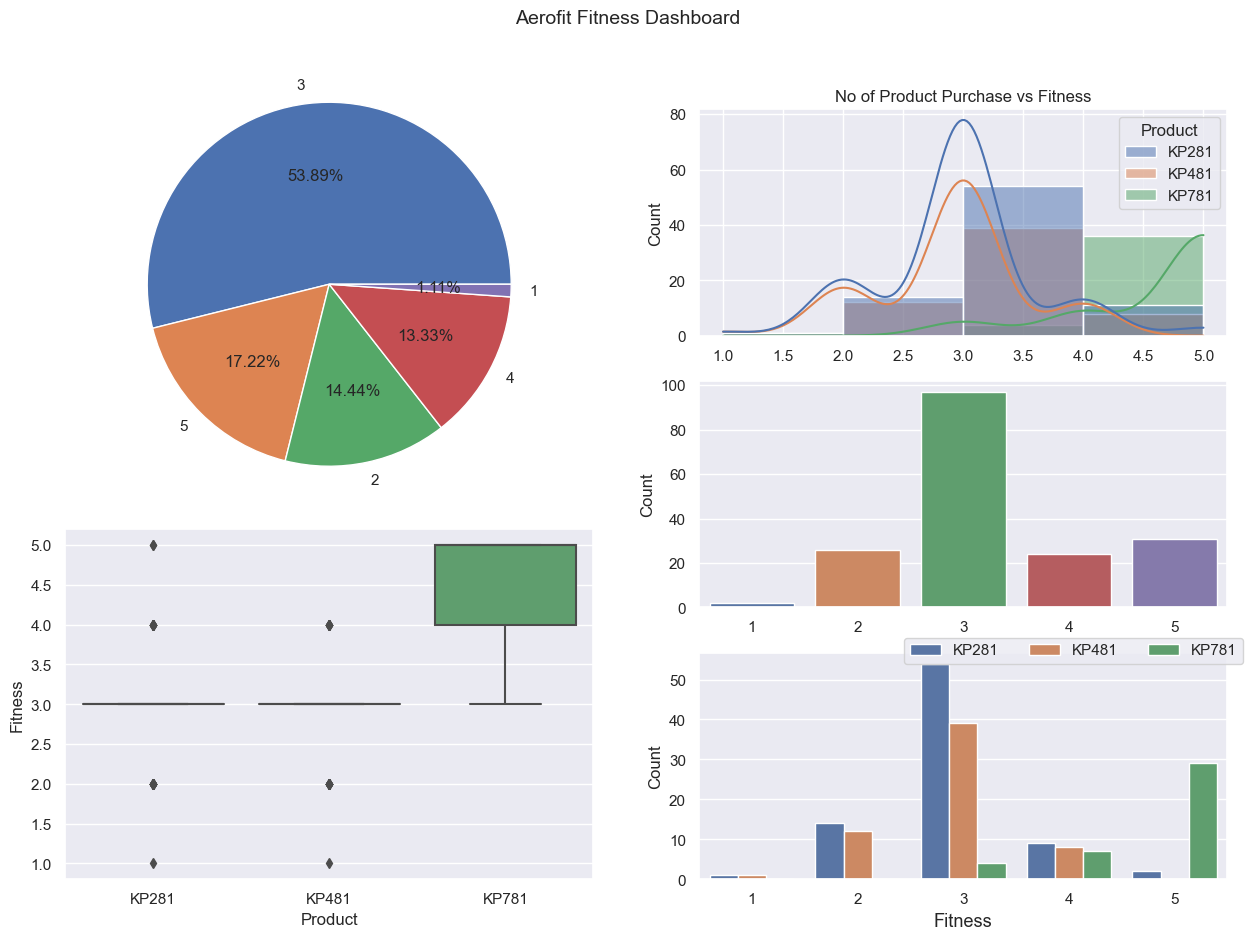

In [440]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Fitness Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['Fitness'].value_counts().values,labels = aerofit['Fitness'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Fitness", x='Product')

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Fitness', binwidth=1, kde=True, hue="Product")
plt.title('No of Product Purchase vs Fitness', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='Fitness')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='Fitness', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Fitness', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=-1, ncol=3)
plt.show()

##### `Probability` Plot

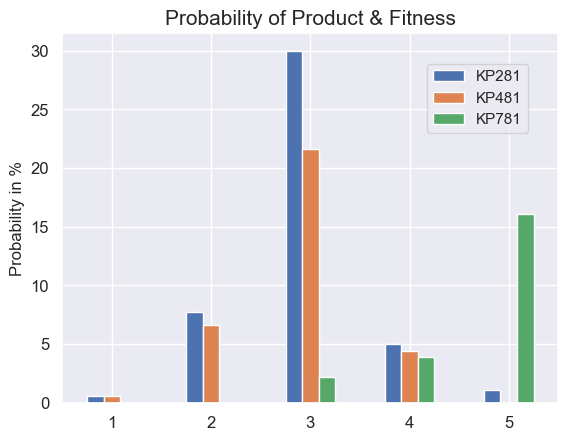

In [441]:
(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Fitness', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

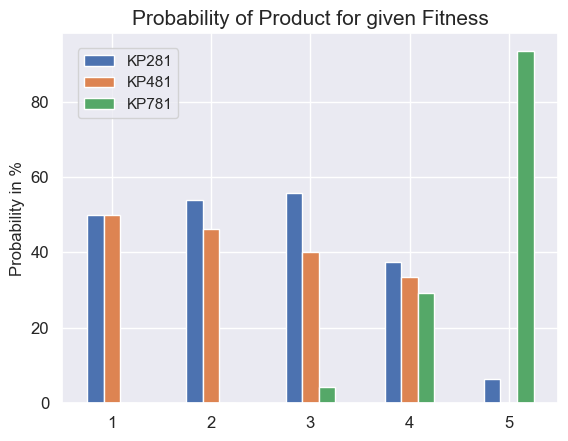

In [442]:
(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Fitness', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=1, ncol=1)
plt.show()

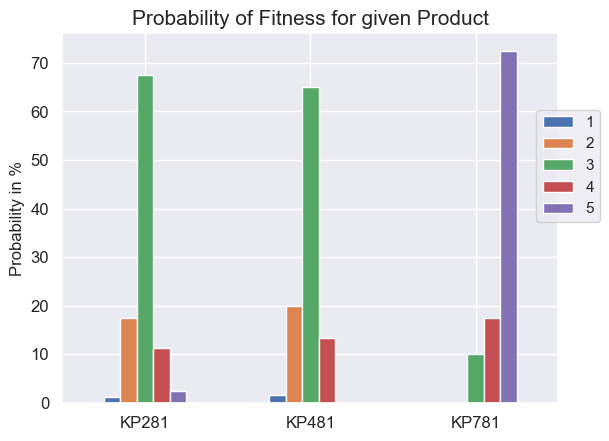

In [443]:
(pd.crosstab(aerofit['Product'], aerofit['Fitness'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Fitness for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

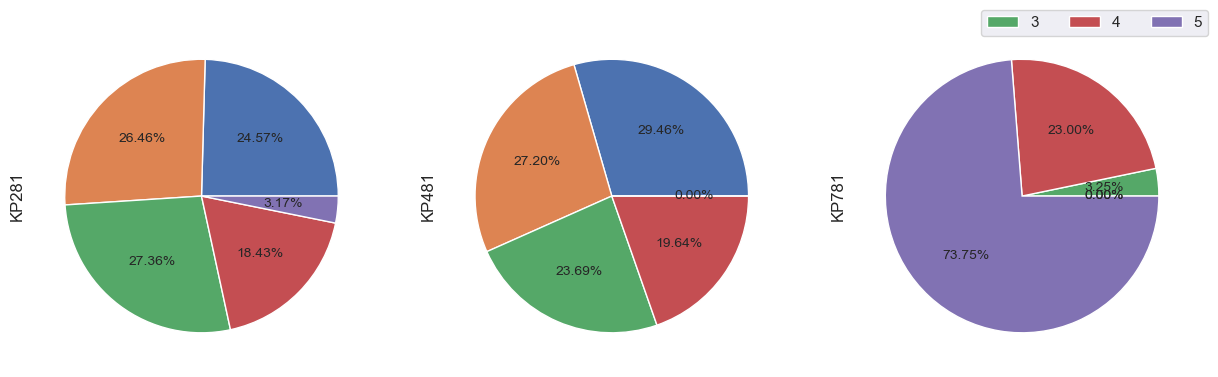

In [444]:
pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,5), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=5)
plt.show()

### **<span style="color: orange;">Usage</span>**

In [445]:
aerofit['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [446]:
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [447]:
aerofit['Usage'].value_counts(normalize=True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [448]:
aerofit['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [449]:
aerofit['Usage'].mean()

3.4555555555555557

In [450]:
aerofit['Usage'].median()

3.0

In [451]:
aerofit['Usage'].mode()[0]

3

In [452]:
aerofit.groupby('Product')["Usage"].describe()

count      mean       std  min  25%  50%   75%  max
Product                                                     
KP281     80.0  3.087500  0.782624  2.0  3.0  3.0  4.00  5.0
KP481     60.0  3.066667  0.799717  2.0  3.0  3.0  3.25  5.0
KP781     40.0  4.775000  0.946993  3.0  4.0  5.0  5.00  7.0

#### **<span style="color: #ff6600;">Check for Outliers</span>**

In [453]:
check_outlier(aerofit, 'Usage')['upper']

{'list': 154    6
 155    6
 162    6
 163    7
 164    6
 166    7
 167    6
 170    6
 175    6
 Name: Usage, dtype: int64,
 'length': 9}

In [454]:
check_outlier(aerofit, 'Usage')['lower']

{'list': Series([], Name: Usage, dtype: int64), 'length': 0}

#### **<span style="color: #818cf8;">Find Probability</span>**

##### Probability of a `Product` & `Usage` across all Combination ***"Product ∩ Usage"***

In [455]:
pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize=True, margins=True)*100

Product      KP281      KP481      KP781         All
Usage                                               
2        10.555556   7.777778   0.000000   18.333333
3        20.555556  17.222222   0.555556   38.333333
4        12.222222   6.666667  10.000000   28.888889
5         1.111111   1.666667   6.666667    9.444444
6         0.000000   0.000000   3.888889    3.888889
7         0.000000   0.000000   1.111111    1.111111
All      44.444444  33.333333  22.222222  100.000000

##### Probability of `Product's` for given `Usage`  ***"Product | Usage"***

In [456]:
pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize='index', margins=True)*100

Product      KP281      KP481       KP781
Usage                                    
2        57.575758  42.424242    0.000000
3        53.623188  44.927536    1.449275
4        42.307692  23.076923   34.615385
5        11.764706  17.647059   70.588235
6         0.000000   0.000000  100.000000
7         0.000000   0.000000  100.000000
All      44.444444  33.333333   22.222222

##### Probability of `Usage` for given `Product` ***"Fitness | Product"***

In [457]:
pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize='columns', margins=True)*100

Product  KP281      KP481  KP781        All
Usage                                      
2        23.75  23.333333    0.0  18.333333
3        46.25  51.666667    2.5  38.333333
4        27.50  20.000000   45.0  28.888889
5         2.50   5.000000   30.0   9.444444
6         0.00   0.000000   17.5   3.888889
7         0.00   0.000000    5.0   1.111111

#### **<span style="color: #b05abc;">Plot the Graph</span>**

##### `Heat Map`

Text(0.5, 1.0, 'Probabbility of Product ∩ Usage')

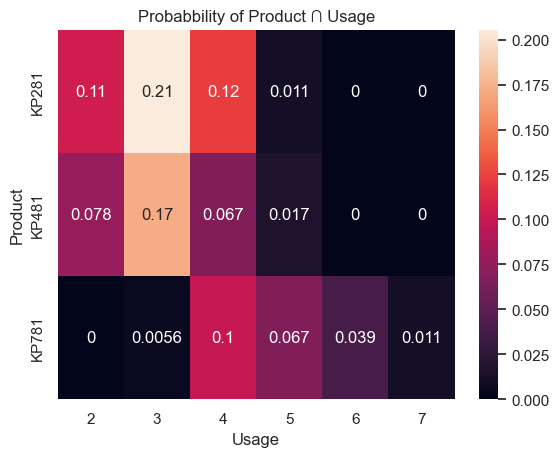

In [458]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['Usage'], normalize='all'),annot=True)
plt.title('Probabbility of Product ∩ Usage', fontsize=12)

##### `Descriptive` Plot

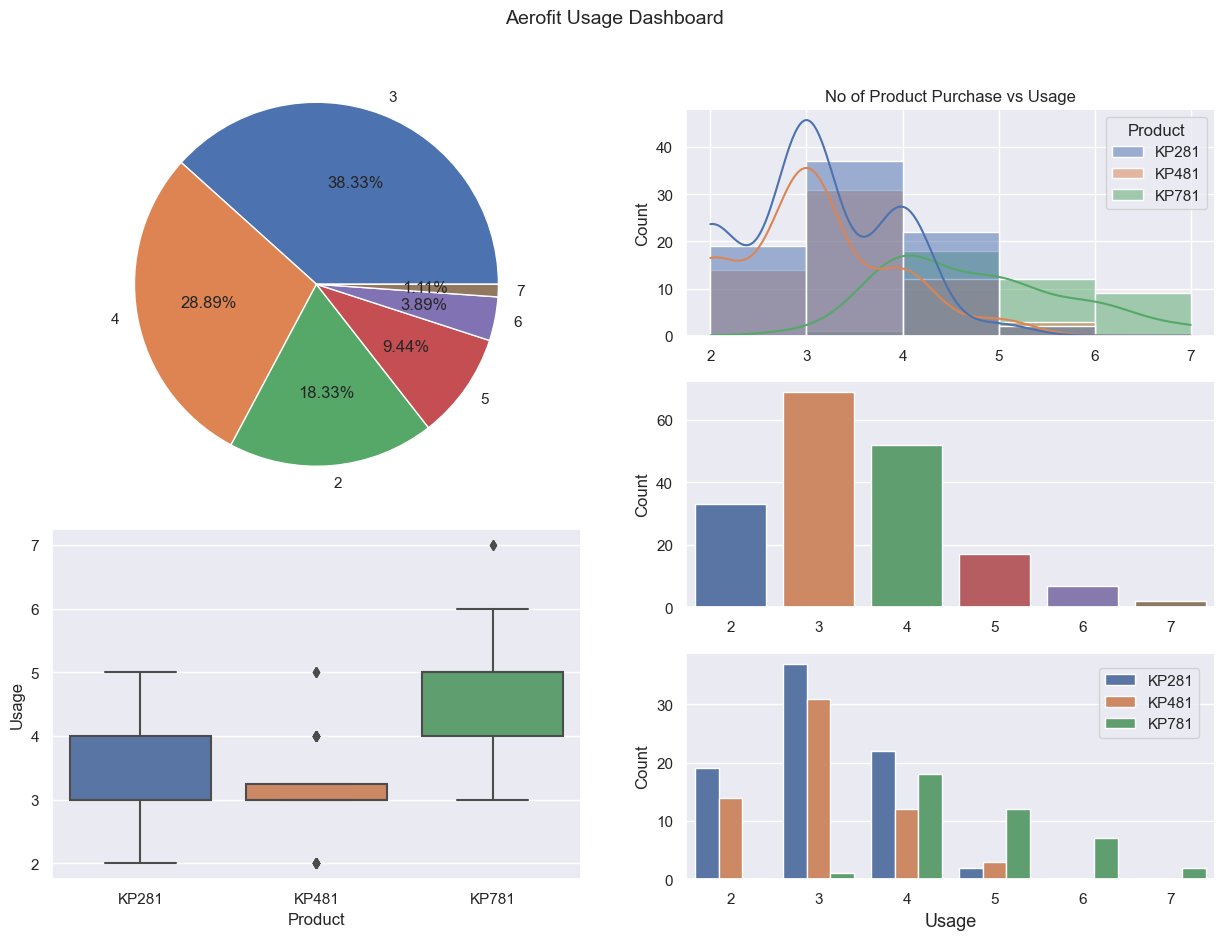

In [459]:
plt.figure(figsize=(15,10)).suptitle("Aerofit Usage Dashboard",fontsize=14)

plt.subplot(2, 2, 1)
plt.pie(aerofit['Usage'].value_counts().values,labels = aerofit['Usage'].value_counts().index,radius = 1.3,autopct = '%1.2f%%') # type: ignore

plt.subplot(2, 2, 3)
sns.boxplot(aerofit, y="Usage", x='Product')

plt.subplot(3, 2, 2)
sns.histplot(aerofit, x='Usage', binwidth=1, kde=True, hue="Product")
plt.title('No of Product Purchase vs Usage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 4)
sns.countplot(aerofit, x='Usage')
plt.ylabel('Count', fontsize=12)
plt.xlabel('', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)

plt.subplot(3, 2, 6)
sns.countplot(aerofit, x='Usage', hue='Product')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Usage', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(rotation= 0, fontsize=11)
plt.legend(borderaxespad=1, ncol=1)

plt.show()

##### `Probability` Plot

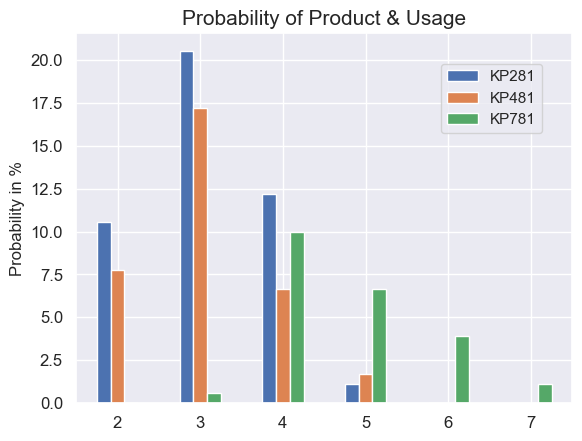

In [460]:
(pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize=True)*100).plot(kind='bar')
plt.title('Probability of Product & Usage', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=2, ncol=1)
plt.show()

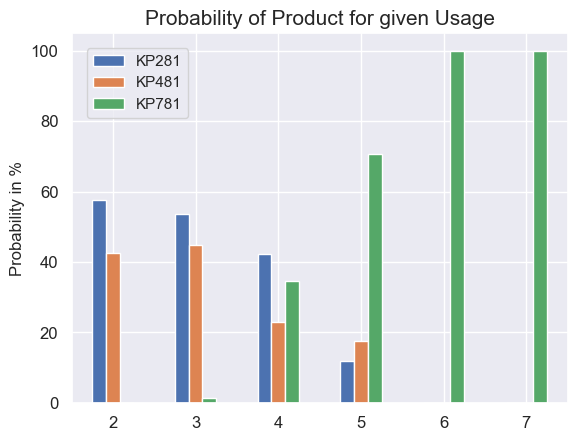

In [461]:
(pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Product for given Usage', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(borderaxespad=1, ncol=1)
plt.show()

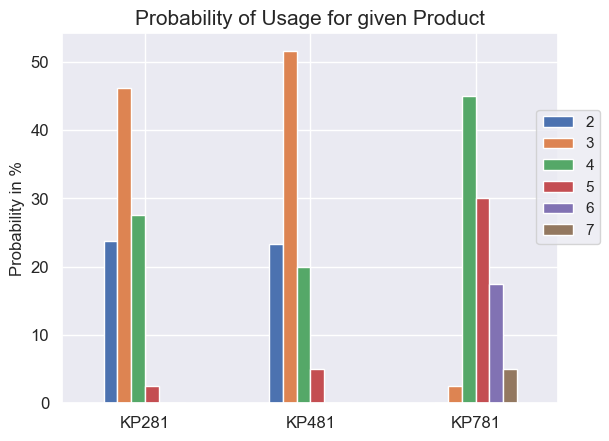

In [462]:
(pd.crosstab(aerofit['Product'], aerofit['Usage'], normalize="index")*100).plot(kind='bar')
plt.title('Probability of Usage for given Product', fontsize=15)
plt.ylabel('Probability in %', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation= 360, fontsize=12)
plt.yticks(rotation= 0, fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=5)

plt.show()

##### `Population` Plot

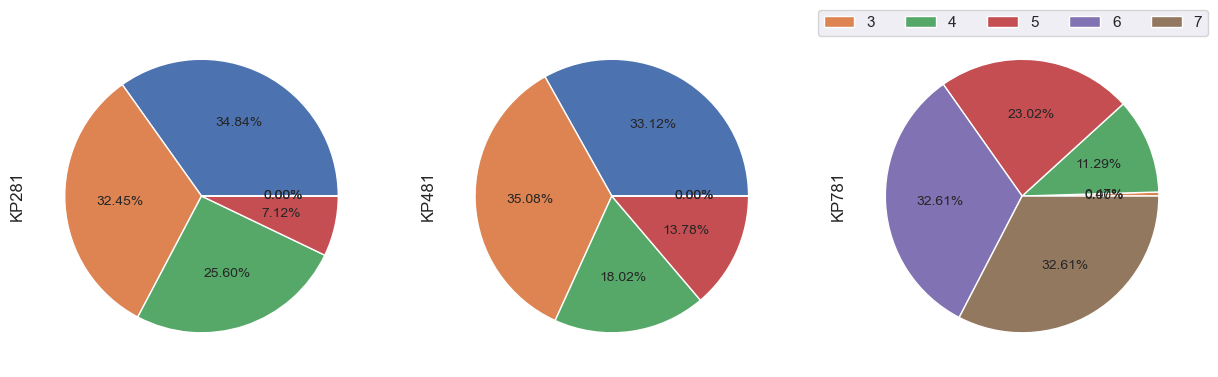

In [463]:
pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize="index").plot(kind='pie', subplots=True, figsize=(15,5), labeldistance=None, fontsize=10, legend=None, autopct = '%1.2f%%')
plt.legend(borderaxespad=-1, ncol=5)
plt.show()

## **<span style="color: #66ff66;">Customer Profile of Different Product</span>**

In [464]:
KP281 = aerofit.copy().loc[aerofit['Product']=='KP281']
KP481 = aerofit.copy().loc[aerofit['Product']=='KP481']
KP781 = aerofit.copy().loc[aerofit['Product']=='KP781']

### **<span style="color: orange;">Cummulative Profile</span>**

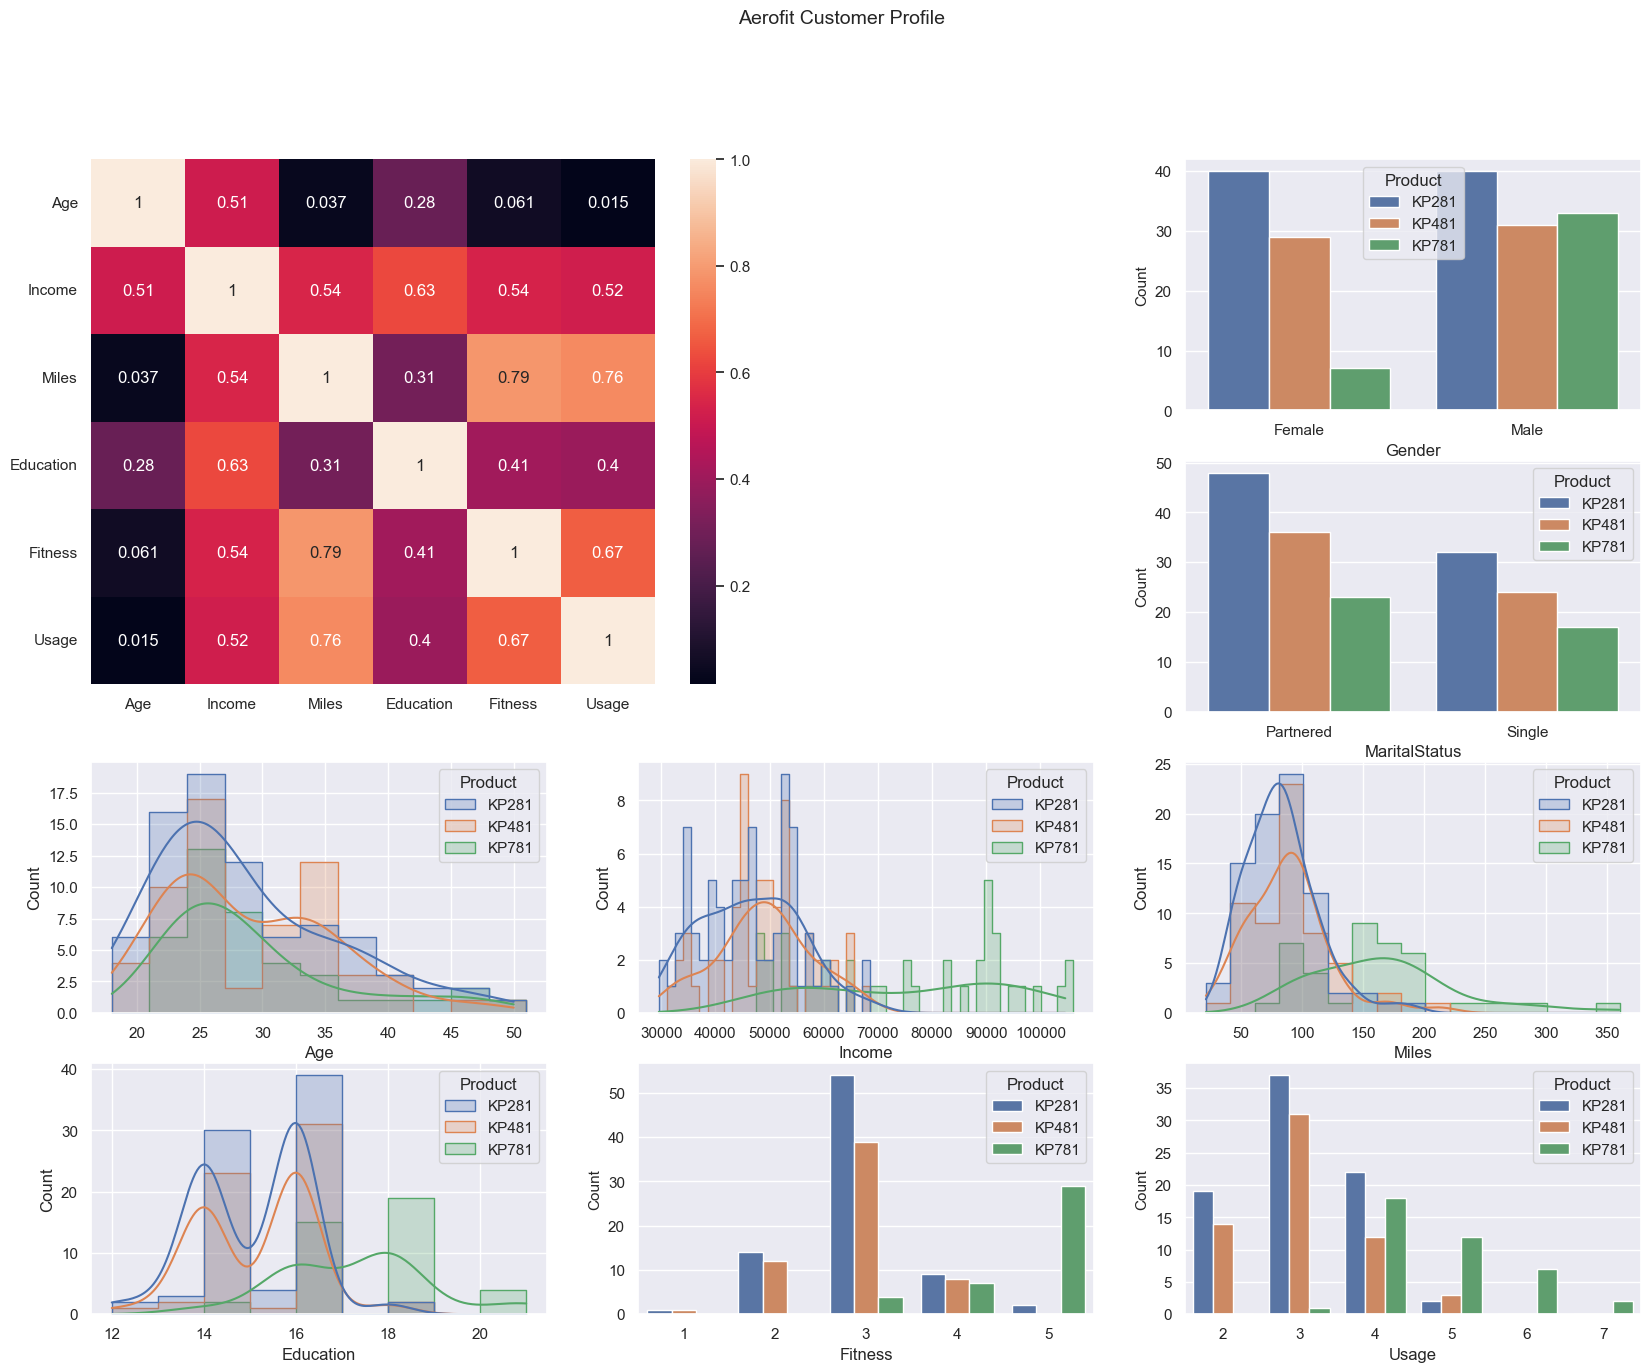

In [465]:
plt.figure(figsize=(20,15)).suptitle("Aerofit Customer Profile",fontsize=14)

plt.subplot(2, 2, 1)
sns.heatmap(aerofit[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].corr(), annot=True)
plt.yticks(rotation= 0, fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(4, 3, 3)
sns.countplot(aerofit, x='Gender', hue="Product")
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 6)
sns.countplot(aerofit, x='MaritalStatus', hue="Product")
plt.ylabel("Count", fontsize=11)

plt.subplot(4, 3, 7)
sns.histplot(aerofit, x="Age", binwidth=3, kde=True, hue="Product", element="step")
plt.subplot(4, 3, 8)
sns.histplot(aerofit, x="Income", binwidth=1500, kde=True, hue="Product", element="step")
plt.subplot(4, 3, 9)
sns.histplot(aerofit, x="Miles", binwidth=20, kde=True, hue="Product", element="step")

plt.subplot(4, 3, 10)
sns.histplot(aerofit, x="Education", binwidth=1, kde=True, hue="Product", element="step")
plt.subplot(4, 3, 11)
sns.countplot(aerofit, x='Fitness', hue="Product")
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 12)
sns.countplot(aerofit, x='Usage', hue="Product")
plt.ylabel("Count", fontsize=11)

plt.show()

### **<span style="color: orange;">Profile of *KP281*</span>**

In [466]:
KP281[['Gender', 'MaritalStatus', 'Fitness', 'Usage', 'Age']].value_counts(normalize=True)[:5]*100

Gender  MaritalStatus  Fitness  Usage  Age
Female  Partnered      2        2      25     2.5
Male    Partnered      3        3      38     2.5
Female  Single         3        4      24     2.5
        Partnered      3        2      28     2.5
Male    Single         3        4      23     2.5
dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [467]:
KP281[['Gender', 'MaritalStatus', 'age_group', 'income_group', 'miles_group', 'education_group', 'fitness_group', 'usage_group' ]].describe()

Gender MaritalStatus age_group income_group miles_group  \
count       80            80        80           80          80   
unique       2             2         7            5           6   
top     Female     Partnered     20-25      45K-55K      80-110   
freq        40            48        28           35          27   

        education_group  fitness_group  usage_group  
count                80             80           80  
unique                6              5            4  
top                  16              3            3  
freq                 39             54           37

In [468]:
KP281[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].describe()

Age       Income       Miles  Education   Fitness      Usage
count  80.000000     80.00000   80.000000  80.000000  80.00000  80.000000
mean   28.550000  46418.02500   82.787500  15.037500   2.96250   3.087500
std     7.221452   9075.78319   28.874102   1.216383   0.66454   0.782624
min    18.000000  29562.00000   38.000000  12.000000   1.00000   2.000000
25%    23.000000  38658.00000   66.000000  14.000000   3.00000   3.000000
50%    26.000000  46617.00000   85.000000  16.000000   3.00000   3.000000
75%    33.000000  53439.00000   94.000000  16.000000   3.00000   4.000000
max    50.000000  68220.00000  188.000000  18.000000   5.00000   5.000000

In [469]:
KP281[['Age', 'Income', 'Miles', 'Education', 'Usage', 'Fitness']].median()

Age             26.0
Income       46617.0
Miles           85.0
Education       16.0
Usage            3.0
Fitness          3.0
dtype: float64

#### **<span style="color: #818cf8;">Find Probability</span>**

In [470]:
pd.crosstab([KP281.income_group], [KP281.age_group], normalize=True, margins=True)*100

age_group     15-20  20-25  25-30  30-35  35-40  40-45  45-50     All
income_group                                                         
25K-35K        6.25   3.75   0.00   0.00   0.00   0.00   0.00   10.00
35K-45K        1.25  25.00   3.75   0.00   2.50   0.00   0.00   32.50
45K-55K        0.00   6.25  21.25  10.00   3.75   2.50   0.00   43.75
55K-65K        0.00   0.00   0.00   2.50   3.75   1.25   3.75   11.25
65K-75K        0.00   0.00   1.25   1.25   0.00   0.00   0.00    2.50
All            7.50  35.00  26.25  13.75  10.00   3.75   3.75  100.00

In [471]:
pd.crosstab([KP281.Fitness, KP281.Gender, KP281.MaritalStatus], [KP281.miles_group], normalize=True, margins=True)*100

miles_group                   20-50  50-80  80-110  110-140  140-170  170-200  \
Fitness Gender MaritalStatus                                                    
1       Male   Partnered       1.25   0.00    0.00     0.00     0.00     0.00   
2       Female Partnered       6.25   2.50    0.00     0.00     0.00     0.00   
               Single          2.50   1.25    0.00     0.00     0.00     0.00   
        Male   Partnered       5.00   0.00    0.00     0.00     0.00     0.00   
3       Female Partnered       0.00  12.50    8.75     1.25     0.00     0.00   
               Single          0.00   5.00    3.75     1.25     0.00     0.00   
        Male   Partnered       0.00   7.50    8.75     0.00     0.00     0.00   
               Single          0.00   2.50   12.50     3.75     0.00     0.00   
4       Female Partnered       0.00   0.00    0.00     1.25     0.00     0.00   
               Single          0.00   1.25    0.00     1.25     0.00     0.00   
        Male   Partnered       0.00   0.00    0.00     2.50     1.25     0.00   
               Single          0.00   0.00    0.00     2.50     1.25     0.00   
5       Female Partnered       0.00   0.00    0.00     0.00     0.00     1.25   
        Male   Single          0.00   0.00    0.00     0.00     1.25     0.00   
All                           15.00  32.50   33.75    13.75     3.75     1.25   

miles_group                      All  
Fitness Gender MaritalStatus          
1       Male   Partnered        1.25  
2       Female Partnered        8.75  
               Single           3.75  
        Male   Partnered        5.00  
3       Female Partnered       22.50  
               Single          10.00  
        Male   Partnered       16.25  
               Single          18.75  
4       Female Partnered        1.25  
               Single           2.50  
        Male   Partnered        3.75  
               Single           3.75  
5       Female Partnered        1.25  
        Male   Single           1.25  
All                           100.00

In [472]:
pd.crosstab([KP281.Fitness, KP281.Gender, KP281.MaritalStatus], [KP281.age_group], normalize=True, margins=True)*100

age_group                     15-20  20-25  25-30  30-35  35-40  40-45  45-50  \
Fitness Gender MaritalStatus                                                    
1       Male   Partnered       0.00   1.25   0.00   0.00   0.00   0.00   0.00   
2       Female Partnered       0.00   5.00   2.50   0.00   0.00   0.00   1.25   
               Single          0.00   0.00   0.00   3.75   0.00   0.00   0.00   
        Male   Partnered       1.25   1.25   1.25   1.25   0.00   0.00   0.00   
3       Female Partnered       2.50   5.00   8.75   2.50   2.50   0.00   1.25   
               Single          0.00   7.50   1.25   1.25   0.00   0.00   0.00   
        Male   Partnered       0.00   3.75   2.50   2.50   3.75   2.50   1.25   
               Single          2.50   7.50   6.25   0.00   2.50   0.00   0.00   
4       Female Partnered       0.00   0.00   1.25   0.00   0.00   0.00   0.00   
               Single          0.00   0.00   0.00   1.25   0.00   1.25   0.00   
        Male   Partnered       0.00   0.00   2.50   0.00   1.25   0.00   0.00   
               Single          1.25   2.50   0.00   0.00   0.00   0.00   0.00   
5       Female Partnered       0.00   1.25   0.00   0.00   0.00   0.00   0.00   
        Male   Single          0.00   0.00   0.00   1.25   0.00   0.00   0.00   
All                            7.50  35.00  26.25  13.75  10.00   3.75   3.75   

age_group                        All  
Fitness Gender MaritalStatus          
1       Male   Partnered        1.25  
2       Female Partnered        8.75  
               Single           3.75  
        Male   Partnered        5.00  
3       Female Partnered       22.50  
               Single          10.00  
        Male   Partnered       16.25  
               Single          18.75  
4       Female Partnered        1.25  
               Single           2.50  
        Male   Partnered        3.75  
               Single           3.75  
5       Female Partnered        1.25  
        Male   Single           1.25  
All                           100.00

In [473]:
pd.crosstab([KP281.Fitness, KP281.Gender, KP281.MaritalStatus], [KP281.income_group], normalize=True, margins=True)*100

income_group                  25K-35K  35K-45K  45K-55K  55K-65K  65K-75K  \
Fitness Gender MaritalStatus                                                
1       Male   Partnered         0.00     1.25     0.00     0.00     0.00   
2       Female Partnered         1.25     2.50     3.75     1.25     0.00   
               Single            0.00     0.00     2.50     1.25     0.00   
        Male   Partnered         0.00     2.50     2.50     0.00     0.00   
3       Female Partnered         2.50     5.00    12.50     2.50     0.00   
               Single            1.25     6.25     1.25     0.00     1.25   
        Male   Partnered         0.00     2.50     8.75     3.75     1.25   
               Single            3.75     6.25     8.75     0.00     0.00   
4       Female Partnered         0.00     1.25     0.00     0.00     0.00   
               Single            0.00     0.00     1.25     1.25     0.00   
        Male   Partnered         0.00     1.25     1.25     1.25     0.00   
               Single            1.25     2.50     0.00     0.00     0.00   
5       Female Partnered         0.00     1.25     0.00     0.00     0.00   
        Male   Single            0.00     0.00     1.25     0.00     0.00   
All                             10.00    32.50    43.75    11.25     2.50   

income_group                     All  
Fitness Gender MaritalStatus          
1       Male   Partnered        1.25  
2       Female Partnered        8.75  
               Single           3.75  
        Male   Partnered        5.00  
3       Female Partnered       22.50  
               Single          10.00  
        Male   Partnered       16.25  
               Single          18.75  
4       Female Partnered        1.25  
               Single           2.50  
        Male   Partnered        3.75  
               Single           3.75  
5       Female Partnered        1.25  
        Male   Single           1.25  
All                           100.00

#### **<span style="color: #ff6600;">Check for Outliers</span>**

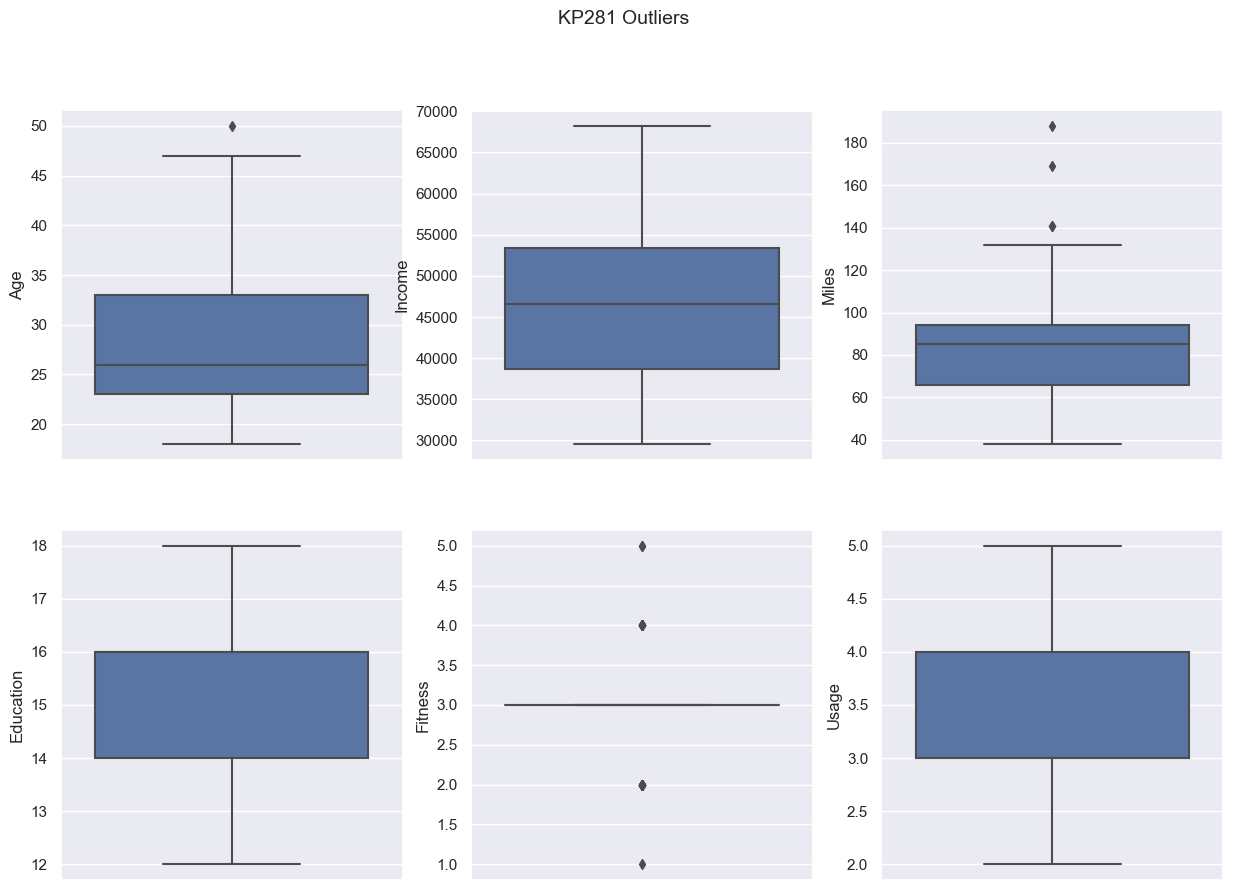

In [474]:
plt.figure(figsize=(15,10)).suptitle("KP281 Outliers",fontsize=14)

plt.subplot(2, 3, 1)
sns.boxplot(KP281, y="Age")
plt.subplot(2, 3, 2)
sns.boxplot(KP281, y="Income")

plt.subplot(2, 3, 3)
sns.boxplot(KP281, y="Miles")
plt.subplot(2, 3, 4)
sns.boxplot(KP281, y="Education")

plt.subplot(2, 3, 5)
sns.boxplot(KP281, y='Fitness')
plt.subplot(2, 3, 6)
sns.boxplot(KP281, y='Usage')

plt.show()

#### **<span style="color: #b05abc;">Plot the Graph</span>**

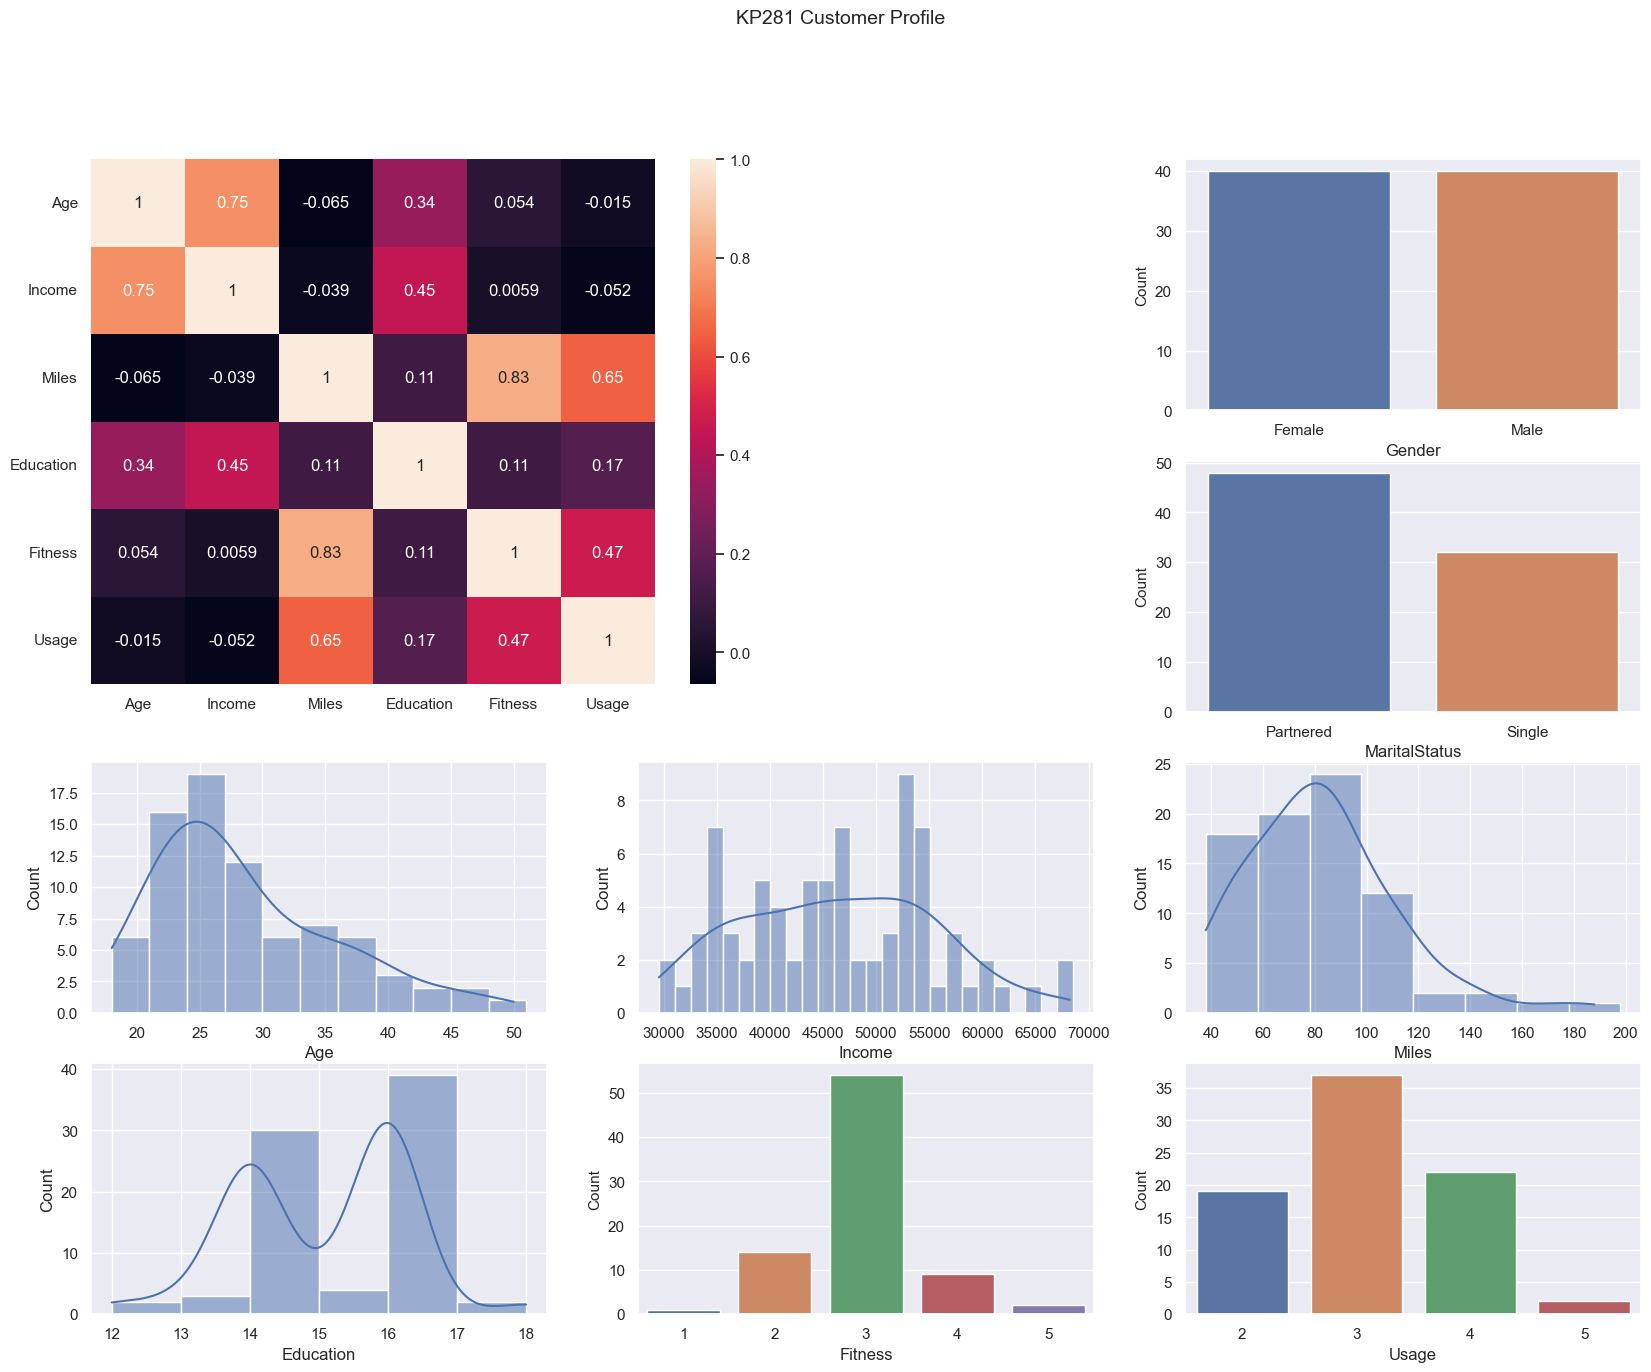

In [475]:
plt.figure(figsize=(20,15)).suptitle("KP281 Customer Profile",fontsize=14)

plt.subplot(2, 2, 1)
sns.heatmap(KP281[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].corr(), annot=True)
plt.yticks(rotation= 0, fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(4, 3, 3)
sns.countplot(KP281, x='Gender')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 6)
sns.countplot(KP281, x='MaritalStatus')
plt.ylabel("Count", fontsize=11)

plt.subplot(4, 3, 7)
sns.histplot(KP281, x="Age", binwidth=3, kde=True)
plt.subplot(4, 3, 8)
sns.histplot(KP281, x="Income", binwidth=1500, kde=True)
plt.subplot(4, 3, 9)
sns.histplot(KP281, x="Miles", binwidth=20, kde=True)

plt.subplot(4, 3, 10)
sns.histplot(KP281, x="Education", binwidth=1, kde=True)
plt.subplot(4, 3, 11)
sns.countplot(KP281, x='Fitness')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 12)
sns.countplot(KP281, x='Usage')
plt.ylabel("Count", fontsize=11)

plt.show()

####
>Insight
* There are highest number of customer have covered `70 miles`.


### **<span style="color: orange;">Profile of *KP481*</span>**

In [476]:
KP481[['Gender', 'MaritalStatus', 'Fitness', 'Usage', 'Age']].value_counts(normalize=True)[:5]*100

Gender  MaritalStatus  Fitness  Usage  Age
Male    Partnered      3        3      23     5.000000
                       2        2      21     3.333333
Female  Partnered      2        3      23     1.666667
Male    Partnered      2        2      45     1.666667
                                3      35     1.666667
dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [477]:
KP481[['Gender', 'MaritalStatus', 'age_group', 'income_group', 'miles_group', 'education_group', 'fitness_group', 'usage_group' ]].describe()

Gender MaritalStatus age_group income_group miles_group  \
count      60            60        60           60          60   
unique      2             2         7            5           6   
top      Male     Partnered     20-25      45K-55K      80-110   
freq       31            36        24           33          31   

        education_group  fitness_group  usage_group  
count                60             60           60  
unique                6              4            4  
top                  16              3            3  
freq                 31             39           31

In [478]:
KP481[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].describe()

Age        Income       Miles  Education   Fitness      Usage
count  60.000000     60.000000   60.000000  60.000000  60.00000  60.000000
mean   28.900000  48973.650000   87.933333  15.116667   2.90000   3.066667
std     6.645248   8653.989388   33.263135   1.222552   0.62977   0.799717
min    19.000000  31836.000000   21.000000  12.000000   1.00000   2.000000
25%    24.000000  44911.500000   64.000000  14.000000   3.00000   3.000000
50%    26.000000  49459.500000   85.000000  16.000000   3.00000   3.000000
75%    33.250000  53439.000000  106.000000  16.000000   3.00000   3.250000
max    48.000000  67083.000000  212.000000  18.000000   4.00000   5.000000

In [479]:
KP481[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].median()

Age             26.0
Income       49459.5
Miles           85.0
Education       16.0
Fitness          3.0
Usage            3.0
dtype: float64

#### **<span style="color: #818cf8;">Find Probability</span>**

In [480]:
pd.crosstab([KP481.income_group], [KP481.age_group], normalize=True, margins=True)*100

age_group        15-20      20-25      25-30      30-35      35-40     40-45  \
income_group                                                                   
25K-35K       5.000000   5.000000   0.000000   0.000000   0.000000  0.000000   
35K-45K       1.666667  13.333333   0.000000   0.000000   0.000000  0.000000   
45K-55K       0.000000  21.666667  10.000000  20.000000   1.666667  1.666667   
55K-65K       0.000000   0.000000   1.666667   5.000000   8.333333  0.000000   
65K-75K       0.000000   0.000000   0.000000   3.333333   0.000000  0.000000   
All           6.666667  40.000000  11.666667  28.333333  10.000000  1.666667   

age_group        45-50         All  
income_group                        
25K-35K       0.000000   10.000000  
35K-45K       0.000000   15.000000  
45K-55K       0.000000   55.000000  
55K-65K       1.666667   16.666667  
65K-75K       0.000000    3.333333  
All           1.666667  100.000000

In [481]:
pd.crosstab([KP481.Fitness, KP481.Gender, KP481.MaritalStatus], [KP481.miles_group], normalize=True, margins=True)*100

miles_group                      20-50      50-80     80-110   110-140  \
Fitness Gender MaritalStatus                                             
1       Female Single         1.666667   0.000000   0.000000  0.000000   
2       Female Partnered      0.000000   3.333333   0.000000  0.000000   
               Single         1.666667   3.333333   1.666667  0.000000   
        Male   Partnered      5.000000   3.333333   0.000000  0.000000   
               Single         0.000000   1.666667   0.000000  0.000000   
3       Female Partnered      0.000000   1.666667  18.333333  0.000000   
               Single         0.000000   3.333333   6.666667  0.000000   
        Male   Partnered      0.000000   5.000000  13.333333  1.666667   
               Single         0.000000   3.333333   6.666667  3.333333   
4       Female Partnered      0.000000   0.000000   0.000000  0.000000   
               Single         0.000000   1.666667   0.000000  3.333333   
        Male   Partnered      0.000000   0.000000   3.333333  0.000000   
               Single         0.000000   0.000000   1.666667  0.000000   
All                           8.333333  26.666667  51.666667  8.333333   

miles_group                    140-170   200-230         All  
Fitness Gender MaritalStatus                                  
1       Female Single         0.000000  0.000000    1.666667  
2       Female Partnered      0.000000  0.000000    3.333333  
               Single         0.000000  0.000000    6.666667  
        Male   Partnered      0.000000  0.000000    8.333333  
               Single         0.000000  0.000000    1.666667  
3       Female Partnered      0.000000  0.000000   20.000000  
               Single         0.000000  0.000000   10.000000  
        Male   Partnered      1.666667  0.000000   21.666667  
               Single         0.000000  0.000000   13.333333  
4       Female Partnered      0.000000  1.666667    1.666667  
               Single         0.000000  0.000000    5.000000  
        Male   Partnered      1.666667  0.000000    5.000000  
               Single         0.000000  0.000000    1.666667  
All                           3.333333  1.666667  100.000000

In [482]:
pd.crosstab([KP481.Fitness, KP481.Gender, KP481.MaritalStatus], [KP481.age_group], normalize=True, margins=True)*100

age_group                        15-20      20-25      25-30      30-35  \
Fitness Gender MaritalStatus                                              
1       Female Single         0.000000   0.000000   0.000000   1.666667   
2       Female Partnered      0.000000   1.666667   0.000000   1.666667   
               Single         0.000000   5.000000   0.000000   1.666667   
        Male   Partnered      0.000000   5.000000   0.000000   1.666667   
               Single         0.000000   0.000000   1.666667   0.000000   
3       Female Partnered      1.666667   3.333333   3.333333   6.666667   
               Single         0.000000   5.000000   3.333333   0.000000   
        Male   Partnered      0.000000  10.000000   0.000000   6.666667   
               Single         5.000000   3.333333   1.666667   3.333333   
4       Female Partnered      0.000000   1.666667   0.000000   0.000000   
               Single         0.000000   1.666667   1.666667   1.666667   
        Male   Partnered      0.000000   1.666667   0.000000   3.333333   
               Single         0.000000   1.666667   0.000000   0.000000   
All                           6.666667  40.000000  11.666667  28.333333   

age_group                         35-40     40-45     45-50         All  
Fitness Gender MaritalStatus                                             
1       Female Single          0.000000  0.000000  0.000000    1.666667  
2       Female Partnered       0.000000  0.000000  0.000000    3.333333  
               Single          0.000000  0.000000  0.000000    6.666667  
        Male   Partnered       0.000000  1.666667  0.000000    8.333333  
               Single          0.000000  0.000000  0.000000    1.666667  
3       Female Partnered       5.000000  0.000000  0.000000   20.000000  
               Single          1.666667  0.000000  0.000000   10.000000  
        Male   Partnered       3.333333  0.000000  1.666667   21.666667  
               Single          0.000000  0.000000  0.000000   13.333333  
4       Female Partnered       0.000000  0.000000  0.000000    1.666667  
               Single          0.000000  0.000000  0.000000    5.000000  
        Male   Partnered       0.000000  0.000000  0.000000    5.000000  
               Single          0.000000  0.000000  0.000000    1.666667  
All                           10.000000  1.666667  1.666667  100.000000

In [483]:
pd.crosstab([KP481.Fitness, KP481.Gender, KP481.MaritalStatus], [KP481.income_group], normalize=True, margins=True)*100

income_group                    25K-35K    35K-45K    45K-55K    55K-65K  \
Fitness Gender MaritalStatus                                               
1       Female Single          0.000000   0.000000   0.000000   0.000000   
2       Female Partnered       0.000000   1.666667   1.666667   0.000000   
               Single          0.000000   3.333333   3.333333   0.000000   
        Male   Partnered       3.333333   0.000000   5.000000   0.000000   
               Single          0.000000   0.000000   1.666667   0.000000   
3       Female Partnered       1.666667   0.000000  13.333333   5.000000   
               Single          0.000000   1.666667   5.000000   3.333333   
        Male   Partnered       0.000000   3.333333  13.333333   5.000000   
               Single          3.333333   1.666667   5.000000   1.666667   
4       Female Partnered       1.666667   0.000000   0.000000   0.000000   
               Single          0.000000   1.666667   3.333333   0.000000   
        Male   Partnered       0.000000   1.666667   1.666667   1.666667   
               Single          0.000000   0.000000   1.666667   0.000000   
All                           10.000000  15.000000  55.000000  16.666667   

income_group                   65K-75K         All  
Fitness Gender MaritalStatus                        
1       Female Single         1.666667    1.666667  
2       Female Partnered      0.000000    3.333333  
               Single         0.000000    6.666667  
        Male   Partnered      0.000000    8.333333  
               Single         0.000000    1.666667  
3       Female Partnered      0.000000   20.000000  
               Single         0.000000   10.000000  
        Male   Partnered      0.000000   21.666667  
               Single         1.666667   13.333333  
4       Female Partnered      0.000000    1.666667  
               Single         0.000000    5.000000  
        Male   Partnered      0.000000    5.000000  
               Single         0.000000    1.666667  
All                           3.333333  100.000000

#### **<span style="color: #ff6600;">Check for Outliers</span>**

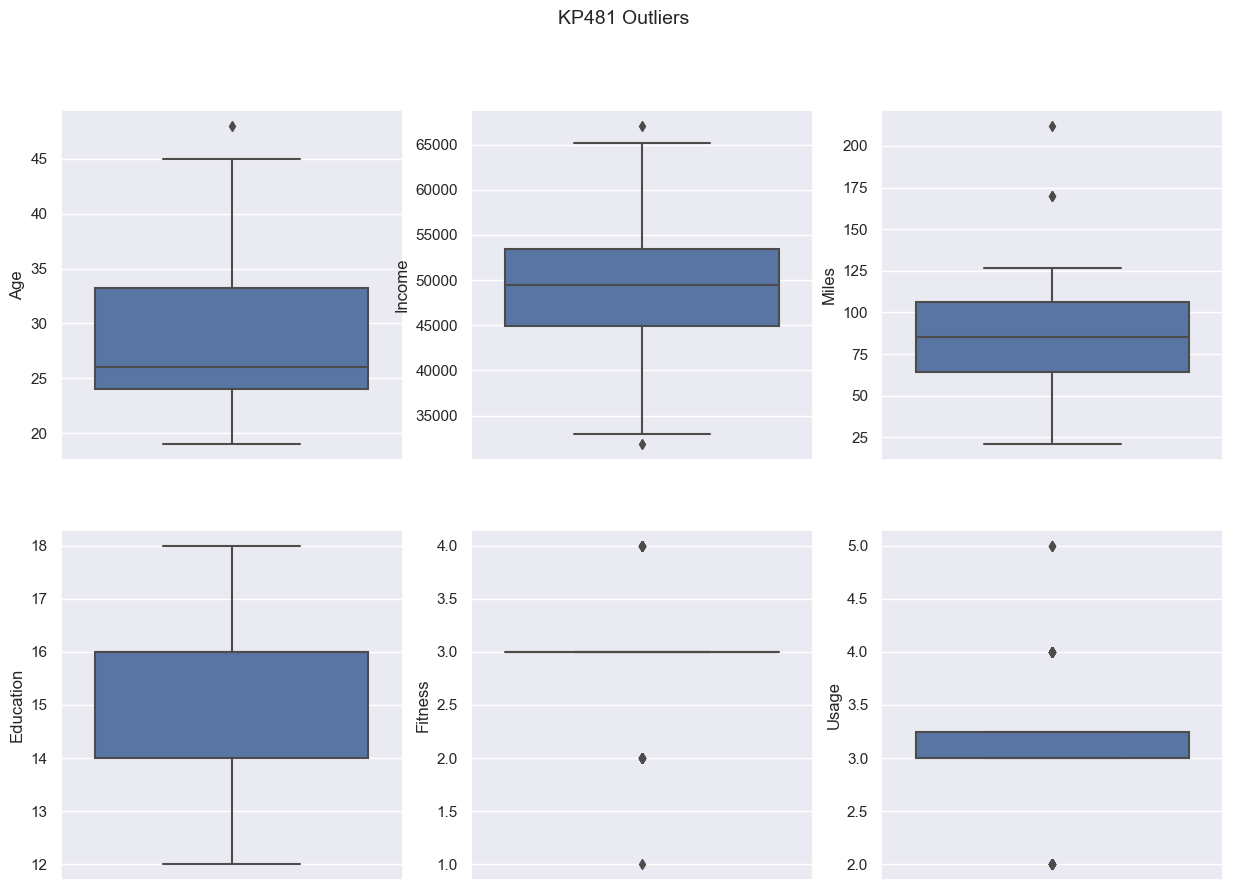

In [484]:
plt.figure(figsize=(15,10)).suptitle("KP481 Outliers",fontsize=14)

plt.subplot(2, 3, 1)
sns.boxplot(KP481, y="Age")
plt.subplot(2, 3, 2)
sns.boxplot(KP481, y="Income")

plt.subplot(2, 3, 3)
sns.boxplot(KP481, y="Miles")
plt.subplot(2, 3, 4)
sns.boxplot(KP481, y="Education")

plt.subplot(2, 3, 5)
sns.boxplot(KP481, y='Fitness')
plt.subplot(2, 3, 6)
sns.boxplot(KP481, y='Usage')

plt.show()

#### **<span style="color: #b05abc;">Plot the Graph</span>**

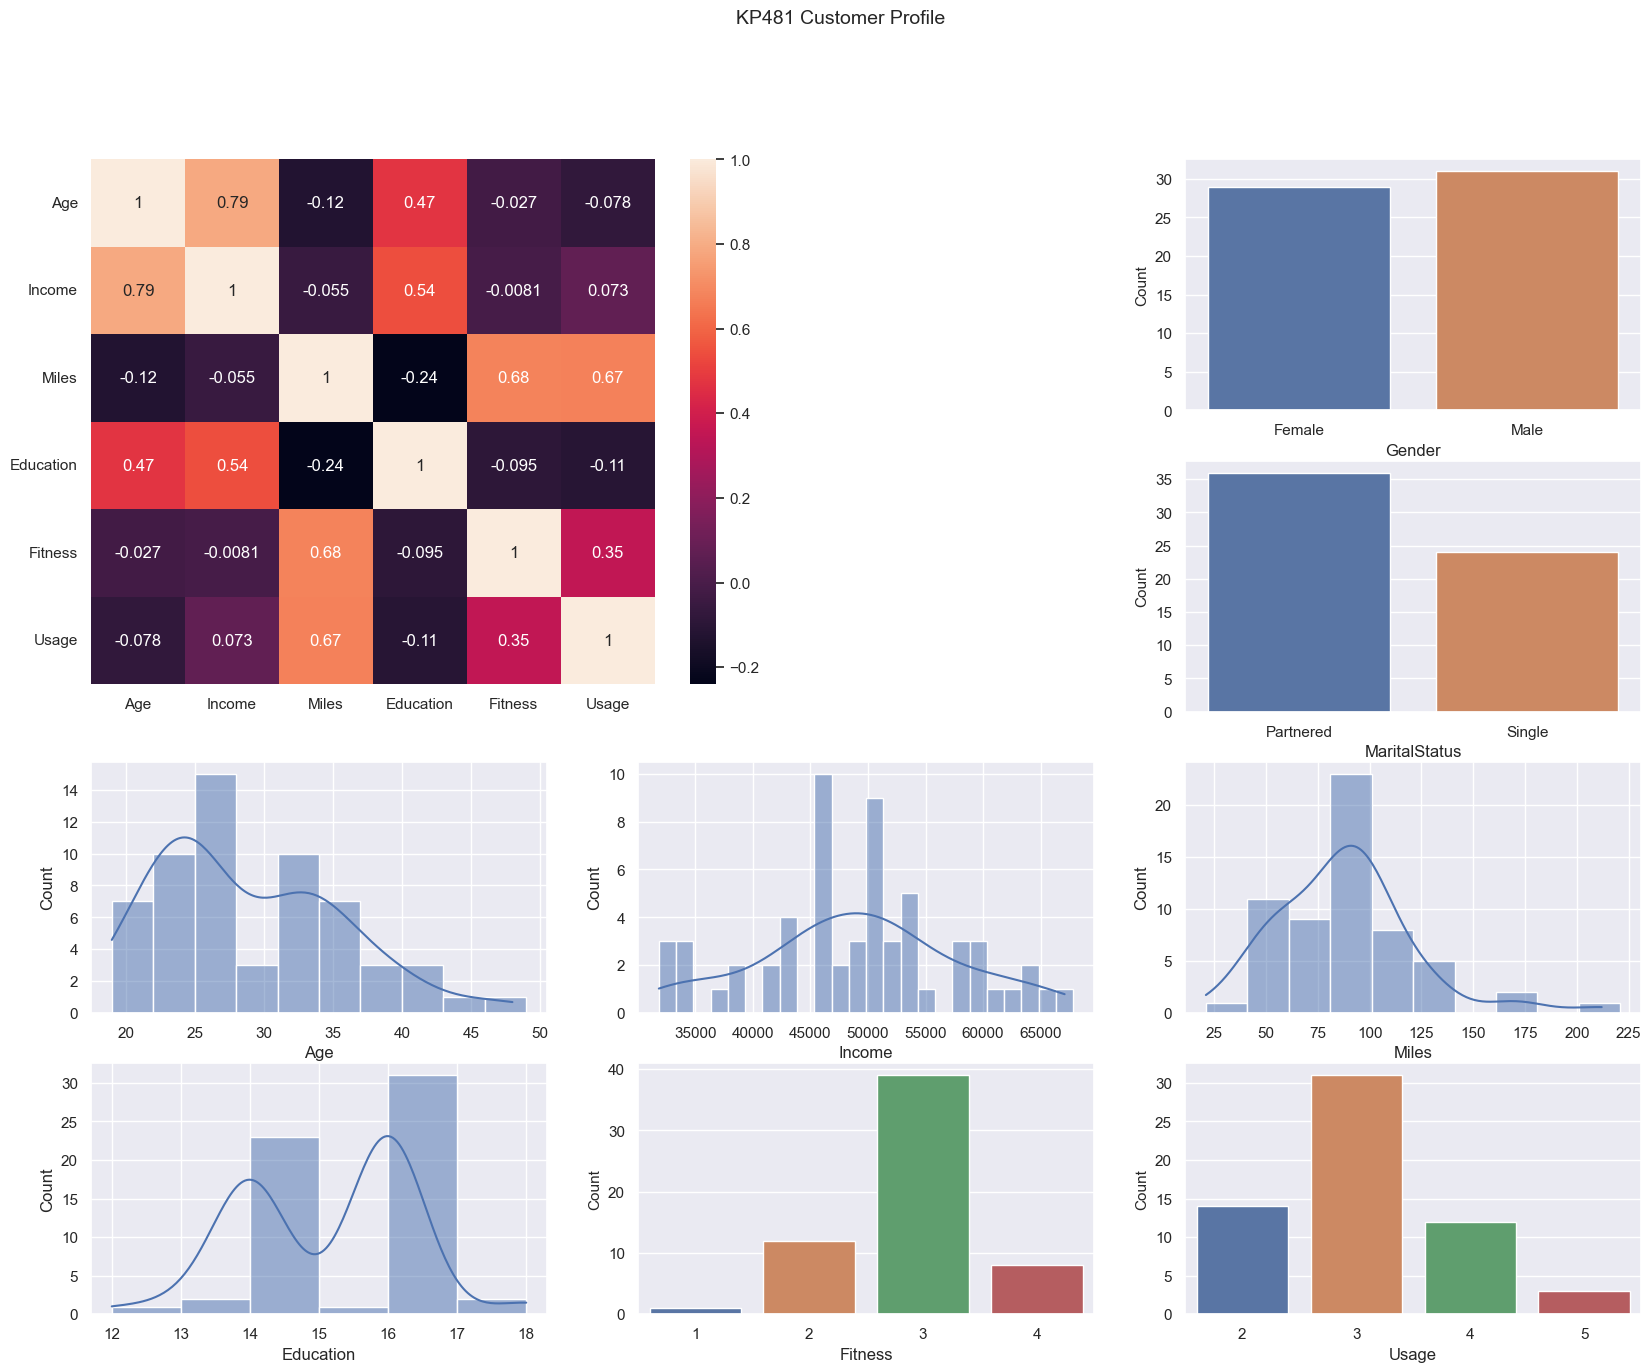

In [485]:
plt.figure(figsize=(20,15)).suptitle("KP481 Customer Profile",fontsize=14)

plt.subplot(2, 2, 1)
sns.heatmap(KP481[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].corr(), annot=True)
plt.yticks(rotation= 0, fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(4, 3, 3)
sns.countplot(KP481, x='Gender')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 6)
sns.countplot(KP481, x='MaritalStatus')
plt.ylabel("Count", fontsize=11)

plt.subplot(4, 3, 7)
sns.histplot(KP481, x="Age", binwidth=3, kde=True)
plt.subplot(4, 3, 8)
sns.histplot(KP481, x="Income", binwidth=1500, kde=True)
plt.subplot(4, 3, 9)
sns.histplot(KP481, x="Miles", binwidth=20, kde=True)

plt.subplot(4, 3, 10)
sns.histplot(KP481, x="Education", binwidth=1, kde=True)
plt.subplot(4, 3, 11)
sns.countplot(KP481, x='Fitness')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 12)
sns.countplot(KP481, x='Usage')
plt.ylabel("Count", fontsize=11)

plt.show()

####
>Insight
* There are highest number of customer have covered `70 miles`.


### **<span style="color: orange;">Profile of *KP781*</span>**

In [486]:
KP781[['Gender', 'MaritalStatus', 'Fitness', 'Usage', 'Age']].value_counts(normalize=True)[:5]*100

Gender  MaritalStatus  Fitness  Usage  Age
Male    Partnered      5        4      25     5.0
        Single         5        4      23     5.0
Female  Partnered      5        4      33     2.5
Male    Single         5        3      22     2.5
        Partnered      5        6      31     2.5
dtype: float64

#### **<span style="color: #0099ff;">Statitical Analysis</span>**

In [487]:
KP781[['Gender', 'MaritalStatus', 'age_group', 'income_group', 'miles_group', 'education_group', 'fitness_group', 'usage_group' ]].describe()

Gender MaritalStatus age_group income_group miles_group  \
count      40            40        40           40          40   
unique      2             2         6            6           9   
top      Male     Partnered     20-25      85K-95K     170-200   
freq       33            23        17           11          12   

        education_group  fitness_group  usage_group  
count                40             40           40  
unique                5              3            5  
top                  18              5            4  
freq                 19             29           18

In [488]:
KP781[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].describe()

Age        Income       Miles  Education    Fitness      Usage
count  40.000000      40.00000   40.000000  40.000000  40.000000  40.000000
mean   29.100000   75441.57500  166.900000  17.325000   4.625000   4.775000
std     6.971738   18505.83672   60.066544   1.639066   0.667467   0.946993
min    22.000000   48556.00000   80.000000  14.000000   3.000000   3.000000
25%    24.750000   58204.75000  120.000000  16.000000   4.000000   4.000000
50%    27.000000   76568.50000  160.000000  18.000000   5.000000   5.000000
75%    30.250000   90886.00000  200.000000  18.000000   5.000000   5.000000
max    48.000000  104581.00000  360.000000  21.000000   5.000000   7.000000

In [489]:
KP781[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].median()

Age             27.0
Income       76568.5
Miles          160.0
Education       18.0
Fitness          5.0
Usage            5.0
dtype: float64

#### **<span style="color: #818cf8;">Find Probability</span>**

In [490]:
pd.crosstab([KP781.income_group], [KP781.age_group], normalize=True, margins=True)*100

age_group     20-25  25-30  30-35  35-40  40-45  45-50    All
income_group                                                 
45K-55K        20.0    2.5    0.0    0.0    0.0    0.0   22.5
55K-65K        15.0    2.5    0.0    0.0    0.0    0.0   17.5
65K-75K         5.0    2.5    0.0    0.0    0.0    0.0    7.5
75K-85K         2.5    5.0    0.0    2.5    0.0    0.0   10.0
85K-95K         0.0   15.0    7.5    0.0    5.0    0.0   27.5
95K-105K        0.0    5.0    2.5    2.5    0.0    5.0   15.0
All            42.5   32.5   10.0    5.0    5.0    5.0  100.0

In [491]:
pd.crosstab([KP781.Fitness, KP781.Gender, KP781.MaritalStatus], [KP781.miles_group], normalize=True, margins=True)*100

miles_group                   50-80  80-110  110-140  140-170  170-200  \
Fitness Gender MaritalStatus                                             
3       Female Single           0.0     2.5      0.0      0.0      0.0   
        Male   Partnered        0.0     2.5      0.0      0.0      0.0   
               Single           0.0     5.0      0.0      0.0      0.0   
4       Female Single           0.0     2.5      0.0      0.0      0.0   
        Male   Partnered        0.0     2.5      0.0      5.0      5.0   
               Single           0.0     0.0      0.0      0.0      2.5   
5       Female Partnered        0.0     0.0      0.0      0.0      7.5   
               Single           0.0     0.0      0.0      0.0      2.5   
        Male   Partnered        2.5     0.0      5.0     10.0      5.0   
               Single           0.0     5.0      5.0     10.0      7.5   
All                             2.5    20.0     10.0     25.0     30.0   

miles_group                   230-260  260-290  290-320  350-380    All  
Fitness Gender MaritalStatus                                             
3       Female Single             0.0      0.0      0.0      0.0    2.5  
        Male   Partnered          0.0      0.0      0.0      0.0    2.5  
               Single             0.0      0.0      0.0      0.0    5.0  
4       Female Single             0.0      0.0      0.0      0.0    2.5  
        Male   Partnered          0.0      0.0      0.0      0.0   12.5  
               Single             0.0      0.0      0.0      0.0    2.5  
5       Female Partnered          0.0      2.5      0.0      0.0   10.0  
               Single             0.0      0.0      0.0      0.0    2.5  
        Male   Partnered          5.0      0.0      2.5      2.5   32.5  
               Single             0.0      0.0      0.0      0.0   27.5  
All                               5.0      2.5      2.5      2.5  100.0

In [492]:
pd.crosstab([KP781.Fitness, KP781.Gender, KP781.MaritalStatus], [KP781.age_group], normalize=True, margins=True)*100

age_group                     20-25  25-30  30-35  35-40  40-45  45-50    All
Fitness Gender MaritalStatus                                                 
3       Female Single           0.0    2.5    0.0    0.0    0.0    0.0    2.5
        Male   Partnered        2.5    0.0    0.0    0.0    0.0    0.0    2.5
               Single           2.5    2.5    0.0    0.0    0.0    0.0    5.0
4       Female Single           2.5    0.0    0.0    0.0    0.0    0.0    2.5
        Male   Partnered        5.0    7.5    0.0    0.0    0.0    0.0   12.5
               Single           0.0    0.0    0.0    0.0    2.5    0.0    2.5
5       Female Partnered        2.5    5.0    2.5    0.0    0.0    0.0   10.0
               Single           2.5    0.0    0.0    0.0    0.0    0.0    2.5
        Male   Partnered       10.0   10.0    5.0    2.5    0.0    5.0   32.5
               Single          15.0    5.0    2.5    2.5    2.5    0.0   27.5
All                            42.5   32.5   10.0    5.0    5.0    5.0  100.0

In [493]:
pd.crosstab([KP781.Fitness, KP781.Gender, KP781.MaritalStatus], [KP781.income_group], normalize=True, margins=True)*100

income_group                  45K-55K  55K-65K  65K-75K  75K-85K  85K-95K  \
Fitness Gender MaritalStatus                                                
3       Female Single             0.0      0.0      2.5      0.0      0.0   
        Male   Partnered          0.0      2.5      0.0      0.0      0.0   
               Single             2.5      0.0      0.0      0.0      2.5   
4       Female Single             2.5      0.0      0.0      0.0      0.0   
        Male   Partnered          0.0      5.0      2.5      0.0      2.5   
               Single             0.0      0.0      0.0      0.0      2.5   
5       Female Partnered          0.0      2.5      0.0      0.0      5.0   
               Single             2.5      0.0      0.0      0.0      0.0   
        Male   Partnered          2.5      2.5      2.5      7.5      7.5   
               Single            12.5      5.0      0.0      2.5      7.5   
All                              22.5     17.5      7.5     10.0     27.5   

income_group                  95K-105K    All  
Fitness Gender MaritalStatus                   
3       Female Single              0.0    2.5  
        Male   Partnered           0.0    2.5  
               Single              0.0    5.0  
4       Female Single              0.0    2.5  
        Male   Partnered           2.5   12.5  
               Single              0.0    2.5  
5       Female Partnered           2.5   10.0  
               Single              0.0    2.5  
        Male   Partnered          10.0   32.5  
               Single              0.0   27.5  
All                               15.0  100.0

#### **<span style="color: #ff6600;">Check for Outliers</span>**

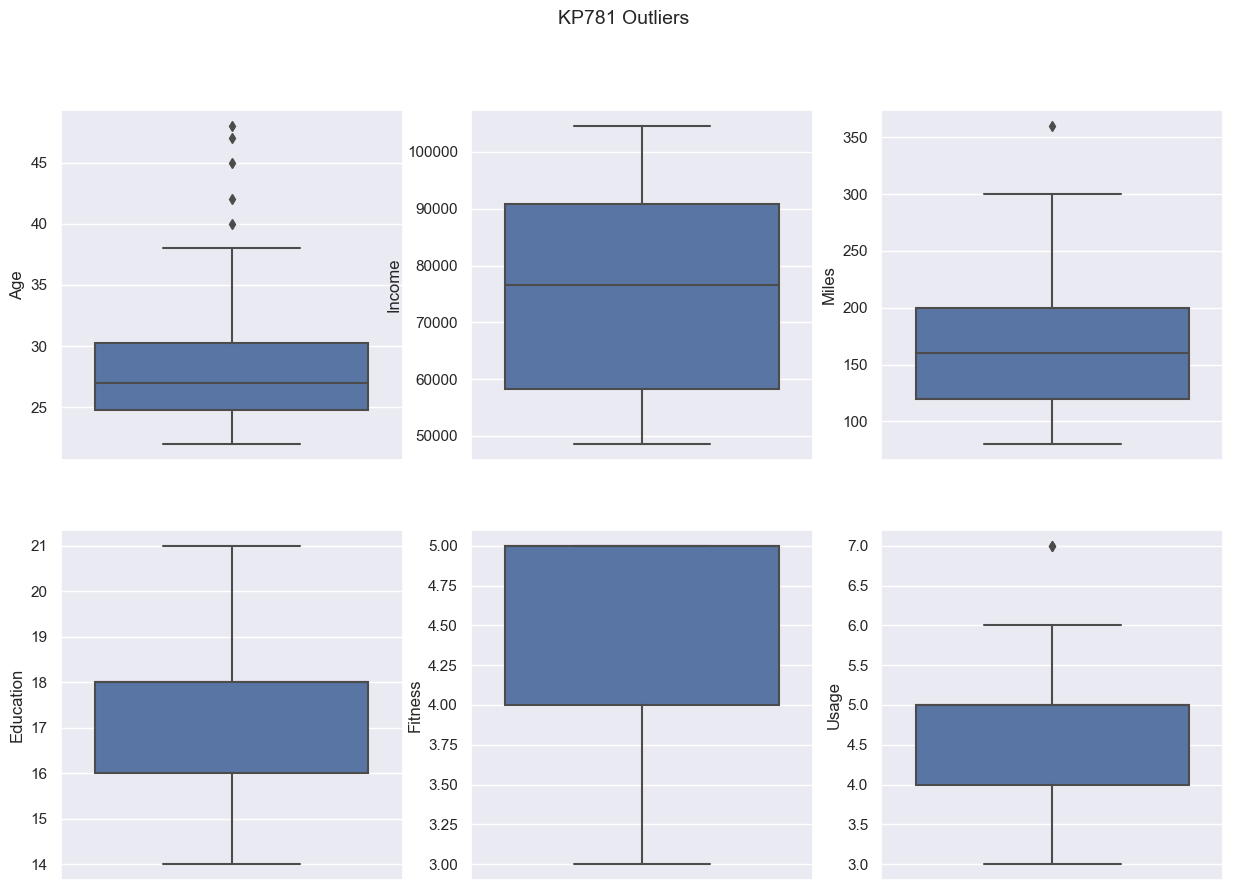

In [494]:
plt.figure(figsize=(15,10)).suptitle("KP781 Outliers",fontsize=14)

plt.subplot(2, 3, 1)
sns.boxplot(KP781, y="Age")
plt.subplot(2, 3, 2)
sns.boxplot(KP781, y="Income")

plt.subplot(2, 3, 3)
sns.boxplot(KP781, y="Miles")
plt.subplot(2, 3, 4)
sns.boxplot(KP781, y="Education")

plt.subplot(2, 3, 5)
sns.boxplot(KP781, y='Fitness')
plt.subplot(2, 3, 6)
sns.boxplot(KP781, y='Usage')

plt.show()

#### **<span style="color: #b05abc;">Plot the Graph</span>**

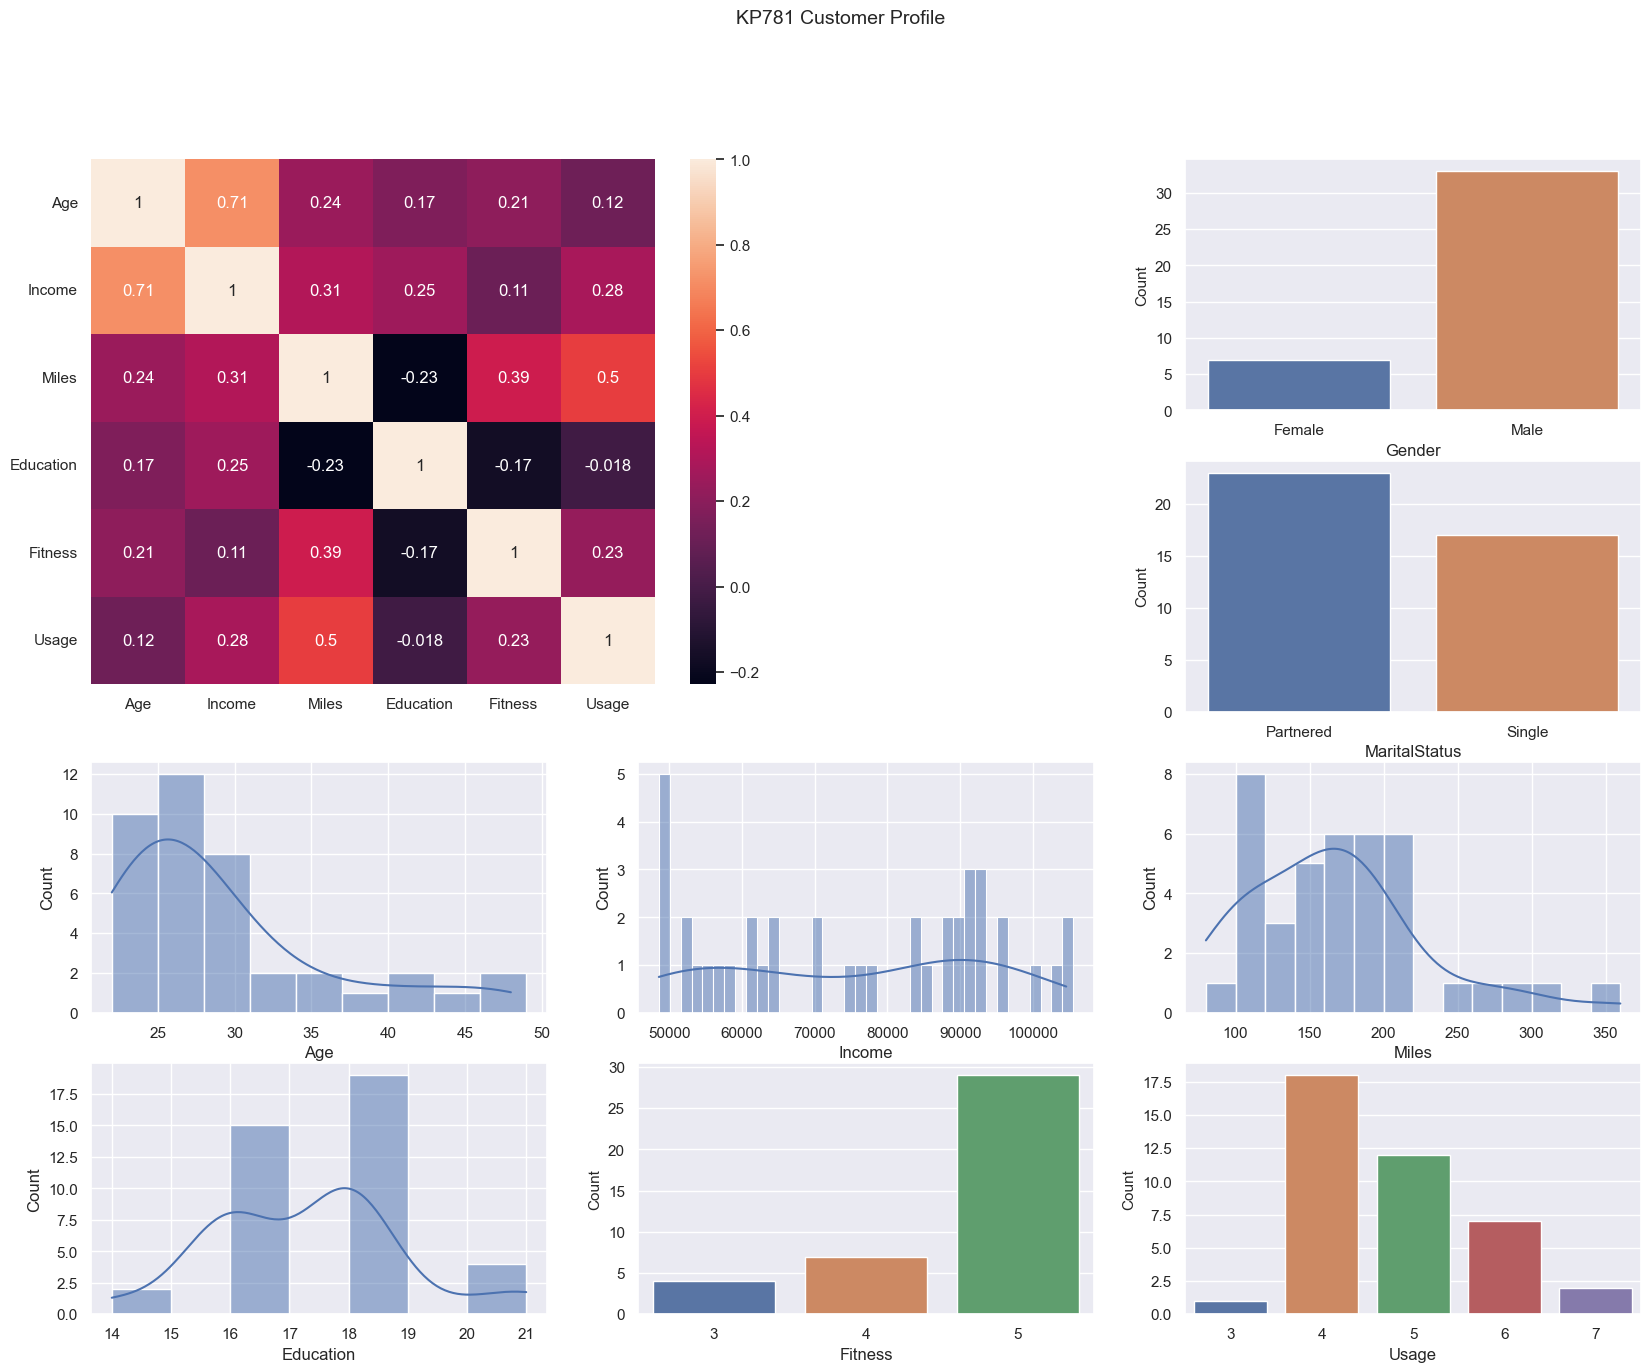

In [495]:
plt.figure(figsize=(20,15)).suptitle("KP781 Customer Profile",fontsize=14)

plt.subplot(2, 2, 1)
sns.heatmap(KP781[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage']].corr(), annot=True)
plt.yticks(rotation= 0, fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(4, 3, 3)
sns.countplot(KP781, x='Gender')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 6)
sns.countplot(KP781, x='MaritalStatus')
plt.ylabel("Count", fontsize=11)

plt.subplot(4, 3, 7)
sns.histplot(KP781, x="Age", binwidth=3, kde=True)
plt.subplot(4, 3, 8)
sns.histplot(KP781, x="Income", binwidth=1500, kde=True)
plt.subplot(4, 3, 9)
sns.histplot(KP781, x="Miles", binwidth=20, kde=True)

plt.subplot(4, 3, 10)
sns.histplot(KP781, x="Education", binwidth=1, kde=True)
plt.subplot(4, 3, 11)
sns.countplot(KP781, x='Fitness')
plt.ylabel("Count", fontsize=11)
plt.subplot(4, 3, 12)
sns.countplot(KP781, x='Usage')
plt.ylabel("Count", fontsize=11)

plt.show()

####
>Insight
* There are highest number of customer have covered `70 miles`.


## **<span style="color: #cc0000;">Questions</span>**

### **<span style="color: #cc0066;">Q0. What is the probability of a male customer buying a KP781 treadmill?</span>**

In [496]:
product_gender = pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index', margins=True)*100
product_gender

Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769
All      44.444444  33.333333  22.222222

In [497]:
product_gender['KP781']['Male']

31.73076923076923

####
>Insight
*  There is `31.73%` chance a male customer will purchase **`KP781`**

### **<span style="color: #cc0066;">Q1. What is the total count of each product present in the dataset?</span>**

In [498]:
Products = aerofit.groupby("Product")["Age"].describe().T

In [499]:
Products[:1]

Product  KP281  KP481  KP781
count     80.0   60.0   40.0

In [500]:
Products[:1]/1.8

Product      KP281      KP481      KP781
count    44.444444  33.333333  22.222222

#### 
>Insight
* **`KP781`** 40 with 22.22% probability.
* **`KP781`** 60 with 33.33% probability.
* **`KP781`** 80 with 44.44% probability.

### **<span style="color: #cc0066;">Q2. Describe the Age & Gender distribution of all the customers?</span>**

In [501]:
aerofit.groupby("Gender")["Age"].describe()

count       mean       std   min    25%   50%   75%   max
Gender                                                           
Female   76.0  28.565789  6.342104  19.0  24.00  26.5  33.0  50.0
Male    104.0  28.951923  7.377978  18.0  23.75  26.0  34.0  48.0

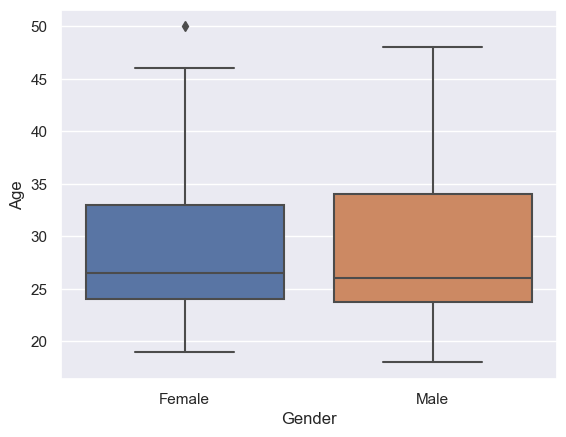

In [502]:
sns.boxplot(aerofit, x='Gender', y='Age')
plt.show()

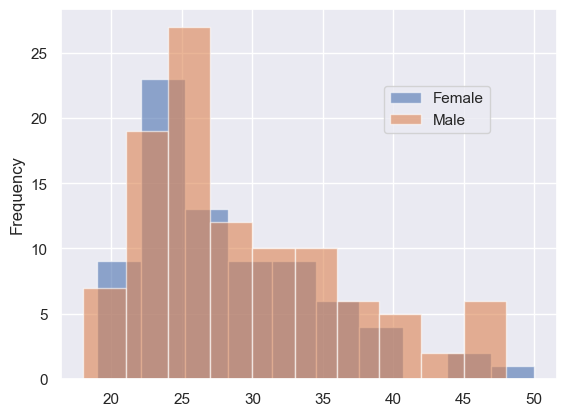

In [503]:
aerofit.groupby('Gender').Age.plot(kind='hist', alpha=0.6)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper right', borderaxespad=5)
plt.show()

In [504]:
aerofit.groupby('Gender')['Age'].mean()

Gender
Female    28.565789
Male      28.951923
Name: Age, dtype: float64

In [505]:
male_age = aerofit.loc[aerofit['Gender']=='Male']['Age']
female_age = aerofit.loc[aerofit['Gender']=='Female']['Age']

In [506]:
t,p = ttest_ind(male_age, female_age, alternative='greater')
p

0.3567980420783239

####
>Insight
* Their is a small differance between mean Age of Male & Female.
* also, p-vale of T-Test of the 2 Group come out to be 35% (considering Male age is higher)
* when following 95% Confidence Interval. So, we failed to prove that Male age are Higher then Female Age. amoung Customers.

### **<span style="color: #cc0066;">Q3. Top 3 features having the highest coorelatios with the Product column. and Why?</span>**

In [507]:
top_corr = aerofit.copy()
def add_product_as_column(x):
    return 1 if(x == 'KP281') else (2 if(x == 'KP481') else (3 if(x == 'KP781') else 0))
top_corr['product'] = top_corr.apply(lambda row: add_product_as_column(row['Product']),axis=1)

def add_product_columns(x):
    x['KP281'] = np.where((x['Product'] == 'KP281'), 1, 0)
    x['KP481'] = np.where((x['Product'] == 'KP481'), 1, 0)
    x['KP781'] = np.where((x['Product'] == 'KP781'), 1, 0)
    return x
top_corr = add_product_columns(top_corr)

In [508]:
top3_correlations = top_corr[['Age', 'Income', 'Miles', 'Education', 'Fitness', 'Usage', 'product', 'KP281', 'KP481', 'KP781']].corr()[['product', 'KP781', 'KP481', 'KP281']][:6]

In [509]:
top3_correlations.sort_values('product', ascending=False, inplace=True)

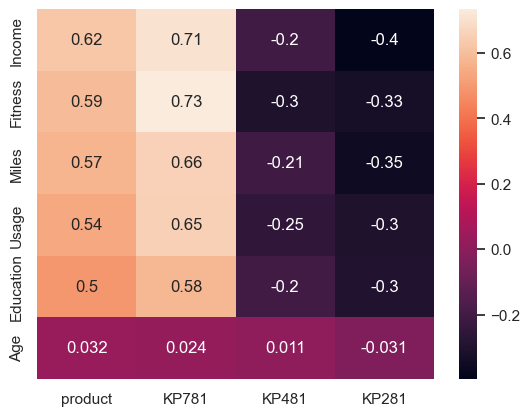

In [510]:
sns.heatmap(top3_correlations, annot=True)
plt.show()

####
>Insight
* Product Have higher co-relation with `Income`, `Fitness` & `Miles`.
* For **`KP781`** we have observed same co-relation.
* But, for **`KP481`** Top 3 co-relation are `Age`, `Education` & `Income`.
* But, for **`KP281`** Top 3 co-relation are `Age`, `Education` & `Usage`.

As, we know **`KP781`** is the expansive & better one, mostly prefered by Athletes or Fitness enthusiast, whos also have higher Income.
But, for **`KP481`**, **`KP281`** people with good Education, who are health consious, want to have a Treadmill but can't efford a expansive one. 

### **<span style="color: #cc0066;">Q4. Were there any outliers present in the Data? If yes, suggest suitable method for their treatment?</span>**

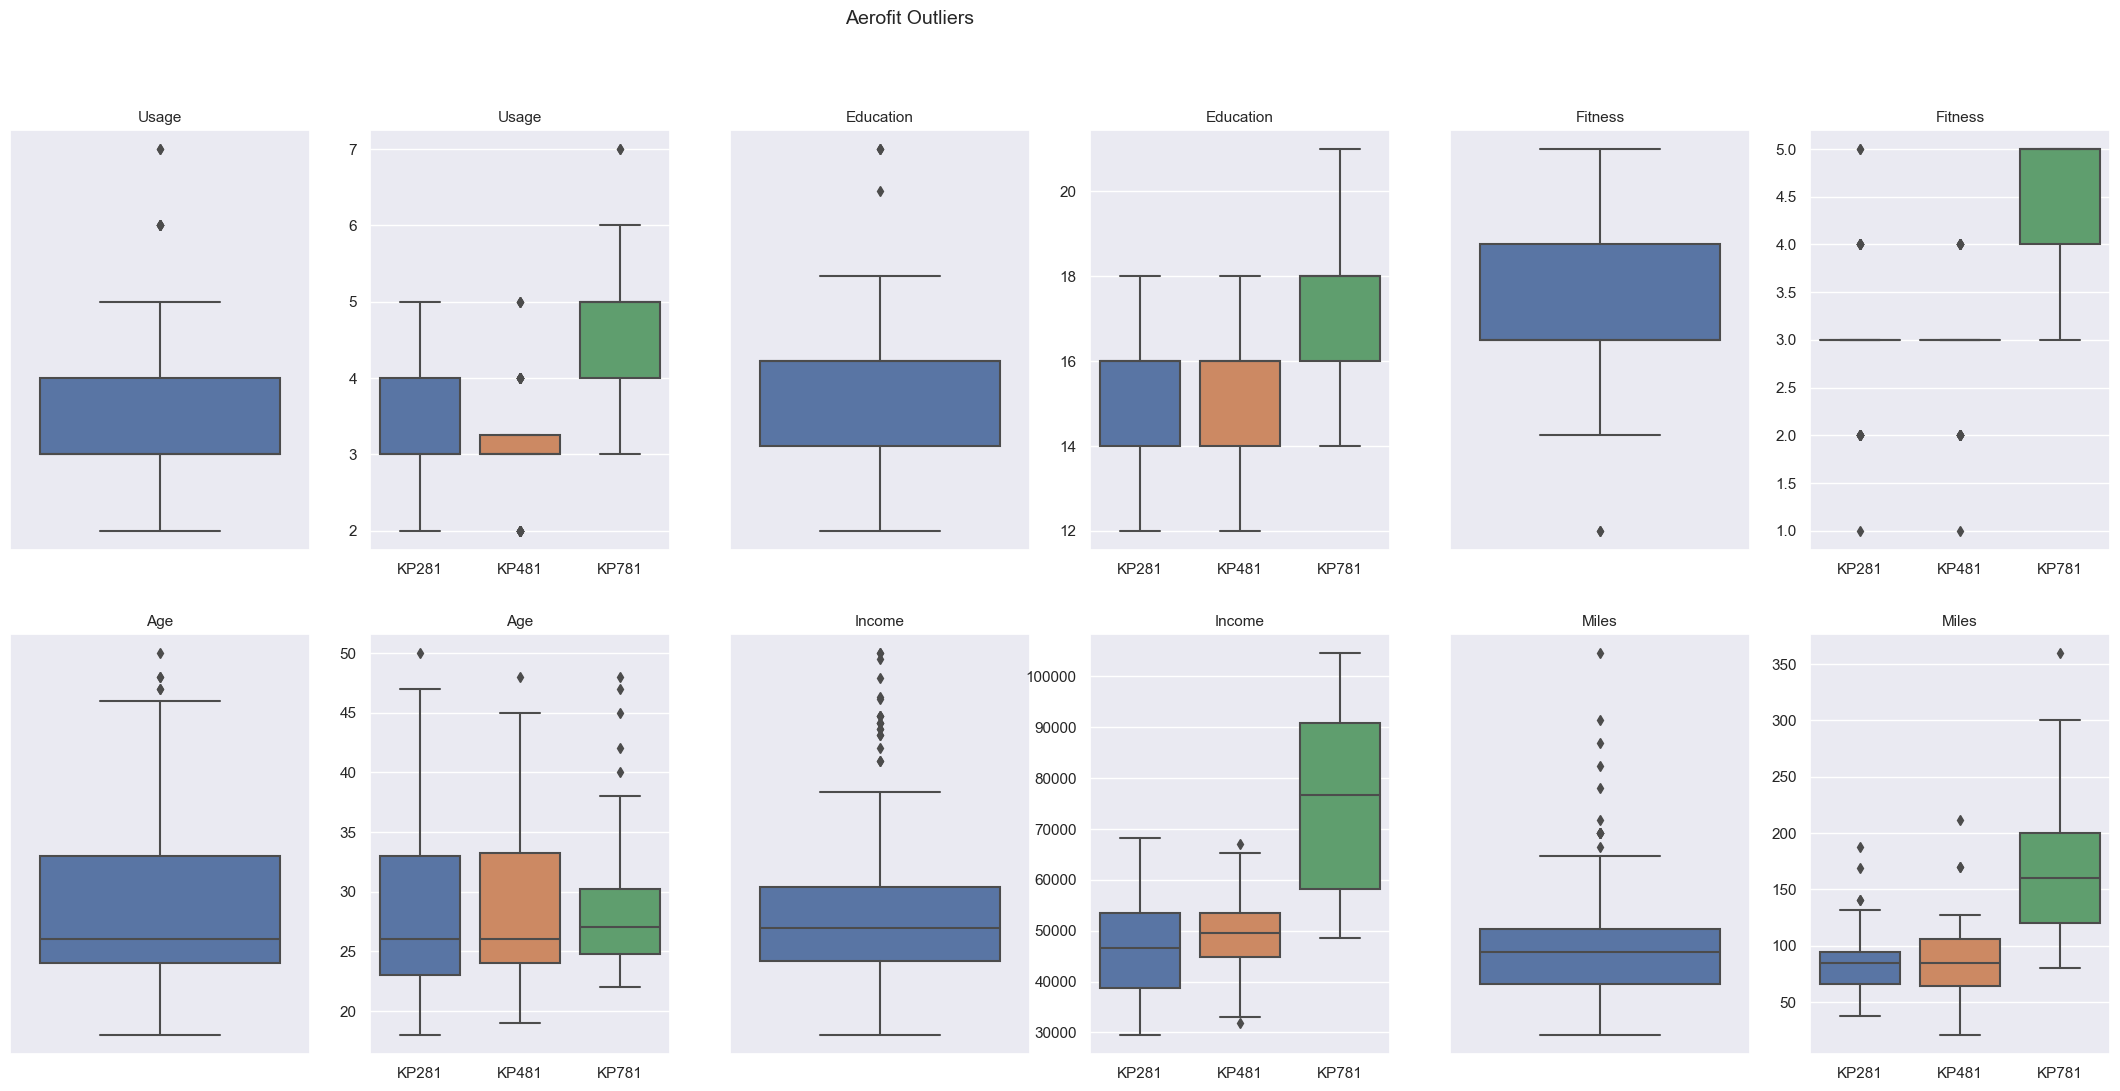

In [511]:
plt.figure(figsize=(24,12)).suptitle("Aerofit Outliers",fontsize=14)
plt.subplots_adjust(right=1)


plt.subplot(2, 6, 1)
sns.boxplot(aerofit, y='Usage')
plt.title('Usage', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 2)
sns.boxplot(aerofit, y='Usage', x='Product')
plt.title('Usage', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.subplot(2, 6, 3)
sns.boxplot(aerofit, y="Education")
plt.title('Education', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 4)
sns.boxplot(aerofit, y="Education", x='Product')
plt.title('Education', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.subplot(2, 6, 5)
sns.boxplot(aerofit, y='Fitness')
plt.title('Fitness', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 6)
sns.boxplot(aerofit, y='Fitness', x='Product')
plt.title('Fitness', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.subplot(2, 6, 7)
sns.boxplot(aerofit, y="Age")
plt.title('Age', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 8)
sns.boxplot(aerofit, y="Age", x='Product')
plt.title('Age', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.subplot(2, 6, 9)
sns.boxplot(aerofit, y="Income")
plt.title('Income', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 10)
sns.boxplot(aerofit, y="Income", x='Product')
plt.title('Income', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.subplot(2, 6, 11)
sns.boxplot(aerofit, y="Miles")
plt.title('Miles', fontsize=11)
plt.ylabel('', fontsize=12)
plt.yticks([])
plt.subplot(2, 6, 12)
sns.boxplot(aerofit, y="Miles", x='Product')
plt.title('Miles', fontsize=11)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)

plt.show()

#### Using Z-Score
 

In [512]:
aerofit[np.abs(zscore(aerofit['Age']))>2]

Product  Gender MaritalStatus  Age  Income  Miles  Education  Fitness  \
75    KP281    Male     Partnered   43   53439     66         16        3   
76    KP281  Female        Single   44   57987     75         16        4   
77    KP281  Female     Partnered   46   60261     47         16        2   
78    KP281    Male     Partnered   47   56850     94         16        3   
79    KP281  Female     Partnered   50   64809     66         16        3   
138   KP481    Male     Partnered   45   54576     42         16        2   
139   KP481    Male     Partnered   48   57987     64         16        3   
177   KP781    Male        Single   45   90886    160         16        5   
178   KP781    Male     Partnered   47  104581    120         18        5   
179   KP781    Male     Partnered   48   95508    180         18        5   

     Usage age_group income_group miles_group education_group fitness_group  \
75       3     40-45      45K-55K       50-80              16             3   
76       3     40-45      55K-65K       50-80              16             4   
77       3     45-50      55K-65K       20-50              16             2   
78       4     45-50      55K-65K      80-110              16             3   
79       3     45-50      55K-65K       50-80              16             3   
138      2     40-45      45K-55K       20-50              16             2   
139      2     45-50      55K-65K       50-80              16             3   
177      5     40-45      85K-95K     140-170              16             5   
178      4     45-50     95K-105K     110-140              18             5   
179      4     45-50     95K-105K     170-200              18             5   

    usage_group  
75            3  
76            3  
77            3  
78            4  
79            3  
138           2  
139           2  
177           5  
178           4  
179           4

#### Using `IQR` (Inner Quartile Range)

In [513]:
age_outlier = check_outlier(aerofit, 'Age')
income_outlier = check_outlier(aerofit, 'Income')
miles_outlier = check_outlier(aerofit, 'Miles')
education_outlier = check_outlier(aerofit, 'Education')
fitness_outlier = check_outlier(aerofit, 'Fitness')
usage_outlier = check_outlier(aerofit, 'Usage')

In [514]:
print("Age: \t\t => Lower outlier: {}  => Upper outlier: {}" .format(age_outlier['lower']['length'], age_outlier['upper']['length']))
print("Income: \t => Lower outlier: {}  => Upper outlier: {}" .format(income_outlier['lower']['length'], income_outlier['upper']['length']))
print("Miles: \t\t => Lower outlier: {}  => Upper outlier: {}" .format(miles_outlier['lower']['length'], miles_outlier['upper']['length']))
print("Education: \t => Lower outlier: {}  => Upper outlier: {}" .format(education_outlier['lower']['length'], education_outlier['upper']['length']))
print("Fitness: \t => Lower outlier: {}  => Upper outlier: {}" .format(fitness_outlier['lower']['length'], fitness_outlier['upper']['length']))
print("Usage: \t\t => Lower outlier: {}  => Upper outlier: {}" .format(usage_outlier['lower']['length'], usage_outlier['upper']['length']))
# print("%d, %d" %(age_outlier['lower']['length'], age_outlier['upper']['length']))

Age: 		 => Lower outlier: 0  => Upper outlier: 5
Income: 	 => Lower outlier: 0  => Upper outlier: 19
Miles: 		 => Lower outlier: 0  => Upper outlier: 13
Education: 	 => Lower outlier: 0  => Upper outlier: 4
Fitness: 	 => Lower outlier: 2  => Upper outlier: 0
Usage: 		 => Lower outlier: 0  => Upper outlier: 9


####
>Insight
* Yes, There is Outlier Present in DataSet for All of the Continuous Values, like
  *  Age: 		 => Lower outlier: `0`  => Upper outlier: `5`
  * Income: 	 => Lower outlier: `0`  => Upper outlier: `19`
  * Miles: 		 => Lower outlier: `0`  => Upper outlier: `13`
  * Education: 	 => Lower outlier: `0`  => Upper outlier: `4`
  * Fitness: 	 => Lower outlier: `2`  => Upper outlier: `0`
  * Usage: 		 => Lower outlier: `0`  => Upper outlier: `9`

When, we remove these outliers it might effect credebility of `Product` specific analysis. Because Some of the product dependent on the datas. 

### **<span style="color: #cc0066;">Q5. Marital Status Implies no significant information on the usages of different TreadMills? <span style="color: Green;">(T/F)</span>**

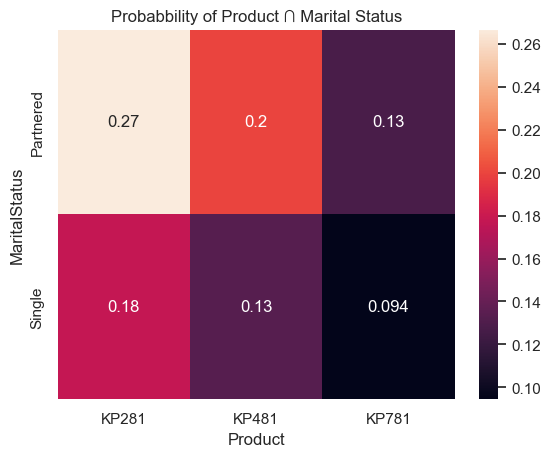

In [515]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True),annot=True)
plt.title('Probabbility of Product ∩ Marital Status', fontsize=12)
plt.show()

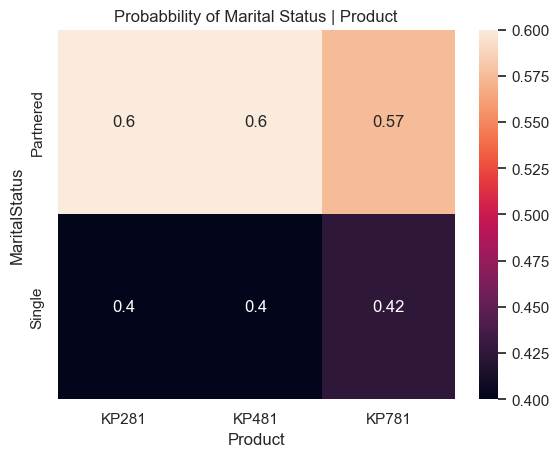

In [516]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='columns'),annot=True)
plt.title('Probabbility of Marital Status | Product', fontsize=12)
plt.show()

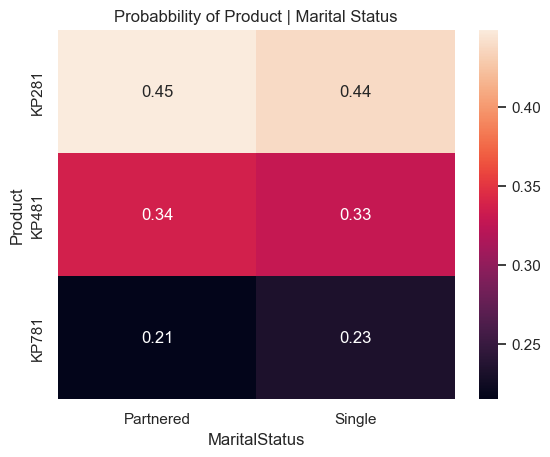

In [517]:
sns.heatmap(pd.crosstab(aerofit['Product'], aerofit['MaritalStatus'], normalize='columns'),annot=True)
plt.title('Probabbility of Product | Marital Status', fontsize=12)
plt.show()

####
>Insight
* From Above Probability Heatmap, observed that for each product given marital status have nearly same probability.

Thus, Statement is True

### **<span style="color: #cc0066;">Q6. The variance of Income in lower ages is smaller as compare to the variance in higher ages. <span style="color: Green;">*In Statistics , this is known as*</span>**

In [518]:
low_income_age = aerofit.copy().loc[aerofit['Age']<aerofit['Age'].mean()][['Income', "Age"]]
high_income_age = aerofit.copy().loc[aerofit['Age']>aerofit['Age'].mean()][['Income', "Age"]]

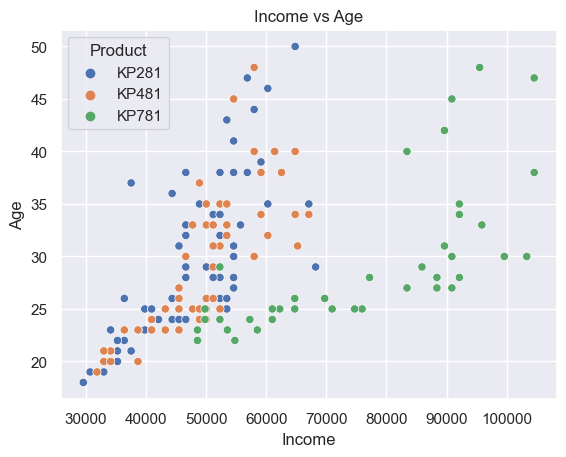

In [519]:
sns.scatterplot(aerofit, x='Income', y='Age', hue='Product')
plt.title("Income vs Age", fontsize=12)
plt.show()

In [520]:
low_income_age['Income'].var() < high_income_age['Income'].var()

True

In [521]:
low_income_age['Income'].std() < high_income_age['Income'].std()

True

####
>Insight
* Here Variance & Standard Daviation in low Age Income Group is less then Higher Age Income Group.
* Thus, It results a funnel shape & It's known as **`Heteroscedasticity`**


### **<span style="color: #cc0066;">Q7. What proportion of woman have brought the KP781 TreadMill? Provide reson of Answar.</span>**

In [522]:
product_gender = pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index', margins=True)*100
product_gender

Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769
All      44.444444  33.333333  22.222222

In [523]:
product_gender['KP781']['Female']

9.210526315789473

####
>Insight
* There is `9.21%` chance a male customer will purchase **`KP781`**

### **<span style="color: #cc0066;">Q8. Distinguish between Customer Profiles for  KP281 and KP481 TreadMill.</span>**

##### Probability of `Product's` for given `Age`  ***"Product | Age"***

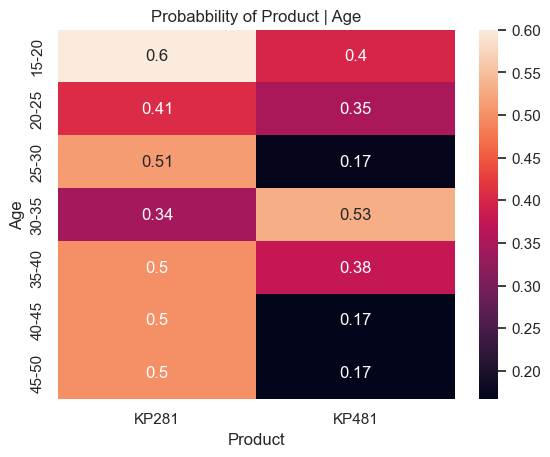

In [524]:
sns.heatmap(pd.crosstab(aerofit['age_group'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Age', fontsize=12)
plt.ylabel('Age')
plt.show()

##### Probability of `Product's` for given `Income`  ***"Product | Income"***

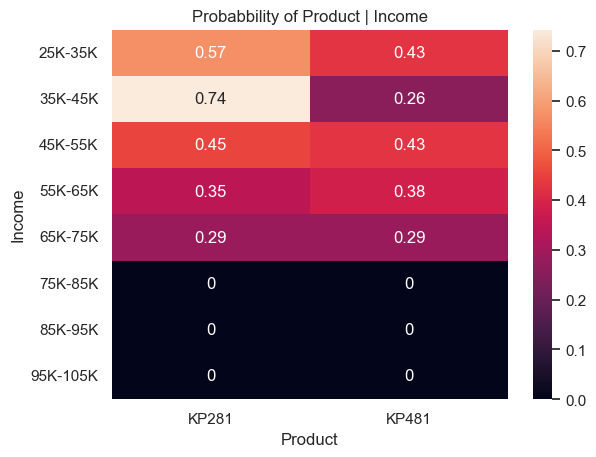

In [525]:
sns.heatmap(pd.crosstab(aerofit['income_group'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Income', fontsize=12)
plt.ylabel('Income')
plt.show()

##### Probability of `Product's` for given `Miles`  ***"Product | Miles"***

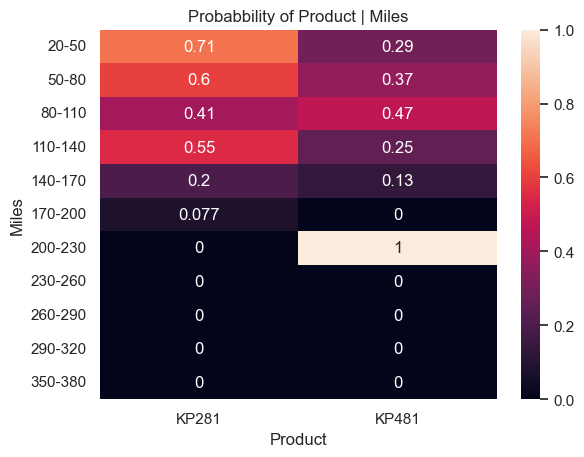

In [526]:
sns.heatmap(pd.crosstab(aerofit['miles_group'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Miles', fontsize=12)
plt.ylabel('Miles')
plt.show()

##### Probability of `Product's` for given `Education`  ***"Product | Education"***

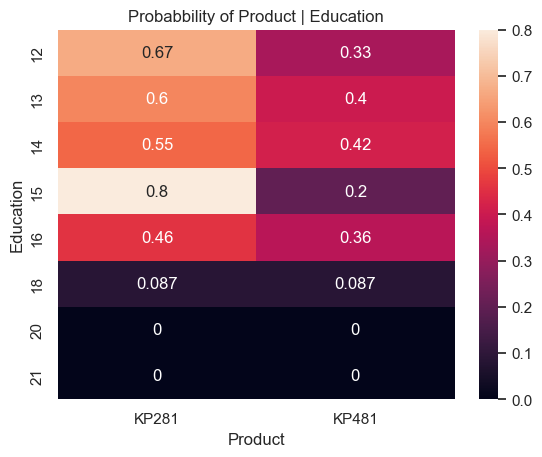

In [527]:
sns.heatmap(pd.crosstab(aerofit['Education'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Education', fontsize=12)
plt.show()

##### Probability of `Product's` for given `Fitness`  ***"Product | Fitness"***

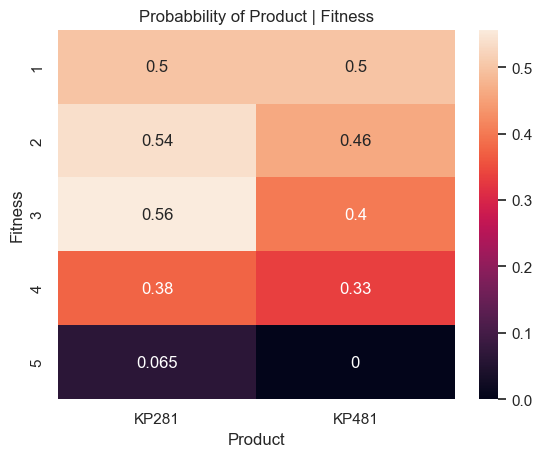

In [528]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Fitness', fontsize=12)
plt.show()

##### Probability of `Product's` for given `Usage`  ***"Product | Usage"***

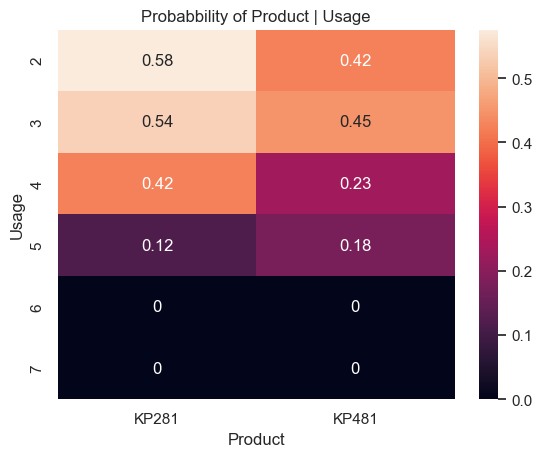

In [529]:
sns.heatmap(pd.crosstab(aerofit['Usage'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Usage', fontsize=12)
plt.show()

##### Probability of `Product's` for given `Gender`  ***"Product | Gender"***

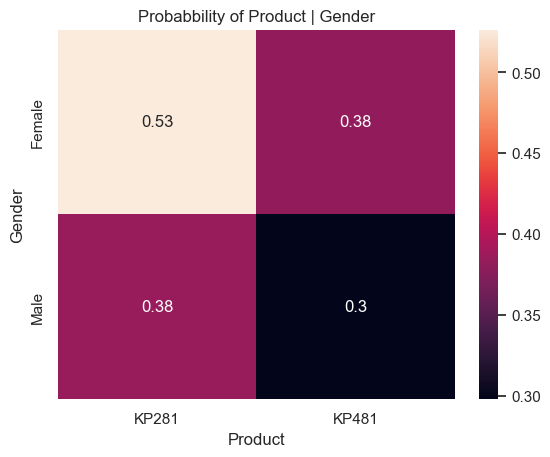

In [530]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Gender', fontsize=12)
plt.show()

##### Probability of `Product's` for given `MaritalStatus`  ***"Product | Marital Status"***

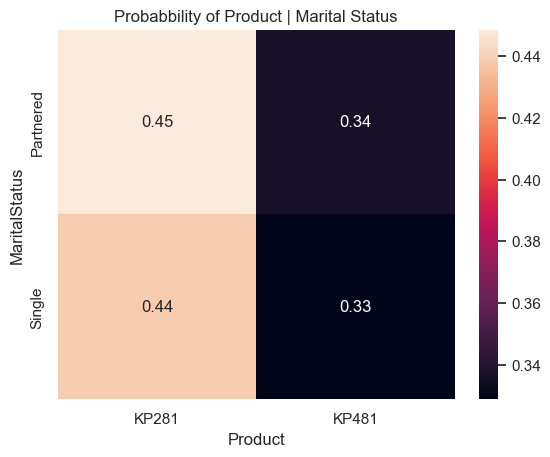

In [531]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='index')[['KP281', 'KP481']], annot=True)
plt.title('Probabbility of Product | Marital Status', fontsize=12)
plt.show()

### **<span style="color: #cc0066;">Q9. The overall Probability of purchase for KP281, KP481 & KP781 TreadMill is __ , ___ , ___.</span>**

In [532]:
aerofit.groupby('Product')['Product'].count()/1.80

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

### **<span style="color: #cc0066;">Q10. Give conditions when you will and when you 'll not recomended KP781 TreadMill to a Customer?</span>**

####
> <span style="color: #99e600;">**When to recomend KP781**</span>
* Male's
<!-- * Partnered -->
* Age between `20-30`.
* Income with `90K`.
* Who inteded or alredy covered `150-200` Miles.
* Have Education between `16-19`.
* Have Fitness of level`5`.
* Have Usages level of `4-5`.

> <span style="color: #cca300;">**When not to recomend KP781**</span>
* Females's
* Age above `35`.
* Income below `75K`.
* Have Fitness level less than `3`.
* Have Usages level less than `4`. 

## **<span style="color: #996633;">Multi Variate Analysis</span>**

#### **<span style="color: #db70b8;">Find Probability & Coorelation</span>**

##### Probability of `Product's` for given `Gender & Marital Status`  ***"Product | (Gender ∩ Matial Status)"***

In [533]:
p_pord_gend_marital= pd.crosstab([aerofit['Gender'], aerofit['MaritalStatus']], aerofit['Product'], normalize='index', margins=True)*100
# p_pord_gend_marital

Text(0.5, 1.0, 'Probabbility of Product | (Gender ∩ Matial Status)')

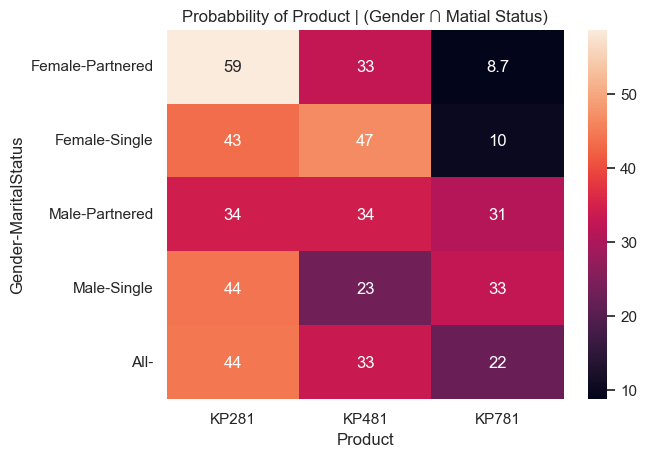

In [534]:
sns.heatmap(p_pord_gend_marital, annot=True)
plt.title('Probabbility of Product | (Gender ∩ Matial Status)', fontsize=12)

##### Probability of `Product's` for given `Fitness & Usage`  ***"Product | (Fitness ∩ Usage)"***

In [535]:
p_pord_fit_usag= pd.crosstab([aerofit['Fitness'], aerofit['Usage']], aerofit['Product'], normalize='index', margins=True)*100
# p_pord_fit_usag

Text(0.5, 1.0, 'Probabbility of Product | (Fitness ∩ Usage)')

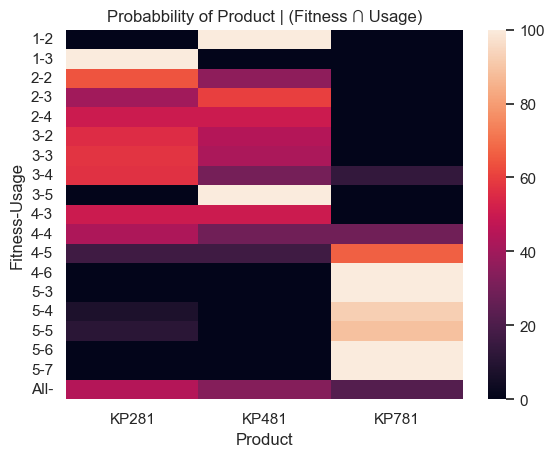

In [536]:
sns.heatmap(p_pord_fit_usag)
plt.title('Probabbility of Product | (Fitness ∩ Usage)', fontsize=12)

##### Probability of `Product's` for given `Fitness & Age Group`  ***"Product | (Fitness ∩ Miles)"***

In [537]:
p_pord_fit_age_group= pd.crosstab([aerofit['Fitness'], aerofit['Age']], aerofit['Product'], normalize='index', margins=True)*100
# p_pord_fit_age_group

Text(0.5, 1.0, 'Probabbility of Product | (Fitness ∩ Age Group)')

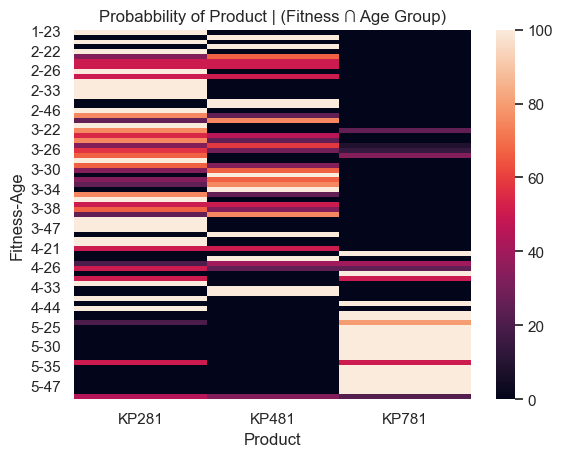

In [538]:
sns.heatmap(p_pord_fit_age_group)
plt.title('Probabbility of Product | (Fitness ∩ Age Group)', fontsize=12)

##### Probability of `Product's` for given `Fitness & Mile Group`  ***"Product | (Fitness ∩ Mile Group)"***

In [539]:
p_pord_fit_mile_group= pd.crosstab([aerofit['Fitness'], aerofit['Miles']], aerofit['Product'], normalize='index', margins=True)*100
# p_pord_fit_mile_group

Text(0.5, 1.0, 'Probabbility of Product | (Fitness ∩ Miles Group)')

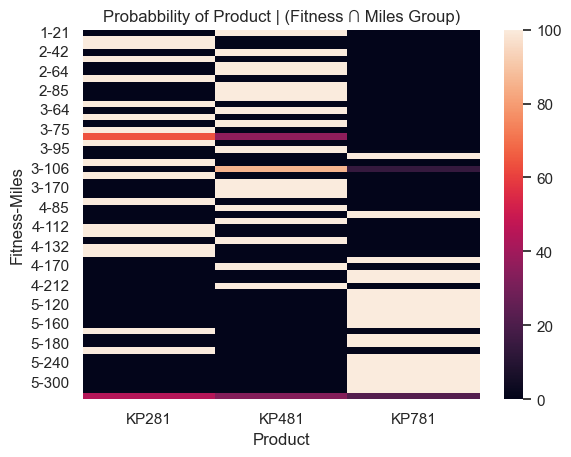

In [540]:
sns.heatmap(p_pord_fit_mile_group)
plt.title('Probabbility of Product | (Fitness ∩ Miles Group)', fontsize=12)

##### Probability of `Product's` for given `Usage & Income Group`  ***"Product | (Fitness ∩ Mile Group)"***

In [541]:
p_pord_usage_income_group= pd.crosstab([aerofit['Usage'], aerofit['income_group']], aerofit['Product'], normalize='index', margins=True)*100
# p_pord_usage_income_group

Text(0.5, 1.0, 'Probabbility of Product | (Usage ∩ Income Group)')

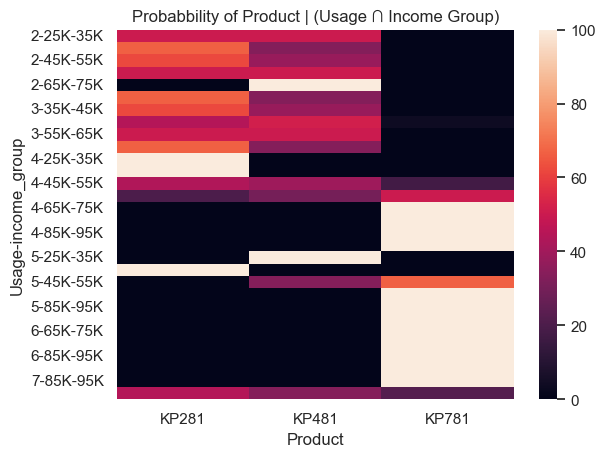

In [542]:
sns.heatmap(p_pord_usage_income_group)
plt.title('Probabbility of Product | (Usage ∩ Income Group)', fontsize=12)

#### **<span style="color: #ff884d;">Find Correlation</span>**

<Axes: xlabel='MaritalStatus', ylabel='Age'>

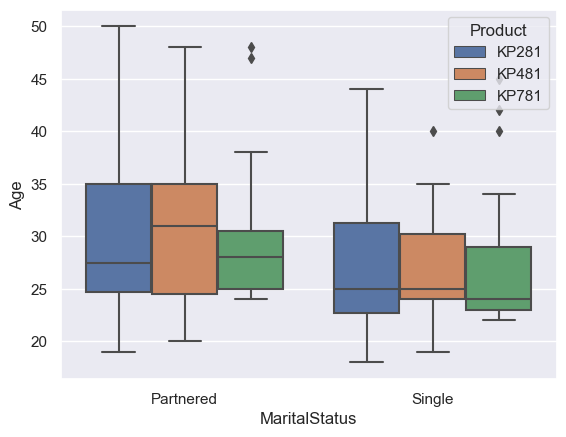

In [543]:
sns.boxplot(x="MaritalStatus", y="Age", hue="Product", data=aerofit)

<Axes: xlabel='MaritalStatus', ylabel='Income'>

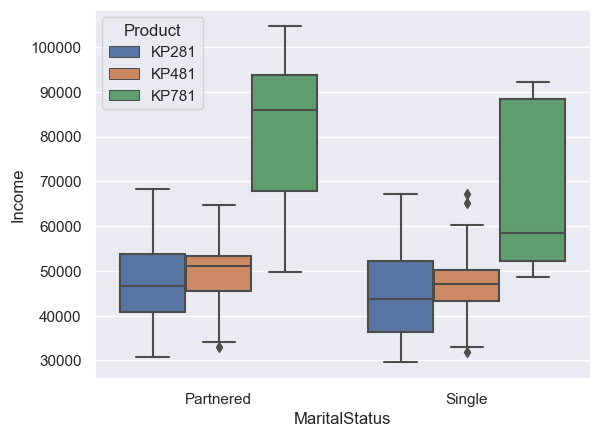

In [544]:
sns.boxplot(x="MaritalStatus", y="Income", hue="Product", data=aerofit)

<Axes: xlabel='Gender', ylabel='Income'>

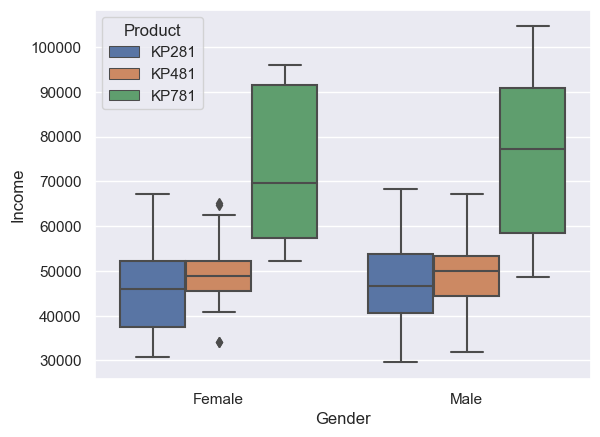

In [545]:
sns.boxplot(x="Gender", y="Income", hue="Product", data=aerofit)

<Axes: xlabel='Fitness', ylabel='Age'>

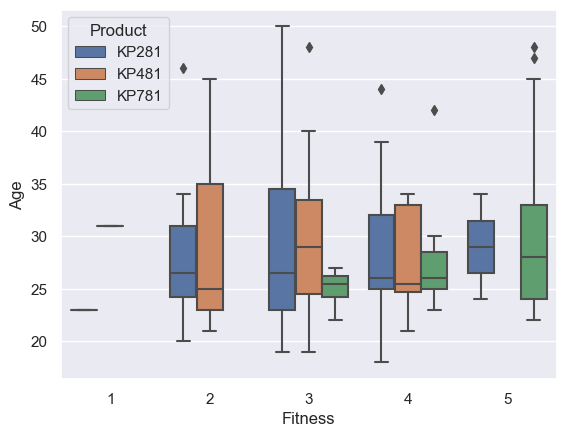

In [546]:
sns.boxplot(x="Fitness", y="Age", hue="Product", data=aerofit)

<Axes: xlabel='Fitness', ylabel='Income'>

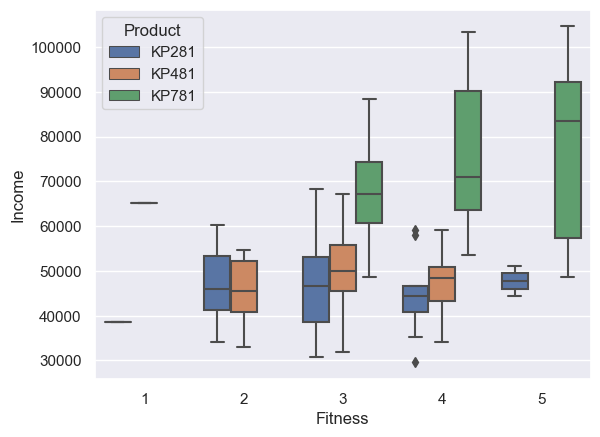

In [547]:
sns.boxplot(x="Fitness", y="Income", hue="Product", data=aerofit)

<Axes: xlabel='Age', ylabel='Education'>

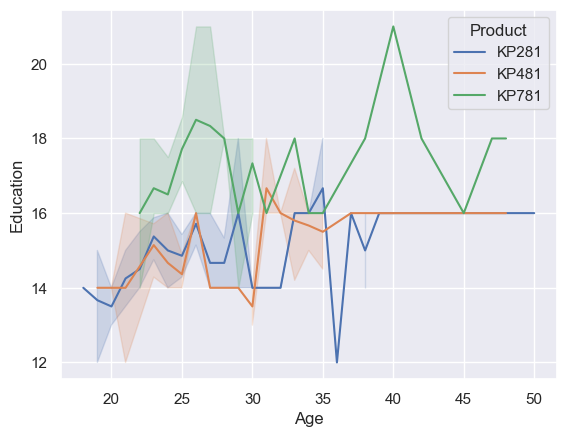

In [548]:
sns.lineplot(x="Age", y="Education", hue="Product", data=aerofit)

# END